In [200]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from skimage import data, io

# 1. Clustering

### K-means for MNIST data

In [172]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data


/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [173]:
# Normalize the data
X = X/255.0
y = mnist.target

#X_idx = np.random.randint(X.shape[0], size=1000)
#X_samples = np.array(X)[X_idx]

start_time = time.time()

# Initialize the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X)

end_time = time.time()


# Get the cluster labels for each data point
labels = kmeans.predict(X)
end_predict_time = time.time()

print("Training time for K-means on MNIST data is:", end_time - start_time)
print("Prediction time for K-means on MNIST data is:", end_predict_time - end_time)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training time for K-means on MNIST data is: 20.38696599006653
Prediction time for K-means on MNIST data is: 0.24541425704956055


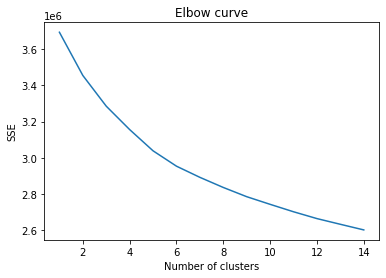

In [133]:
# Compute the within-cluster sum of squared errors for different values of k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 15), sse)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [473]:
silhouette_avg = silhouette_score(X, labels)
print("The average Silhouette Score for Kmeans on Mnist data is:", silhouette_avg)

The average Silhouette Score for Kmeans on Mnist data is: 0.05869201052848769


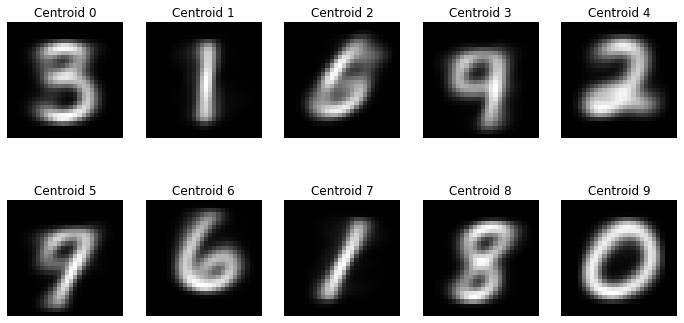

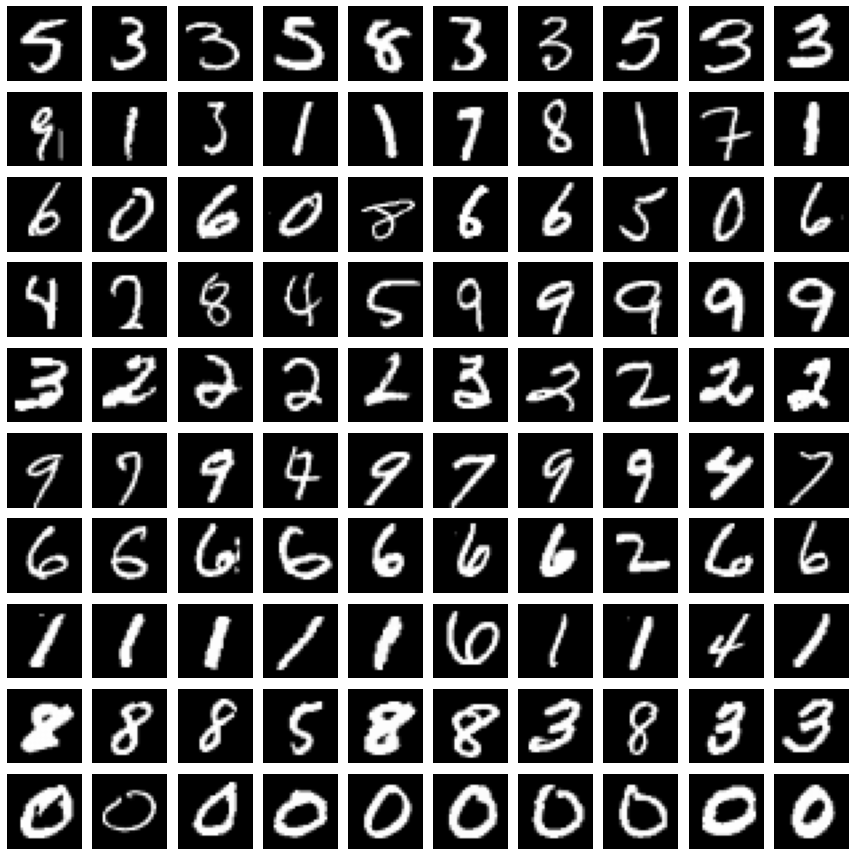

In [446]:
# Plot centroids
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))

# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = np.array(X)[labels == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()


### Expectation Maximization (EM) for MNIST data

In [447]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=10)
data = np.array(X)
em.fit(data)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(data)
end_predict_time = time.time()
print("Training time of EM on MNIST data is:", end_time - start_time)
print("Prediction time of EM on MNIST data is:", end_predict_time - end_time)


Training time of EM on MNIST data is: 706.6234757900238
Prediction time of EM on MNIST data is: 19.00666308403015


In [477]:
silhouette_avg_em = silhouette_score(X, predicted_labels)
print("The average Silhouette score for EM on MNIST data is", silhouette_avg_em)

The average Silhouette score for EM on MNIST data is -0.013531530304836954


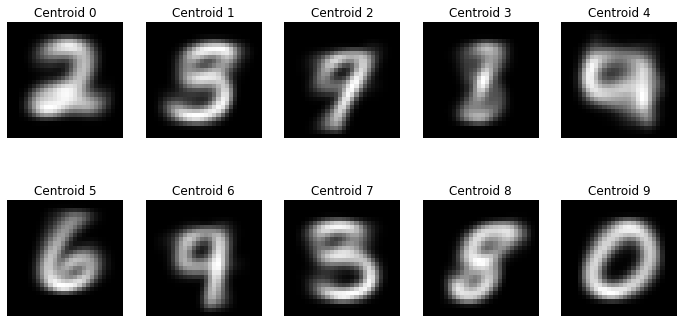

In [448]:
# Plot centroids
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(em.means_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))


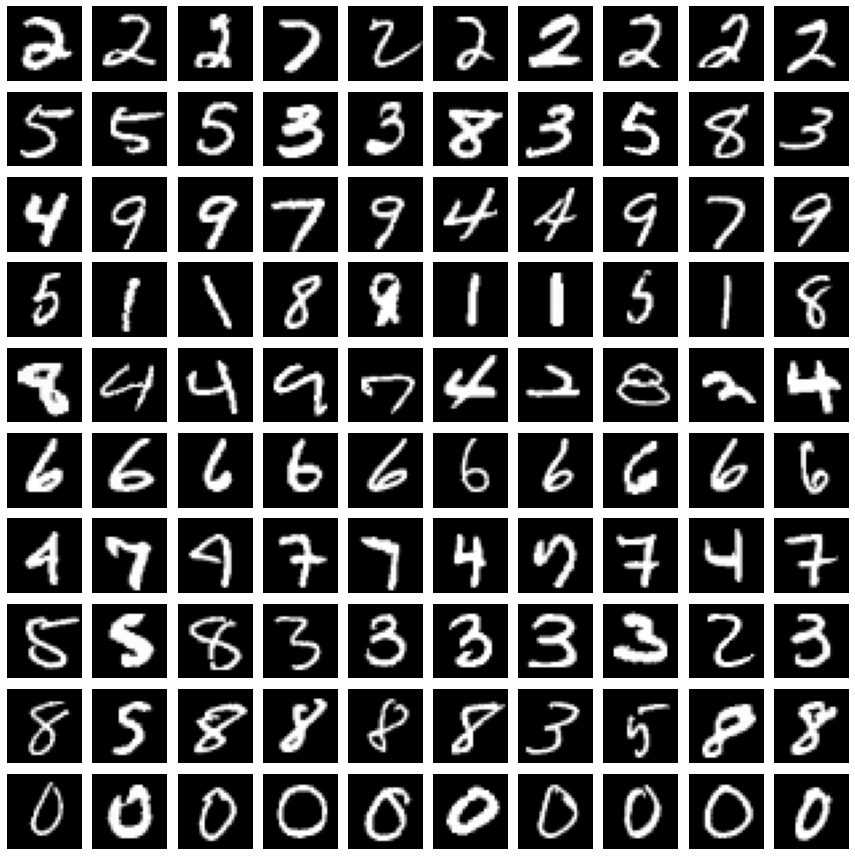

In [449]:

# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = data[predicted_labels == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(samples[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

# 2. Reduce Dimension

### PCA on MNIST data

PCA running time on MNIST data is: 3.0123090744018555


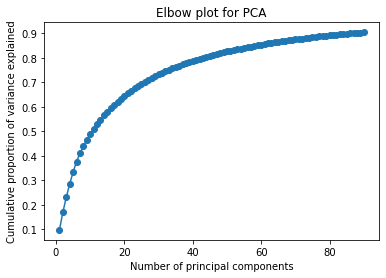

In [175]:
#mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target
#X_idx = np.random.randint(X.shape[0], size=1000)

#X_samples = np.array(X)[X_idx]
#y_samples = np.array(y)[X_idx]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA
start_time = time.time()
pca = PCA(n_components=90)
X_pca = pca.fit_transform(X)
end_time = time.time()

print("PCA running time on MNIST data is:", end_time - start_time)

# Compute cumulative proportion of variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot elbow plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative proportion of variance explained')
plt.title('Elbow plot for PCA')
plt.show()




/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


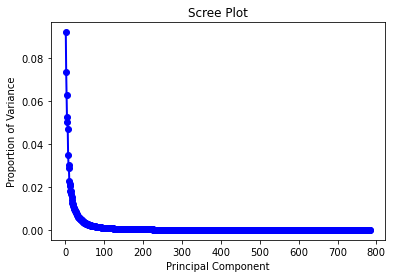

In [382]:

# Compute covariance matrix
cov_mat = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

# Sort eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]

# Plot scree plot
plt.plot(np.arange(len(eigenvalues)) + 1, eigenvalues / np.sum(eigenvalues), 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance')
plt.title('Scree Plot')
plt.show()


Text(0, 0.5, 'Second Principal Component')

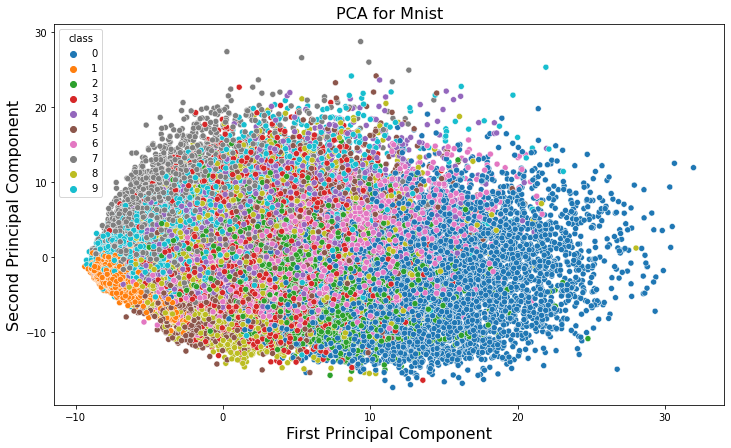

In [193]:

# Perform PCA with n_components=3
pca = PCA(n_components=90)
X_pca = pca.fit_transform(X_scaled)

pca_class = pd.concat([pd.DataFrame(X_pca), pd.DataFrame(y).reset_index()['class']], axis = 1)
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=pca_class, 
                x=0, 
                y=1,
                hue="class")
 
plt.title("PCA for Mnist",
          fontsize=16)
plt.xlabel('First Principal Component',
           fontsize=16)
plt.ylabel('Second Principal Component',
           fontsize=16)






In [194]:
# Reconstruct the data from the reduced representation using PCA
X_pca_reconstructed = pca.inverse_transform(X_pca)

# Calculate the reconstruction error for PCA
pca_error = mean_squared_error(X_scaled, X_pca_reconstructed)
pca_error

0.2980265403967065

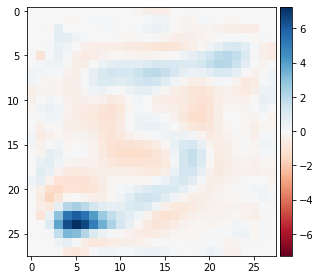

In [203]:
io.imshow(X_pca_reconstructed[0,:].reshape(28,28))

### ICA on MNIST data

In [2]:

#mnist = fetch_openml('mnist_784', version=1)
#X = mnist.data
#y = mnist.target
#X_idx = np.random.randint(X.shape[0], size=1000)

#X_samples = np.array(X)[X_idx]
#y_samples = np.array(y)[X_idx]


# Standardize the data
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_samples)

In [263]:
start_time = time.time()

ica = FastICA(n_components=100)
ica.fit(X_scaled)
X_ica = ica.fit_transform(X_scaled)

end_time = time.time()

print("ICA on Mnist data running time is:", end_time - start_time)


/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


ICA on Mnist data running time is: 70.25608325004578


In [189]:
from scipy.stats import kurtosis
kurtosis_values = kurtosis(X_ica, axis=0)
print('Kurtosis value of ICA on MNIST is:', kurtosis_values)

Kurtosis value of ICA on MNIST is: [2.09549097e+02 2.47212045e+01 9.78217778e+03 1.63848326e+03
 1.27388072e+03 1.59784712e+02 4.83715949e+03 5.09690534e+04
 1.50357414e+01 2.57249562e+00 4.58803640e+01 5.47760048e+00
 2.44713176e+02 2.61580324e+02 5.06153397e+02 3.97575143e+00
 4.20054193e+01 2.31345412e+02 7.25848544e+01 5.02649247e+00
 8.09792314e+01 5.13954919e+00 2.14586809e+01 2.56264186e+00
 4.29705986e+01 2.86568691e+01 7.79791297e+01 6.99627885e+02
 1.95142208e+00 4.80352617e+03 6.82427716e+01 2.07351478e+00
 3.72033015e+02 1.66668988e+02 4.87639310e+02 5.89358098e+00
 3.23738967e+01 5.77397431e+02 6.90725659e+04 9.24675276e+00
 5.74859558e+04 5.15107188e+00 5.39428051e+02 4.01361741e+00
 1.66678236e+02 8.11617371e+03 1.38833786e+04 8.76105264e+02
 2.47571308e+01 7.68436658e+03 5.58466543e+03 9.95110419e+00
 4.55471847e+04 4.55442024e+04 1.37686740e+04 2.16130098e+03
 4.84079593e+04 1.40790676e+01 2.29759017e+00 1.94529461e+00
 4.96195684e+04 1.00224618e+02 6.23889563e+04 2.12

In [190]:
kurtosis_values.mean()

7349.837692962965

In [192]:
np.sum(kurtosis_values > 3)

90

Text(0, 0.5, 'Second Component')

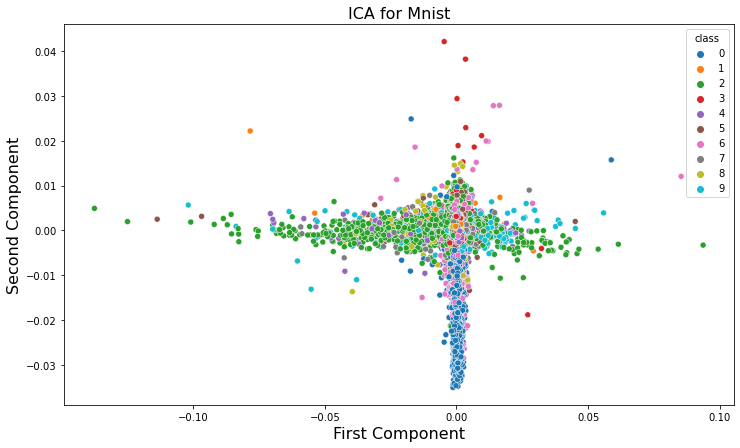

In [177]:
ica_class = pd.concat([pd.DataFrame(X_ica), pd.DataFrame(y).reset_index()['class']], axis = 1)
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=ica_class, 
                x=0, 
                y=1,
                hue="class")
 
plt.title("ICA for Mnist",
          fontsize=16)
plt.xlabel('First Component',
           fontsize=16)
plt.ylabel('Second Component',
           fontsize=16)

In [264]:
# Reconstruct the data from the reduced representation using PCA
X_ica_reconstructed = ica.inverse_transform(X_ica)

# Calculate the reconstruction error for PCA
ica_error = mean_squared_error(X_scaled, X_ica_reconstructed)
ica_error

0.31197731314630633

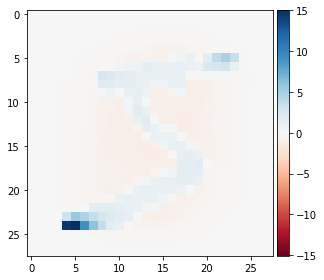

In [425]:
io.imshow(X_scaled[0,:].reshape(28,28))

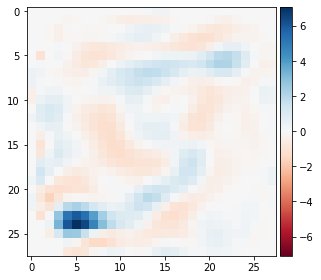

In [209]:
io.imshow(X_ica_reconstructed[0,:].reshape(28,28))

### RP on MINIST

In [238]:
from sklearn.random_projection import GaussianRandomProjection


# Load the MNIST dataset
#mnist = fetch_openml('mnist_784')

# Preprocess the data
#X_samples = X_samples / 255.0


# Define the Randomized Projection model
rp = GaussianRandomProjection(n_components=100, random_state=42)

# Fit the model
X_rp = rp.fit_transform(X_scaled)




Text(0, 0.5, 'Second Component')

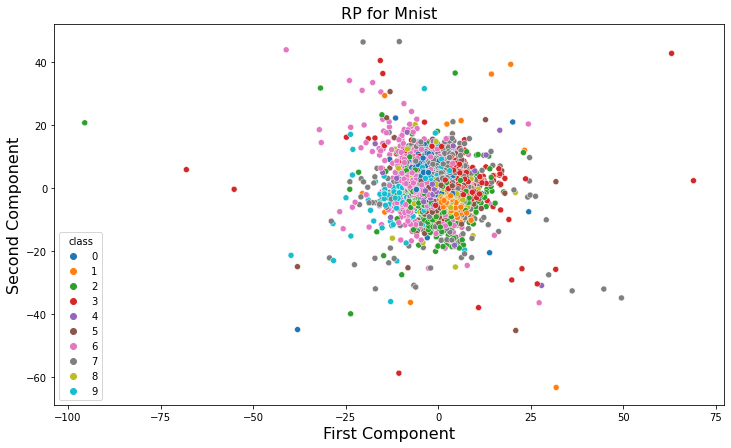

In [239]:
rp_class = pd.concat([pd.DataFrame(X_rp), pd.DataFrame(y).reset_index()['class']], axis = 1)
plt.figure(figsize=(12,7))
 
sns.scatterplot(data=rp_class, 
                x=0, 
                y=1,
                hue="class")
 
plt.title("RP for Mnist",
          fontsize=16)
plt.xlabel('First Component',
           fontsize=16)
plt.ylabel('Second Component',
           fontsize=16)

In [212]:
# Reconstruct the data from the reduced representation using PCA
X_rp_reconstructed = rp.inverse_transform(X_rp)

# Calculate the reconstruction error for PCA
rp_error = mean_squared_error(X_scaled, X_rp_reconstructed)
rp_error

0.7976496239986154

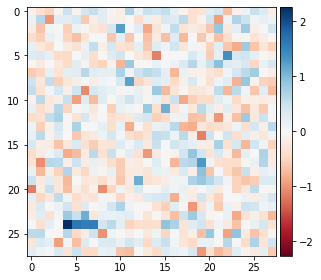

In [213]:
io.imshow(X_rp_reconstructed[0,:].reshape(28,28))

In [215]:

n_runs = 10
reduced_dim = 100

# Initialize a list to store the results
results = []

# Run Random Projection multiple times with different random seeds
for i in range(n_runs):
    rp = GaussianRandomProjection(n_components=reduced_dim, random_state=i)
    reduced_data = rp.fit_transform(X_scaled)
    reconstructed = rp.inverse_transform(reduced_data)

    rp_error = mean_squared_error(X_scaled, reconstructed)
    results.append(rp_error)

# Now, 'results' contains the reduced data for each run of the Random Projection algorithm.
# You can use this information to analyze the variation between different runs.


In [216]:
results

[0.7993089590918728,
 0.8014028462049588,
 0.8014933327330369,
 0.801101121157921,
 0.8020905324008527,
 0.8031482291364814,
 0.802912072627024,
 0.8016049972897824,
 0.79804761746543,
 0.7990123862414288]

### LDA on MNIST data

In [248]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [179]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_lda = lda.fit_transform(X_train, y_train)

In [251]:
X_test_lda = lda.transform(X_test)

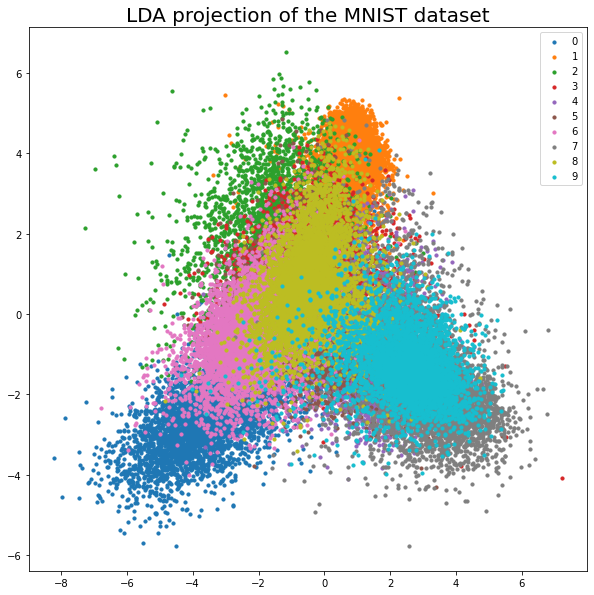

In [183]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(10):
    ax.scatter(X_train_lda[y_train==str(i), 0], X_train_lda[y_train==str(i), 1], label=i, s=10)
ax.set_title("LDA projection of the MNIST dataset", fontsize=20)
ax.legend()
plt.show()

In [184]:
from sklearn.metrics import accuracy_score
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Classification accuracy:", acc_lda)

LDA Classification accuracy: 0.8677142857142857


# 3. Reduce dimension and then clustering

### PCA ==> Kmean on MNIST

In [236]:
pca = PCA(n_components=90)
X_pca = pca.fit_transform(X_scaled)
start_time = time.time()

# Initialize the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X_pca)

end_time = time.time()


# Get the cluster labels for each data point
labels_pca = kmeans.predict(X_pca)
end_predict_time = time.time()

print("Training time for K-means on MNIST data is:", end_time - start_time)
print("Prediction time for K-means on MNIST data is:", end_predict_time - end_time)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training time for K-means on MNIST data is: 4.625548839569092
Prediction time for K-means on MNIST data is: 0.008713245391845703


In [471]:
silhouette_avg = silhouette_score(X, labels_pca)

In [472]:
print("The average Silhouette Score for PCA ==> Kmean on MNist is:", silhouette_avg)

The average Silhouette Score for PCA ==> Kmean on MNist is: 0.05987717558094365


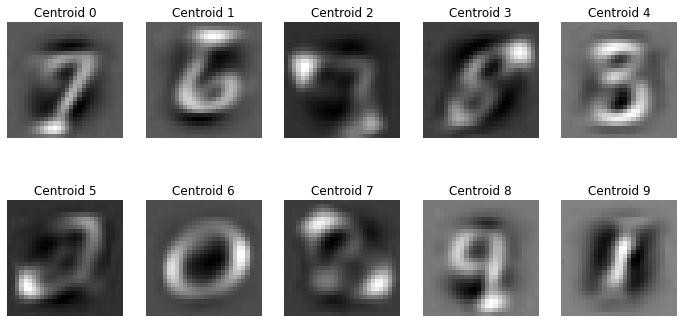

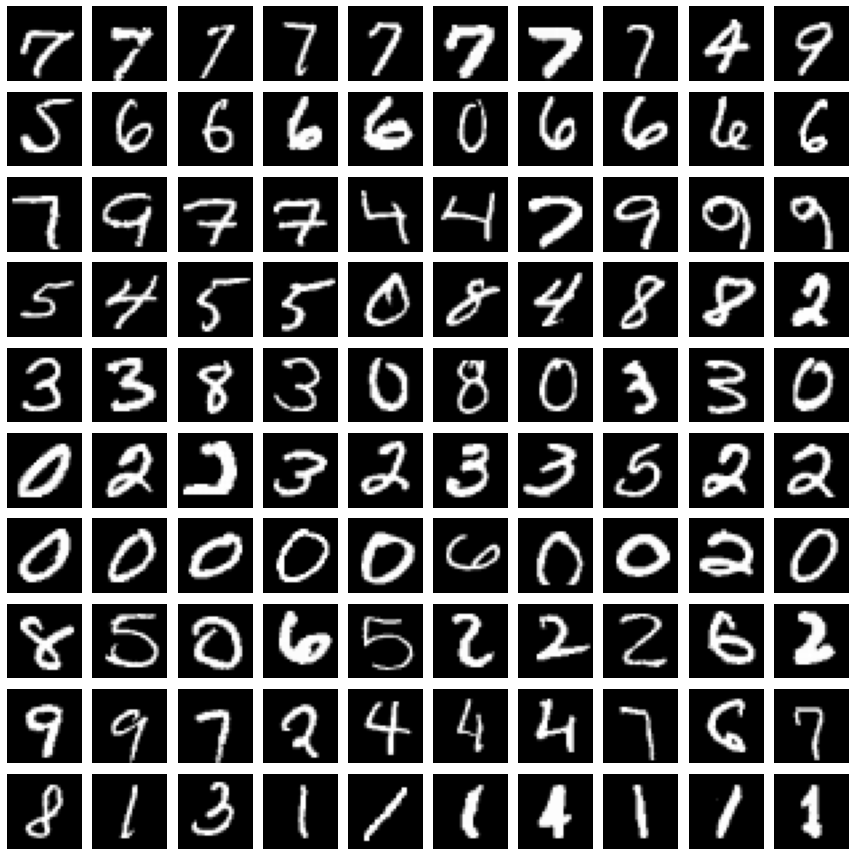

In [237]:
# Plot centroids
pca_centers_reconstructed = pca.inverse_transform(kmeans.cluster_centers_)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(pca_centers_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))

# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[labels_pca == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### PCA ==> EM on MNIST

In [232]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=10)

em.fit(X_pca)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_pca)
end_predict_time = time.time()
print("Training time of EM on MNIST data is:", end_time - start_time)
print("Prediction time of EM on MNIST data is:", end_predict_time - end_time)


/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Training time of EM on MNIST data is: 91.43152189254761
Prediction time of EM on MNIST data is: 0.4015979766845703


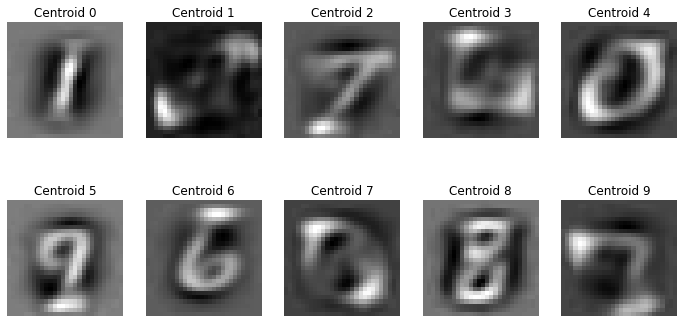

In [233]:
# Plot centroids
em_center_reconstructed = pca.inverse_transform(em.means_)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(em_center_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))


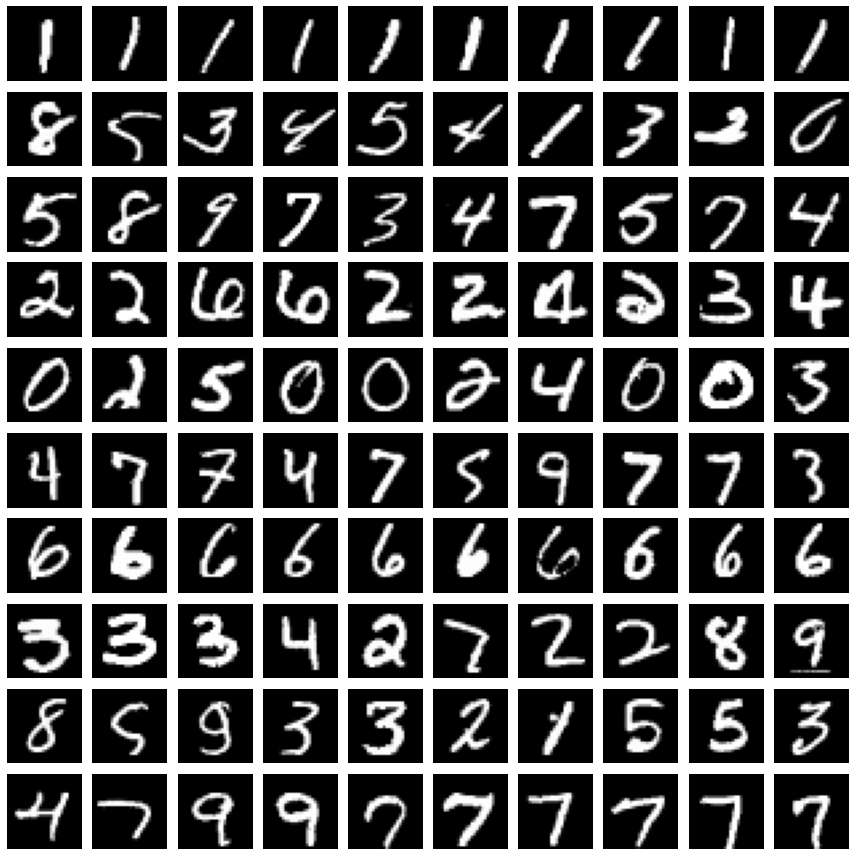

In [235]:

# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[predicted_labels == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### ICA ==> KMean on MNIST

In [265]:
# Initialize the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X_ica)

end_time = time.time()


# Get the cluster labels for each data point
labels_ica_kmean = kmeans.predict(X_ica)
end_predict_time = time.time()

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [218]:
silhouette_avg_ica_kmean = silhouette_score(X, labels_ica_kmean)


In [219]:
print("The average Silhouette score for ICA ==> Kmean is", silhouette_avg_ica_kmean)

The average Silhouette score for ICA ==> Kmean is -0.08426928343263848


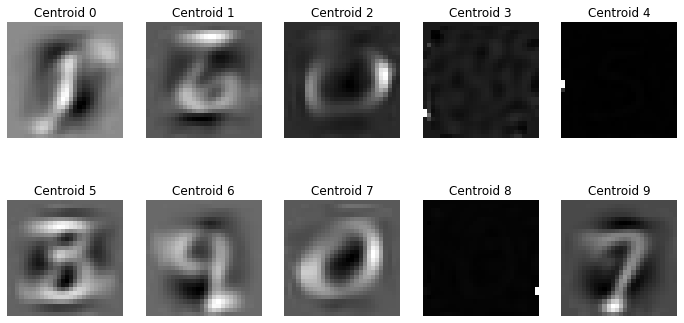

In [220]:
# Plot centroids
kmean_center_reconstructed = ica.inverse_transform(kmeans.cluster_centers_)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(kmean_center_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))

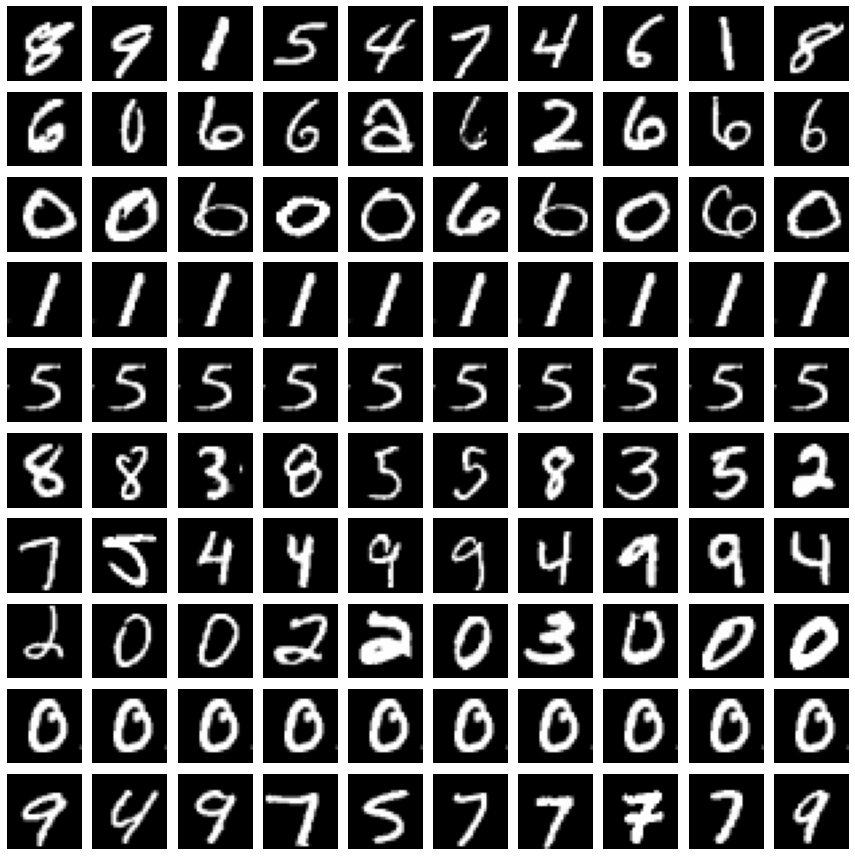

In [231]:
X_ica_reconstructed = ica.inverse_transform(X_ica)
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[labels_ica_kmean == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### ICA ==> EM on MNIST

In [269]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=10)
em.fit(X_ica)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_ica)
end_predict_time = time.time()
print("Training time of EM on MNIST data is:", end_time - start_time)
print("Prediction time of EM on MNIST data is:", end_predict_time - end_time)

Training time of EM on MNIST data is: 33.593148946762085
Prediction time of EM on MNIST data is: 0.4077420234680176


In [226]:
silhouette_avg_ica_em = silhouette_score(X, predicted_labels)
print("The average Silhouette score for ICA ==> EM is", silhouette_avg_ica_em)

The average Silhouette score for ICA ==> EM is -0.07586581832973968


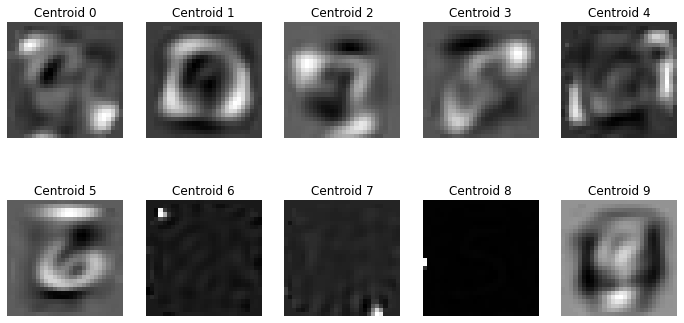

In [227]:
# Plot centroids
em_center_reconstructed = ica.inverse_transform(em.means_)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(em_center_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))


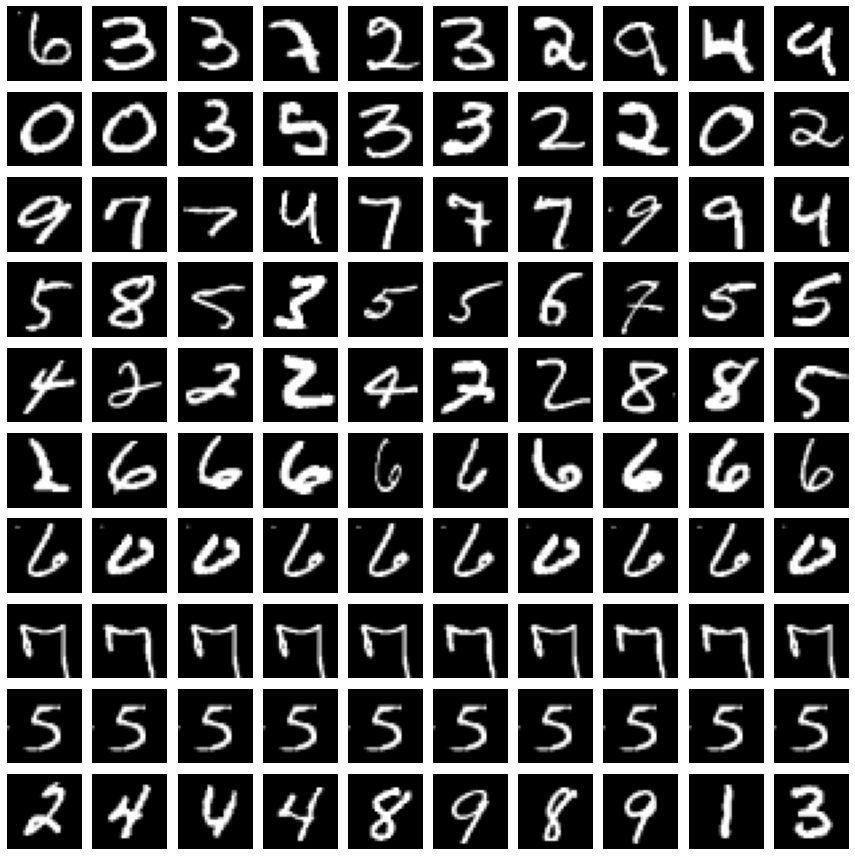

In [230]:
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[predicted_labels == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### RP ==> Kmean

In [273]:

# Initialize the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X_rp)

end_time = time.time()

# Get the cluster labels for each data point
labels_rp_kmean = kmeans.predict(X_rp)
end_predict_time = time.time()
print("Training time of RP ==> Kmean on MNIST data is:", end_time - start_time)
print("Prediction time of RP ==> Kmean on MNIST data is:", end_predict_time - end_time)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training time of RP ==> Kmean on MNIST data is: 407.2448208332062
Prediction time of RP ==> Kmean on MNIST data is: 0.006421089172363281


In [483]:
silhouette_avg_rp_kmean = silhouette_score(X, labels_rp_kmean)


The average Silhouette score for ICA ==> EM is -0.0250792039562321


In [487]:
print("The average Silhouette score for RP ==> Kmean is", silhouette_avg_rp_kmean)

The average Silhouette score for RP ==> Kmean is -0.0030852210098662207


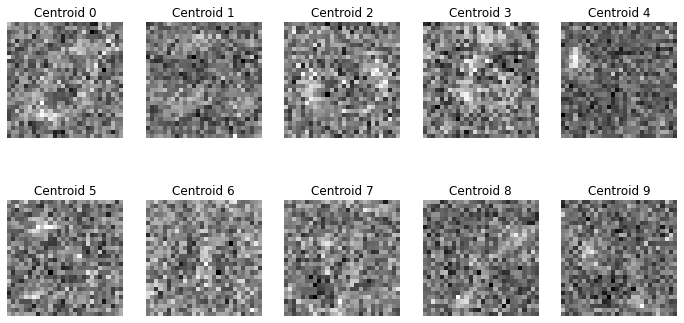

In [241]:
# Plot centroids
kmean_center_reconstructed = rp.inverse_transform(kmeans.cluster_centers_)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(kmean_center_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))


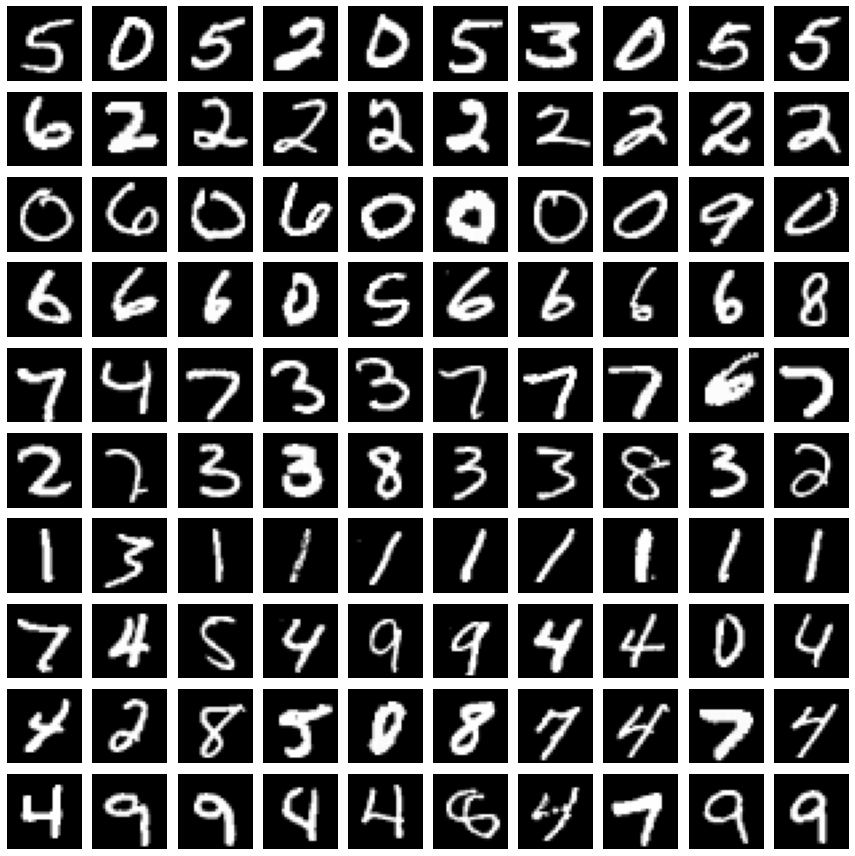

In [243]:
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[labels_rp_kmean == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### RP ==> EM

In [277]:
# Create the EM clustering model and fit the data
start_time = time.time()
em.fit(X_rp)
end_time = time.time()

# Get the predicted labels for the data
labels_rp_em = em.predict(X_rp)
end_predict_time = time.time()
print("Training time of RP ==> EM on MNIST data is:", end_time - start_time)
print("Prediction time of RP ==> EM on MNIST data is:", end_predict_time - end_time)

Training time of RP ==> EM on MNIST data is: 54.714926958084106
Prediction time of RP ==> EM on MNIST data is: 0.4043731689453125


In [485]:
silhouette_avg_rp_em = silhouette_score(X, labels_rp_em)
print("The average Silhouette score for RP ==> EM is", silhouette_avg_rp_em)

The average Silhouette score for RP ==> EM is 5.424041762646409e-05


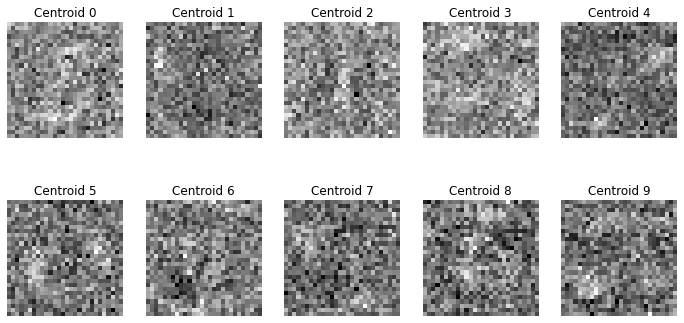

In [246]:
# Plot centroids
em_center_reconstructed = rp.inverse_transform(em.means_)
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(em_center_reconstructed[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title('Centroid {}'.format(i))


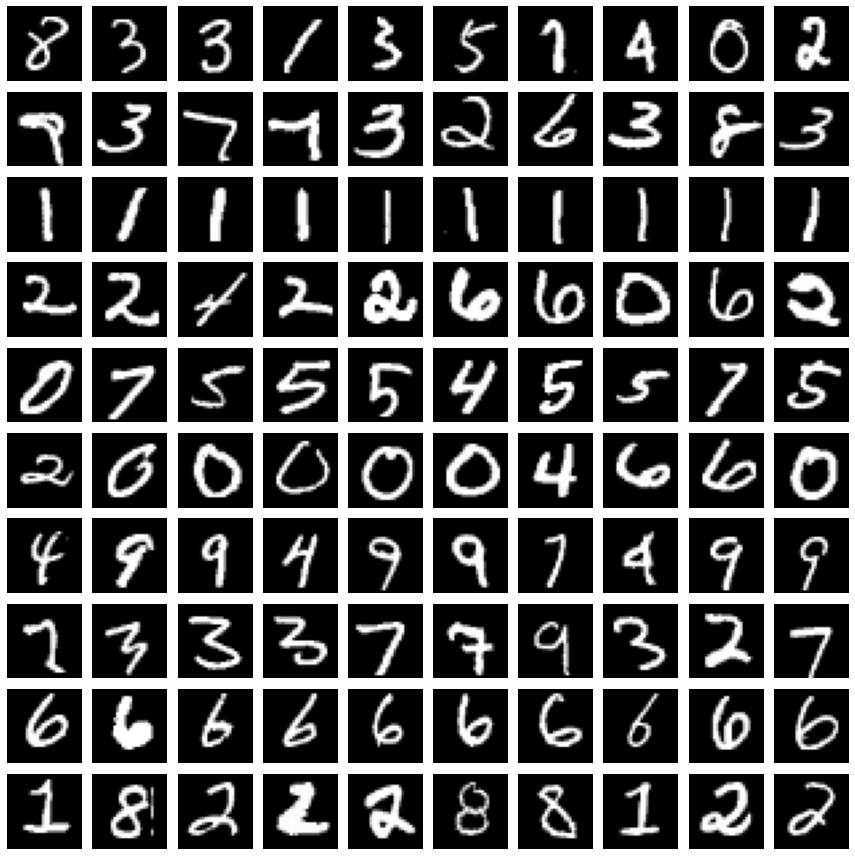

In [247]:
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X[labels_rp_em == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### LDA ==> Kmean

In [282]:

# Initialize the KMeans model
kmeans = KMeans(n_clusters=10, random_state=42)

# Fit the model to the data
kmeans.fit(X_train_lda)

end_time = time.time()

# Get the cluster labels for each data point
labels_lda_kmean = kmeans.predict(X_train_lda)
end_predict_time = time.time()
print("Training time of LDA ==> Kmean on MNIST data is:", end_time - start_time)
print("Prediction time of LDA ==> Kmean on MNIST data is:", end_predict_time - end_time)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training time of LDA ==> Kmean on MNIST data is: 266.7142131328583
Prediction time of LDA ==> Kmean on MNIST data is: 0.003101825714111328


In [493]:
silhouette_avg_lda_kmean = silhouette_score(X_train, labels_lda_kmean)
print("The average Silhouette score for LDA ==> KMean is", silhouette_avg_lda_kmean)

The average Silhouette score for LDA ==> KMean is 0.05114872282386543


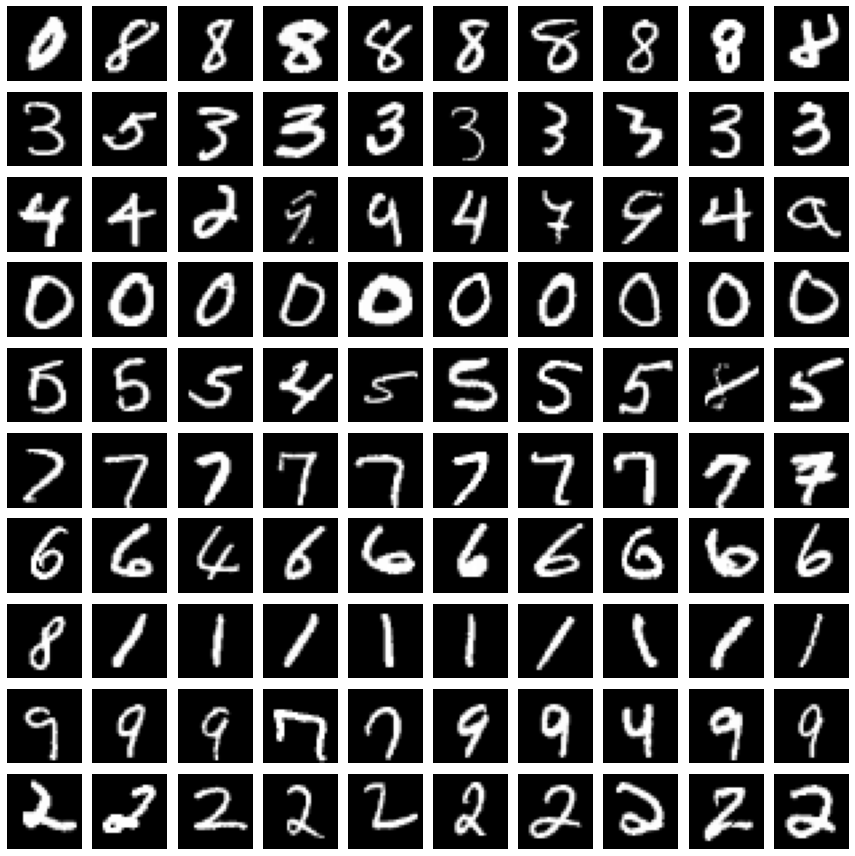

In [254]:
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X_train[labels_lda_kmean == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

### LDA ==> EM

In [283]:
# Create the EM clustering model and fit the data
start_time = time.time()
em.fit(X_train_lda)
end_time = time.time()

# Get the predicted labels for the data
labels_lda_em = em.predict(X_train_lda)
end_predict_time = time.time()
print("Training time of LDA ==> EM on MNIST data is:", end_time - start_time)
print("Prediction time of LDA ==> EM on MNIST data is:", end_predict_time - end_time)

Training time of LDA ==> EM on MNIST data is: 1.4126019477844238
Prediction time of LDA ==> EM on MNIST data is: 0.028319120407104492


In [495]:
silhouette_avg_lda_em = silhouette_score(X_train, labels_lda_em)
print("The average Silhouette score for LDA ==> EM is", silhouette_avg_lda_em)

The average Silhouette score for LDA ==> EM is 0.026359425920330647


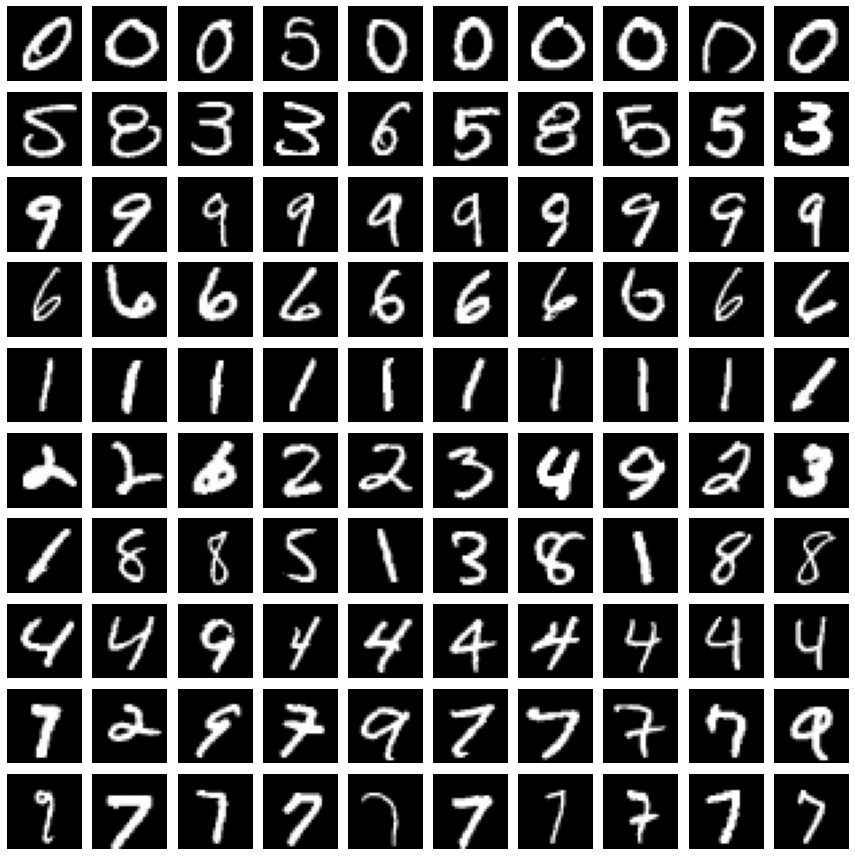

In [256]:
# Plot random samples from each cluster
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        samples = X_train[labels_lda_em == i]
        idx = np.random.randint(samples.shape[0])
        axs[i, j].imshow(np.array(samples)[idx].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
        if j == 0:
            axs[i, j].set_ylabel('Cluster {}'.format(i))
            
plt.tight_layout()
plt.show()

# 4. Apply Demension Reduction to Neural Network

In [257]:
import torch
import torchvision
from torch.nn import functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import os
from torch.utils.data import Dataset, DataLoader
import copy

In [258]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.inputs = torch.tensor(X)
        self.target = torch.tensor(y)
        
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, idx):
        inputs = self.inputs[idx]
        target = self.target[idx]
        return inputs, target

In [259]:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(n_input, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, n_input)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def name(self):
        return "MLP"

In [260]:
def run(train_data_nn, test_data_nn):


    train_loader = torch.utils.data.DataLoader(
        dataset=train_data_nn,
        batch_size=batch_size,
        shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        dataset=test_data_nn,
        batch_size=batch_size,
        shuffle=True)

    # Model, Optimizer, Loss
    model = MLPNet()
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_loss_history = []
    train_acc_history = []
    valid_loss_history = []
    valid_acc_history = []
    best_acc = 0.0
    best_model = None

    for epoch in range(epochs):

        # Make sure gradient tracking is on, and do pass over the data
        model.train(True)
        epoch_loss, epoch_acc = train(epoch, train_loader, model, optimizer, loss_function, debug)


        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)

        # don't need gradients to do reporting
        model.train(False)

        # evaluate on test data
        valid_loss, valid_acc = evaluate(test_loader, model, loss_function, debug)


        if debug:
            print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

        valid_loss_history.append(valid_loss)
        valid_acc_history.append(valid_acc)

        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model = copy.deepcopy(model)

    _, test_acc = evaluate(test_loader, best_model, loss_function)  # test the best model
 
    if debug:
        print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))

    return test_acc, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history





In [261]:
def train(epoch, train_loader, model, optimizer, loss_function, debug=True):
    """
    A training function that trains the model for one epoch
    :param epoch: The index of current epoch
    :param batched_train_data: A list containing batches of images
    :param batched_train_label: A list containing batches of labels
    :param model: The model to be trained
    :param optimizer: The optimizer that updates the network weights
    :return:
        epoch_loss: The average loss of current epoch
        epoch_acc: The overall accuracy of current epoch
    """
    epoch_loss = 0.0
    hits = 0
    count_samples = 0.0

    for idx, data in enumerate(train_loader):
        input, target  = data
        target = target.long()
        # zero gradients for every batch
        optimizer.zero_grad()
        #make predictions for this batch
        start_time = time.time()
        pred = model(input.float())
        # compute loss and its gradients
        loss = loss_function(pred, target)
        loss.backward()
        # adjust learning weights
        optimizer.step()
        # compute  accuracy
        _, pred_label = torch.max(pred.data, 1)
        correct = (pred_label.reshape(-1) == target.data).sum()
        #print(pred_label)
        #print(correct)
        #print(len(target))
        accuracy = correct/len(target)
        loss = loss.detach().numpy()
        epoch_loss += loss
    
        # count of accurate prediction
        hits += accuracy * len(target)
        # count of total sample data have been trained on
        count_samples += len(target)

        forward_time = time.time() - start_time
        if idx % 100 == 0 and debug:
            print(('Epoch: [{0}][{1}/{2}]\t'
                   'Batch Time {batch_time:.3f} \t'
                   'Batch Loss {loss:.4f}\t'
                   'Train Accuracy ' + "{accuracy:.4f}" '\t').format(
                epoch, idx, len(train_loader), batch_time=forward_time,
                loss=loss, accuracy=accuracy))

    epoch_loss /= len(train_loader),
    epoch_acc = hits / count_samples

    if debug:
        print("* Average Accuracy of Epoch {} is: {:.4f}".format(epoch, epoch_acc))
    return epoch_loss, epoch_acc


def evaluate(test_loader, model, loss_function, debug=True):
    """
    Evaluate the model on test data
    :param batched_test_data: A list containing batches of test images
    :param batched_test_label: A list containing batches of labels
    :param model: A pre-trained model
    :return:
        epoch_loss: The average loss of current epoch
        epoch_acc: The overall accuracy of current epoch
    """
    epoch_loss = 0.0
    hits = 0
    count_samples = 0.0
    for idx, data in enumerate(test_loader):
        input, target = data
        target = target.long()
        #target = target.unsqueeze(1)
        #target = target.float()
        pred = model(input.float())
        loss = loss_function(pred, target)
        _, pred_label = torch.max(pred.data, 1)
        correct = (pred_label.reshape(-1) == target.data).sum()
        accuracy = correct/len(target)
        loss = loss.detach().numpy()
        epoch_loss += loss
        hits += accuracy * len(target)
        count_samples += len(target)
        if debug:
            print(('Evaluate: [{0}/{1}]\t'
                   'Batch Accuracy ' + "{accuracy:.4f}" '\t').format(
                idx, len(test_loader), accuracy=accuracy))

    epoch_loss /= len(test_loader)
    epoch_acc = hits / count_samples

    return epoch_loss, epoch_acc


def plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, problem_name):
    """
    Plot learning curves with matplotlib. Make sure training loss and validation loss are plot in the same figure and
    training accuracy and validation accuracy are plot in the same figure too.
    :param train_loss_history: training loss history of epochs
    :param train_acc_history: training accuracy history of epochs
    :param valid_loss_history: validation loss history of epochs
    :param valid_acc_history: validation accuracy history of epochs
    :return: None, save two figures in the current directory
    """
    
    print(train_acc_history)
    print(valid_acc_history)
    print(train_loss_history)
    print(valid_loss_history)
    epochs = range(1, 11)
    f = plt.figure(1)
    plt.plot(epochs, train_loss_history, 'g', label = 'Training loss')
    plt.plot(epochs, valid_loss_history, 'b', label = 'Validation loss')
    plt.title(f'Training and Validation loss - {problem_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    f.show()
    plt.savefig(f'Neural_Network_Loss_{problem_name}.png')
    
    g = plt.figure(2)
    plt.plot(epochs, train_acc_history, 'g', label = 'Training accuracy')
    plt.plot(epochs, valid_acc_history, 'b', label = 'Validation accuracy')
    plt.title(f'Training and Validation accuracy - {problem_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    g.show()
    plt.savefig(f'Neural_Network_Accuracy_{problem_name}.png')






### PCA ==> Neural Network

In [661]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'PCA to NN')


    print("PCA==>NN test accuracy:", nn_accuracy, "running time:", nn_time)
   

In [662]:
# Perform PCA with n_components=3
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [663]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = X_pca
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]
    

Epoch: [0][0/875]	Batch Time 0.033 	Batch Loss 2.3558	Train Accuracy 0.1562	
Epoch: [0][100/875]	Batch Time 0.004 	Batch Loss 0.3203	Train Accuracy 0.9219	
Epoch: [0][200/875]	Batch Time 0.002 	Batch Loss 0.2039	Train Accuracy 0.9688	
Epoch: [0][300/875]	Batch Time 0.002 	Batch Loss 0.3848	Train Accuracy 0.8906	
Epoch: [0][400/875]	Batch Time 0.003 	Batch Loss 0.2944	Train Accuracy 0.9062	
Epoch: [0][500/875]	Batch Time 0.004 	Batch Loss 0.3501	Train Accuracy 0.8750	
Epoch: [0][600/875]	Batch Time 0.003 	Batch Loss 0.3747	Train Accuracy 0.9062	
Epoch: [0][700/875]	Batch Time 0.003 	Batch Loss 0.4844	Train Accuracy 0.8438	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.1483	Train Accuracy 0.9219	
* Average Accuracy of Epoch 0 is: 0.8717
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.8750	
Evaluate: [2/219]	Batch Accuracy 0.8594	
Evaluate: [3/219]	Batch Accuracy 0.8438	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9375	
Eval

Epoch: [1][100/875]	Batch Time 0.003 	Batch Loss 0.4366	Train Accuracy 0.8438	
Epoch: [1][200/875]	Batch Time 0.003 	Batch Loss 0.2719	Train Accuracy 0.8906	
Epoch: [1][300/875]	Batch Time 0.003 	Batch Loss 0.3030	Train Accuracy 0.8906	
Epoch: [1][400/875]	Batch Time 0.003 	Batch Loss 0.3837	Train Accuracy 0.9375	
Epoch: [1][500/875]	Batch Time 0.004 	Batch Loss 0.3180	Train Accuracy 0.8906	
Epoch: [1][600/875]	Batch Time 0.004 	Batch Loss 0.3262	Train Accuracy 0.8750	
Epoch: [1][700/875]	Batch Time 0.003 	Batch Loss 0.2974	Train Accuracy 0.8438	
Epoch: [1][800/875]	Batch Time 0.004 	Batch Loss 0.2085	Train Accuracy 0.9375	
* Average Accuracy of Epoch 1 is: 0.9041
Evaluate: [0/219]	Batch Accuracy 0.9844	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.8906	
Evaluate: [3/219]	Batch Accuracy 0.8125	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.8438	
Evaluate: [6/219]	Batch Accuracy 0.9062	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [2][100/875]	Batch Time 0.005 	Batch Loss 0.3708	Train Accuracy 0.9062	
Epoch: [2][200/875]	Batch Time 0.003 	Batch Loss 0.4189	Train Accuracy 0.8281	
Epoch: [2][300/875]	Batch Time 0.003 	Batch Loss 0.2030	Train Accuracy 0.9375	
Epoch: [2][400/875]	Batch Time 0.003 	Batch Loss 0.3094	Train Accuracy 0.9062	
Epoch: [2][500/875]	Batch Time 0.004 	Batch Loss 0.3132	Train Accuracy 0.8594	
Epoch: [2][600/875]	Batch Time 0.003 	Batch Loss 0.2606	Train Accuracy 0.9375	
Epoch: [2][700/875]	Batch Time 0.003 	Batch Loss 0.2241	Train Accuracy 0.9375	
Epoch: [2][800/875]	Batch Time 0.003 	Batch Loss 0.2718	Train Accuracy 0.9062	
* Average Accuracy of Epoch 2 is: 0.9131
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.8594	
Evaluate: [2/219]	Batch Accuracy 0.8438	
Evaluate: [3/219]	Batch Accuracy 0.8750	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.8750	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.8906	

Epoch: [3][100/875]	Batch Time 0.003 	Batch Loss 0.6007	Train Accuracy 0.8438	
Epoch: [3][200/875]	Batch Time 0.003 	Batch Loss 0.1192	Train Accuracy 0.9688	
Epoch: [3][300/875]	Batch Time 0.003 	Batch Loss 0.1196	Train Accuracy 0.9688	
Epoch: [3][400/875]	Batch Time 0.004 	Batch Loss 0.1942	Train Accuracy 0.9531	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 0.2408	Train Accuracy 0.9375	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 0.2082	Train Accuracy 0.9219	
Epoch: [3][700/875]	Batch Time 0.003 	Batch Loss 0.2045	Train Accuracy 0.9375	
Epoch: [3][800/875]	Batch Time 0.004 	Batch Loss 0.2052	Train Accuracy 0.8906	
* Average Accuracy of Epoch 3 is: 0.9192
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.8438	
Evaluate: [5/219]	Batch Accuracy 0.8750	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.8906	

Epoch: [4][100/875]	Batch Time 0.003 	Batch Loss 0.3014	Train Accuracy 0.8750	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 0.3187	Train Accuracy 0.9219	
Epoch: [4][300/875]	Batch Time 0.003 	Batch Loss 0.2618	Train Accuracy 0.8906	
Epoch: [4][400/875]	Batch Time 0.003 	Batch Loss 0.1717	Train Accuracy 0.9375	
Epoch: [4][500/875]	Batch Time 0.003 	Batch Loss 0.4053	Train Accuracy 0.8750	
Epoch: [4][600/875]	Batch Time 0.004 	Batch Loss 0.2756	Train Accuracy 0.9219	
Epoch: [4][700/875]	Batch Time 0.003 	Batch Loss 0.0978	Train Accuracy 0.9688	
Epoch: [4][800/875]	Batch Time 0.003 	Batch Loss 0.1615	Train Accuracy 0.9531	
* Average Accuracy of Epoch 4 is: 0.9226
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.8906	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.8594	
Evaluate: [5/219]	Batch Accuracy 0.8750	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [5][100/875]	Batch Time 0.003 	Batch Loss 0.1955	Train Accuracy 0.9375	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 0.1615	Train Accuracy 0.9375	
Epoch: [5][300/875]	Batch Time 0.003 	Batch Loss 0.1093	Train Accuracy 0.9531	
Epoch: [5][400/875]	Batch Time 0.004 	Batch Loss 0.3298	Train Accuracy 0.9219	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 0.1645	Train Accuracy 0.9219	
Epoch: [5][600/875]	Batch Time 0.003 	Batch Loss 0.1729	Train Accuracy 0.9219	
Epoch: [5][700/875]	Batch Time 0.003 	Batch Loss 0.3084	Train Accuracy 0.8906	
Epoch: [5][800/875]	Batch Time 0.003 	Batch Loss 0.3208	Train Accuracy 0.8750	
* Average Accuracy of Epoch 5 is: 0.9255
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.9219	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 0.2090	Train Accuracy 0.9375	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 0.1116	Train Accuracy 0.9688	
Epoch: [6][300/875]	Batch Time 0.003 	Batch Loss 0.3401	Train Accuracy 0.9375	
Epoch: [6][400/875]	Batch Time 0.003 	Batch Loss 0.1687	Train Accuracy 0.9375	
Epoch: [6][500/875]	Batch Time 0.003 	Batch Loss 0.3281	Train Accuracy 0.8594	
Epoch: [6][600/875]	Batch Time 0.003 	Batch Loss 0.2897	Train Accuracy 0.8906	
Epoch: [6][700/875]	Batch Time 0.004 	Batch Loss 0.2040	Train Accuracy 0.9219	
Epoch: [6][800/875]	Batch Time 0.003 	Batch Loss 0.3774	Train Accuracy 0.8750	
* Average Accuracy of Epoch 6 is: 0.9279
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.8906	
Evaluate: [2/219]	Batch Accuracy 0.8906	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.8438	
Evaluate: [5/219]	Batch Accuracy 0.9375	
Evaluate: [6/219]	Batch Accuracy 0.8438	
Evaluate: [7/219]	Batch Accuracy 0.8906	

Epoch: [7][100/875]	Batch Time 0.002 	Batch Loss 0.3516	Train Accuracy 0.9062	
Epoch: [7][200/875]	Batch Time 0.004 	Batch Loss 0.2099	Train Accuracy 0.9062	
Epoch: [7][300/875]	Batch Time 0.003 	Batch Loss 0.1335	Train Accuracy 0.9688	
Epoch: [7][400/875]	Batch Time 0.003 	Batch Loss 0.1570	Train Accuracy 0.9688	
Epoch: [7][500/875]	Batch Time 0.005 	Batch Loss 0.1213	Train Accuracy 0.9375	
Epoch: [7][600/875]	Batch Time 0.003 	Batch Loss 0.1826	Train Accuracy 0.9531	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 0.2401	Train Accuracy 0.9219	
Epoch: [7][800/875]	Batch Time 0.003 	Batch Loss 0.2088	Train Accuracy 0.9375	
* Average Accuracy of Epoch 7 is: 0.9305
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.9219	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.8906	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.8906	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [8][100/875]	Batch Time 0.003 	Batch Loss 0.1497	Train Accuracy 0.9375	
Epoch: [8][200/875]	Batch Time 0.003 	Batch Loss 0.0956	Train Accuracy 0.9531	
Epoch: [8][300/875]	Batch Time 0.003 	Batch Loss 0.2763	Train Accuracy 0.9219	
Epoch: [8][400/875]	Batch Time 0.004 	Batch Loss 0.2671	Train Accuracy 0.9219	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 0.2003	Train Accuracy 0.9375	
Epoch: [8][600/875]	Batch Time 0.003 	Batch Loss 0.2084	Train Accuracy 0.9219	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 0.1083	Train Accuracy 0.9531	
Epoch: [8][800/875]	Batch Time 0.003 	Batch Loss 0.1275	Train Accuracy 0.9375	
* Average Accuracy of Epoch 8 is: 0.9313
Evaluate: [0/219]	Batch Accuracy 0.9531	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9844	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [9][100/875]	Batch Time 0.003 	Batch Loss 0.2203	Train Accuracy 0.9062	
Epoch: [9][200/875]	Batch Time 0.004 	Batch Loss 0.0476	Train Accuracy 1.0000	
Epoch: [9][300/875]	Batch Time 0.003 	Batch Loss 0.1347	Train Accuracy 0.9531	
Epoch: [9][400/875]	Batch Time 0.003 	Batch Loss 0.1502	Train Accuracy 0.9688	
Epoch: [9][500/875]	Batch Time 0.003 	Batch Loss 0.3704	Train Accuracy 0.8438	
Epoch: [9][600/875]	Batch Time 0.003 	Batch Loss 0.0831	Train Accuracy 0.9688	
Epoch: [9][700/875]	Batch Time 0.003 	Batch Loss 0.1939	Train Accuracy 0.9375	
Epoch: [9][800/875]	Batch Time 0.003 	Batch Loss 0.2360	Train Accuracy 0.9062	
* Average Accuracy of Epoch 9 is: 0.9334
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9844	
Evaluate: [6/219]	Batch Accuracy 0.9375	
Evaluate: [7/219]	Batch Accuracy 0.9219	

Evaluate: [214/219]	Batch Accuracy 0.9531	
Evaluate: [215/219]	Batch Accuracy 0.9219	
Evaluate: [216/219]	Batch Accuracy 0.9219	
Evaluate: [217/219]	Batch Accuracy 0.9531	
Evaluate: [218/219]	Batch Accuracy 0.8333	
* Validation Accuracy: 0.9236
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.8750	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.8906	
Evaluate: [7/219]	Batch Accuracy 0.8750	
Evaluate: [8/219]	Batch Accuracy 0.9375	
Evaluate: [9/219]	Batch Accuracy 0.8906	
Evaluate: [10/219]	Batch Accuracy 0.9844	
Evaluate: [11/219]	Batch Accuracy 0.9062	
Evaluate: [12/219]	Batch Accuracy 0.8750	
Evaluate: [13/219]	Batch Accuracy 0.9219	
Evaluate: [14/219]	Batch Accuracy 0.9531	
Evaluate: [15/219]	Batch Accuracy 0.9219	
Evaluate: [16/219]	Batch Accuracy 0.9062	
Evaluate: [17/219]	Batch Accuracy 0.8594	
Evaluate:

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


PCA==>NN test accuracy: tensor(0.9236) running time: 39.95372796058655


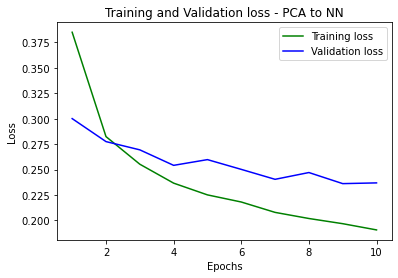

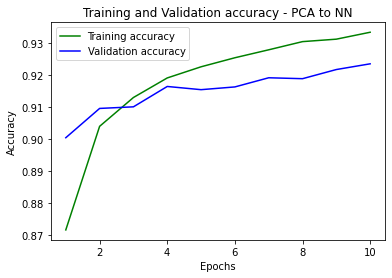

In [664]:
if __name__ == '__main__':
    main()

### ICA ==> Neural Network

In [606]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'ICA to NN')


    print("ICA==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [607]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = X_ica
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]
    

Epoch: [0][0/875]	Batch Time 0.008 	Batch Loss 2.3055	Train Accuracy 0.0781	
Epoch: [0][100/875]	Batch Time 0.004 	Batch Loss 2.2986	Train Accuracy 0.1406	
Epoch: [0][200/875]	Batch Time 0.003 	Batch Loss 2.2983	Train Accuracy 0.1094	
Epoch: [0][300/875]	Batch Time 0.004 	Batch Loss 2.3045	Train Accuracy 0.1094	
Epoch: [0][400/875]	Batch Time 0.004 	Batch Loss 2.3036	Train Accuracy 0.0781	
Epoch: [0][500/875]	Batch Time 0.004 	Batch Loss 2.2848	Train Accuracy 0.1562	
Epoch: [0][600/875]	Batch Time 0.004 	Batch Loss 2.3048	Train Accuracy 0.0625	
Epoch: [0][700/875]	Batch Time 0.004 	Batch Loss 2.3032	Train Accuracy 0.1094	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 2.2914	Train Accuracy 0.1094	
* Average Accuracy of Epoch 0 is: 0.1100
Evaluate: [0/219]	Batch Accuracy 0.0938	
Evaluate: [1/219]	Batch Accuracy 0.1406	
Evaluate: [2/219]	Batch Accuracy 0.1562	
Evaluate: [3/219]	Batch Accuracy 0.1094	
Evaluate: [4/219]	Batch Accuracy 0.1719	
Evaluate: [5/219]	Batch Accuracy 0.1875	
Eval

Epoch: [1][100/875]	Batch Time 0.004 	Batch Loss 2.2862	Train Accuracy 0.1406	
Epoch: [1][200/875]	Batch Time 0.004 	Batch Loss 2.3015	Train Accuracy 0.1406	
Epoch: [1][300/875]	Batch Time 0.003 	Batch Loss 2.2954	Train Accuracy 0.0625	
Epoch: [1][400/875]	Batch Time 0.003 	Batch Loss 2.2946	Train Accuracy 0.1875	
Epoch: [1][500/875]	Batch Time 0.003 	Batch Loss 2.3010	Train Accuracy 0.0938	
Epoch: [1][600/875]	Batch Time 0.003 	Batch Loss 2.3200	Train Accuracy 0.0625	
Epoch: [1][700/875]	Batch Time 0.003 	Batch Loss 2.2992	Train Accuracy 0.0625	
Epoch: [1][800/875]	Batch Time 0.004 	Batch Loss 2.3025	Train Accuracy 0.1562	
* Average Accuracy of Epoch 1 is: 0.1114
Evaluate: [0/219]	Batch Accuracy 0.0938	
Evaluate: [1/219]	Batch Accuracy 0.0781	
Evaluate: [2/219]	Batch Accuracy 0.1094	
Evaluate: [3/219]	Batch Accuracy 0.1250	
Evaluate: [4/219]	Batch Accuracy 0.1094	
Evaluate: [5/219]	Batch Accuracy 0.0469	
Evaluate: [6/219]	Batch Accuracy 0.0781	
Evaluate: [7/219]	Batch Accuracy 0.2344	

Epoch: [2][100/875]	Batch Time 0.004 	Batch Loss 2.3009	Train Accuracy 0.0469	
Epoch: [2][200/875]	Batch Time 0.004 	Batch Loss 2.2882	Train Accuracy 0.1719	
Epoch: [2][300/875]	Batch Time 0.004 	Batch Loss 2.2892	Train Accuracy 0.2344	
Epoch: [2][400/875]	Batch Time 0.003 	Batch Loss 2.3026	Train Accuracy 0.1250	
Epoch: [2][500/875]	Batch Time 0.003 	Batch Loss 2.3054	Train Accuracy 0.0938	
Epoch: [2][600/875]	Batch Time 0.004 	Batch Loss 2.3061	Train Accuracy 0.0938	
Epoch: [2][700/875]	Batch Time 0.004 	Batch Loss 2.2964	Train Accuracy 0.1562	
Epoch: [2][800/875]	Batch Time 0.003 	Batch Loss 2.2993	Train Accuracy 0.0938	
* Average Accuracy of Epoch 2 is: 0.1113
Evaluate: [0/219]	Batch Accuracy 0.1094	
Evaluate: [1/219]	Batch Accuracy 0.0781	
Evaluate: [2/219]	Batch Accuracy 0.2031	
Evaluate: [3/219]	Batch Accuracy 0.1094	
Evaluate: [4/219]	Batch Accuracy 0.1250	
Evaluate: [5/219]	Batch Accuracy 0.1406	
Evaluate: [6/219]	Batch Accuracy 0.1094	
Evaluate: [7/219]	Batch Accuracy 0.0625	

Epoch: [3][100/875]	Batch Time 0.004 	Batch Loss 2.3053	Train Accuracy 0.1406	
Epoch: [3][200/875]	Batch Time 0.004 	Batch Loss 2.2975	Train Accuracy 0.1406	
Epoch: [3][300/875]	Batch Time 0.005 	Batch Loss 2.3046	Train Accuracy 0.0469	
Epoch: [3][400/875]	Batch Time 0.003 	Batch Loss 2.2872	Train Accuracy 0.1250	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 2.3042	Train Accuracy 0.0781	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 2.2839	Train Accuracy 0.1406	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 2.2909	Train Accuracy 0.1406	
Epoch: [3][800/875]	Batch Time 0.004 	Batch Loss 2.2972	Train Accuracy 0.1406	
* Average Accuracy of Epoch 3 is: 0.1117
Evaluate: [0/219]	Batch Accuracy 0.1250	
Evaluate: [1/219]	Batch Accuracy 0.0469	
Evaluate: [2/219]	Batch Accuracy 0.1250	
Evaluate: [3/219]	Batch Accuracy 0.0781	
Evaluate: [4/219]	Batch Accuracy 0.1094	
Evaluate: [5/219]	Batch Accuracy 0.1250	
Evaluate: [6/219]	Batch Accuracy 0.1250	
Evaluate: [7/219]	Batch Accuracy 0.1406	

Epoch: [4][100/875]	Batch Time 0.004 	Batch Loss 2.2984	Train Accuracy 0.1250	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 2.2974	Train Accuracy 0.1250	
Epoch: [4][300/875]	Batch Time 0.004 	Batch Loss 2.2935	Train Accuracy 0.1406	
Epoch: [4][400/875]	Batch Time 0.004 	Batch Loss 2.3051	Train Accuracy 0.0781	
Epoch: [4][500/875]	Batch Time 0.004 	Batch Loss 2.2911	Train Accuracy 0.0938	
Epoch: [4][600/875]	Batch Time 0.004 	Batch Loss 2.2984	Train Accuracy 0.0625	
Epoch: [4][700/875]	Batch Time 0.004 	Batch Loss 2.3053	Train Accuracy 0.0625	
Epoch: [4][800/875]	Batch Time 0.004 	Batch Loss 2.3061	Train Accuracy 0.0625	
* Average Accuracy of Epoch 4 is: 0.1112
Evaluate: [0/219]	Batch Accuracy 0.1250	
Evaluate: [1/219]	Batch Accuracy 0.1250	
Evaluate: [2/219]	Batch Accuracy 0.1406	
Evaluate: [3/219]	Batch Accuracy 0.1094	
Evaluate: [4/219]	Batch Accuracy 0.1094	
Evaluate: [5/219]	Batch Accuracy 0.0625	
Evaluate: [6/219]	Batch Accuracy 0.0625	
Evaluate: [7/219]	Batch Accuracy 0.1250	

Epoch: [5][100/875]	Batch Time 0.004 	Batch Loss 2.2980	Train Accuracy 0.1562	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 2.3085	Train Accuracy 0.0625	
Epoch: [5][300/875]	Batch Time 0.003 	Batch Loss 2.2901	Train Accuracy 0.1094	
Epoch: [5][400/875]	Batch Time 0.002 	Batch Loss 2.3038	Train Accuracy 0.0781	
Epoch: [5][500/875]	Batch Time 0.005 	Batch Loss 2.3095	Train Accuracy 0.1250	
Epoch: [5][600/875]	Batch Time 0.005 	Batch Loss 2.3000	Train Accuracy 0.0938	
Epoch: [5][700/875]	Batch Time 0.005 	Batch Loss 2.2798	Train Accuracy 0.1562	
Epoch: [5][800/875]	Batch Time 0.004 	Batch Loss 2.3022	Train Accuracy 0.0625	
* Average Accuracy of Epoch 5 is: 0.1128
Evaluate: [0/219]	Batch Accuracy 0.0312	
Evaluate: [1/219]	Batch Accuracy 0.0938	
Evaluate: [2/219]	Batch Accuracy 0.1250	
Evaluate: [3/219]	Batch Accuracy 0.0156	
Evaluate: [4/219]	Batch Accuracy 0.0625	
Evaluate: [5/219]	Batch Accuracy 0.1094	
Evaluate: [6/219]	Batch Accuracy 0.0625	
Evaluate: [7/219]	Batch Accuracy 0.1406	

Epoch: [6][0/875]	Batch Time 0.020 	Batch Loss 2.2954	Train Accuracy 0.0938	
Epoch: [6][100/875]	Batch Time 0.004 	Batch Loss 2.2889	Train Accuracy 0.1719	
Epoch: [6][200/875]	Batch Time 0.004 	Batch Loss 2.2960	Train Accuracy 0.1094	
Epoch: [6][300/875]	Batch Time 0.004 	Batch Loss 2.2834	Train Accuracy 0.2188	
Epoch: [6][400/875]	Batch Time 0.003 	Batch Loss 2.3018	Train Accuracy 0.0938	
Epoch: [6][500/875]	Batch Time 0.010 	Batch Loss 2.2881	Train Accuracy 0.1562	
Epoch: [6][600/875]	Batch Time 0.004 	Batch Loss 2.3089	Train Accuracy 0.1094	
Epoch: [6][700/875]	Batch Time 0.004 	Batch Loss 2.3057	Train Accuracy 0.0781	
Epoch: [6][800/875]	Batch Time 0.003 	Batch Loss 2.3054	Train Accuracy 0.1094	
* Average Accuracy of Epoch 6 is: 0.1119
Evaluate: [0/219]	Batch Accuracy 0.1875	
Evaluate: [1/219]	Batch Accuracy 0.0781	
Evaluate: [2/219]	Batch Accuracy 0.1250	
Evaluate: [3/219]	Batch Accuracy 0.1094	
Evaluate: [4/219]	Batch Accuracy 0.1250	
Evaluate: [5/219]	Batch Accuracy 0.0312	
Eval

Epoch: [7][100/875]	Batch Time 0.004 	Batch Loss 2.2897	Train Accuracy 0.1406	
Epoch: [7][200/875]	Batch Time 0.004 	Batch Loss 2.3098	Train Accuracy 0.1094	
Epoch: [7][300/875]	Batch Time 0.004 	Batch Loss 2.3032	Train Accuracy 0.1406	
Epoch: [7][400/875]	Batch Time 0.003 	Batch Loss 2.3044	Train Accuracy 0.0469	
Epoch: [7][500/875]	Batch Time 0.004 	Batch Loss 2.3034	Train Accuracy 0.0312	
Epoch: [7][600/875]	Batch Time 0.003 	Batch Loss 2.3019	Train Accuracy 0.0781	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 2.3023	Train Accuracy 0.1250	
Epoch: [7][800/875]	Batch Time 0.003 	Batch Loss 2.3032	Train Accuracy 0.1562	
* Average Accuracy of Epoch 7 is: 0.1141
Evaluate: [0/219]	Batch Accuracy 0.1406	
Evaluate: [1/219]	Batch Accuracy 0.0625	
Evaluate: [2/219]	Batch Accuracy 0.0938	
Evaluate: [3/219]	Batch Accuracy 0.1250	
Evaluate: [4/219]	Batch Accuracy 0.0781	
Evaluate: [5/219]	Batch Accuracy 0.1250	
Evaluate: [6/219]	Batch Accuracy 0.0625	
Evaluate: [7/219]	Batch Accuracy 0.2031	

Epoch: [8][100/875]	Batch Time 0.004 	Batch Loss 2.2950	Train Accuracy 0.1562	
Epoch: [8][200/875]	Batch Time 0.006 	Batch Loss 2.3017	Train Accuracy 0.1094	
Epoch: [8][300/875]	Batch Time 0.004 	Batch Loss 2.2955	Train Accuracy 0.1094	
Epoch: [8][400/875]	Batch Time 0.012 	Batch Loss 2.3057	Train Accuracy 0.0938	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 2.3048	Train Accuracy 0.1094	
Epoch: [8][600/875]	Batch Time 0.007 	Batch Loss 2.2963	Train Accuracy 0.0625	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 2.3033	Train Accuracy 0.1094	
Epoch: [8][800/875]	Batch Time 0.004 	Batch Loss 2.2941	Train Accuracy 0.1406	
* Average Accuracy of Epoch 8 is: 0.1129
Evaluate: [0/219]	Batch Accuracy 0.1094	
Evaluate: [1/219]	Batch Accuracy 0.0625	
Evaluate: [2/219]	Batch Accuracy 0.0781	
Evaluate: [3/219]	Batch Accuracy 0.0469	
Evaluate: [4/219]	Batch Accuracy 0.1406	
Evaluate: [5/219]	Batch Accuracy 0.0938	
Evaluate: [6/219]	Batch Accuracy 0.1562	
Evaluate: [7/219]	Batch Accuracy 0.1250	

Evaluate: [216/219]	Batch Accuracy 0.0938	
Evaluate: [217/219]	Batch Accuracy 0.0625	
Evaluate: [218/219]	Batch Accuracy 0.1458	
* Validation Accuracy: 0.1166
Epoch: [9][0/875]	Batch Time 0.005 	Batch Loss 2.3084	Train Accuracy 0.0938	
Epoch: [9][100/875]	Batch Time 0.013 	Batch Loss 2.2943	Train Accuracy 0.0938	
Epoch: [9][200/875]	Batch Time 0.004 	Batch Loss 2.3047	Train Accuracy 0.1094	
Epoch: [9][300/875]	Batch Time 0.004 	Batch Loss 2.3064	Train Accuracy 0.1094	
Epoch: [9][400/875]	Batch Time 0.004 	Batch Loss 2.2883	Train Accuracy 0.1094	
Epoch: [9][500/875]	Batch Time 0.004 	Batch Loss 2.2998	Train Accuracy 0.0781	
Epoch: [9][600/875]	Batch Time 0.004 	Batch Loss 2.3080	Train Accuracy 0.1250	
Epoch: [9][700/875]	Batch Time 0.004 	Batch Loss 2.3067	Train Accuracy 0.1250	
Epoch: [9][800/875]	Batch Time 0.004 	Batch Loss 2.2806	Train Accuracy 0.1875	
* Average Accuracy of Epoch 9 is: 0.1128
Evaluate: [0/219]	Batch Accuracy 0.1250	
Evaluate: [1/219]	Batch Accuracy 0.0938	
Evaluate:

Evaluate: [17/219]	Batch Accuracy 0.0938	
Evaluate: [18/219]	Batch Accuracy 0.0938	
Evaluate: [19/219]	Batch Accuracy 0.0781	
Evaluate: [20/219]	Batch Accuracy 0.1406	
Evaluate: [21/219]	Batch Accuracy 0.1719	
Evaluate: [22/219]	Batch Accuracy 0.1250	
Evaluate: [23/219]	Batch Accuracy 0.1094	
Evaluate: [24/219]	Batch Accuracy 0.1250	
Evaluate: [25/219]	Batch Accuracy 0.0781	
Evaluate: [26/219]	Batch Accuracy 0.1406	
Evaluate: [27/219]	Batch Accuracy 0.1562	
Evaluate: [28/219]	Batch Accuracy 0.1094	
Evaluate: [29/219]	Batch Accuracy 0.0625	
Evaluate: [30/219]	Batch Accuracy 0.0469	
Evaluate: [31/219]	Batch Accuracy 0.0938	
Evaluate: [32/219]	Batch Accuracy 0.1250	
Evaluate: [33/219]	Batch Accuracy 0.1250	
Evaluate: [34/219]	Batch Accuracy 0.1719	
Evaluate: [35/219]	Batch Accuracy 0.0312	
Evaluate: [36/219]	Batch Accuracy 0.1562	
Evaluate: [37/219]	Batch Accuracy 0.0938	
Evaluate: [38/219]	Batch Accuracy 0.0781	
Evaluate: [39/219]	Batch Accuracy 0.1250	
Evaluate: [40/219]	Batch Accuracy 

ICA==>NN test accuracy: tensor(0.1172) running time: 45.65308904647827


/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


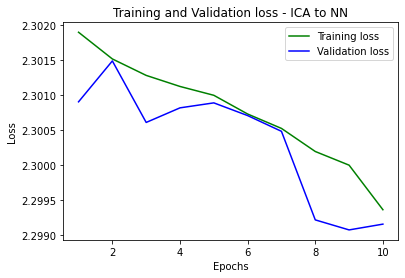

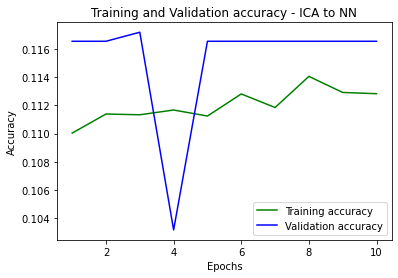

In [608]:
if __name__ == '__main__':
    main()

### RP ==> Neural Network

In [612]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'RP to NN')


    print("RP==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [617]:
# Define the Randomized Projection model
rp = GaussianRandomProjection(n_components=90, random_state=42)

# Fit the model
X_rp = rp.fit_transform(X_scaled)

In [618]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = X_rp
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.017 	Batch Loss 2.3371	Train Accuracy 0.0625	
Epoch: [0][100/875]	Batch Time 0.004 	Batch Loss 1.0129	Train Accuracy 0.6719	
Epoch: [0][200/875]	Batch Time 0.004 	Batch Loss 0.4347	Train Accuracy 0.8750	
Epoch: [0][300/875]	Batch Time 0.003 	Batch Loss 0.4960	Train Accuracy 0.8438	
Epoch: [0][400/875]	Batch Time 0.004 	Batch Loss 0.4421	Train Accuracy 0.8281	
Epoch: [0][500/875]	Batch Time 0.004 	Batch Loss 0.2551	Train Accuracy 0.9062	
Epoch: [0][600/875]	Batch Time 0.004 	Batch Loss 0.1699	Train Accuracy 0.9531	
Epoch: [0][700/875]	Batch Time 0.004 	Batch Loss 0.2722	Train Accuracy 0.9219	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.3155	Train Accuracy 0.8594	
* Average Accuracy of Epoch 0 is: 0.8738
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.9062	
Eval

Evaluate: [198/219]	Batch Accuracy 0.8281	
Evaluate: [199/219]	Batch Accuracy 0.9531	
Evaluate: [200/219]	Batch Accuracy 0.8750	
Evaluate: [201/219]	Batch Accuracy 0.9062	
Evaluate: [202/219]	Batch Accuracy 0.9688	
Evaluate: [203/219]	Batch Accuracy 0.9219	
Evaluate: [204/219]	Batch Accuracy 0.9375	
Evaluate: [205/219]	Batch Accuracy 0.9219	
Evaluate: [206/219]	Batch Accuracy 0.9219	
Evaluate: [207/219]	Batch Accuracy 0.8750	
Evaluate: [208/219]	Batch Accuracy 0.9062	
Evaluate: [209/219]	Batch Accuracy 0.9219	
Evaluate: [210/219]	Batch Accuracy 0.9844	
Evaluate: [211/219]	Batch Accuracy 0.9219	
Evaluate: [212/219]	Batch Accuracy 0.9219	
Evaluate: [213/219]	Batch Accuracy 0.9375	
Evaluate: [214/219]	Batch Accuracy 0.9219	
Evaluate: [215/219]	Batch Accuracy 0.9844	
Evaluate: [216/219]	Batch Accuracy 0.9062	
Evaluate: [217/219]	Batch Accuracy 0.8750	
Evaluate: [218/219]	Batch Accuracy 0.9167	
* Validation Accuracy: 0.9197
Epoch: [1][0/875]	Batch Time 0.005 	Batch Loss 0.2978	Train Accurac

Epoch: [2][100/875]	Batch Time 0.004 	Batch Loss 0.2029	Train Accuracy 0.9219	
Epoch: [2][200/875]	Batch Time 0.006 	Batch Loss 0.1112	Train Accuracy 0.9531	
Epoch: [2][300/875]	Batch Time 0.005 	Batch Loss 0.0944	Train Accuracy 0.9844	
Epoch: [2][400/875]	Batch Time 0.003 	Batch Loss 0.1174	Train Accuracy 0.9531	
Epoch: [2][500/875]	Batch Time 0.004 	Batch Loss 0.1853	Train Accuracy 0.9688	
Epoch: [2][600/875]	Batch Time 0.002 	Batch Loss 0.2152	Train Accuracy 0.9375	
Epoch: [2][700/875]	Batch Time 0.005 	Batch Loss 0.0592	Train Accuracy 1.0000	
Epoch: [2][800/875]	Batch Time 0.004 	Batch Loss 0.3310	Train Accuracy 0.9062	
* Average Accuracy of Epoch 2 is: 0.9549
Evaluate: [0/219]	Batch Accuracy 1.0000	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9844	
Evaluate: [3/219]	Batch Accuracy 1.0000	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9062	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [3][100/875]	Batch Time 0.004 	Batch Loss 0.0317	Train Accuracy 1.0000	
Epoch: [3][200/875]	Batch Time 0.003 	Batch Loss 0.1966	Train Accuracy 0.9219	
Epoch: [3][300/875]	Batch Time 0.004 	Batch Loss 0.0990	Train Accuracy 0.9531	
Epoch: [3][400/875]	Batch Time 0.005 	Batch Loss 0.1999	Train Accuracy 0.9688	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 0.0974	Train Accuracy 0.9531	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 0.0520	Train Accuracy 0.9844	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 0.0603	Train Accuracy 0.9844	
Epoch: [3][800/875]	Batch Time 0.003 	Batch Loss 0.1637	Train Accuracy 0.9531	
* Average Accuracy of Epoch 3 is: 0.9646
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.8750	

Evaluate: [178/219]	Batch Accuracy 0.9375	
Evaluate: [179/219]	Batch Accuracy 0.9062	
Evaluate: [180/219]	Batch Accuracy 0.9688	
Evaluate: [181/219]	Batch Accuracy 0.9219	
Evaluate: [182/219]	Batch Accuracy 0.9219	
Evaluate: [183/219]	Batch Accuracy 0.9531	
Evaluate: [184/219]	Batch Accuracy 0.9375	
Evaluate: [185/219]	Batch Accuracy 0.9531	
Evaluate: [186/219]	Batch Accuracy 0.9375	
Evaluate: [187/219]	Batch Accuracy 0.9531	
Evaluate: [188/219]	Batch Accuracy 0.9531	
Evaluate: [189/219]	Batch Accuracy 0.9844	
Evaluate: [190/219]	Batch Accuracy 0.9219	
Evaluate: [191/219]	Batch Accuracy 0.9531	
Evaluate: [192/219]	Batch Accuracy 0.9375	
Evaluate: [193/219]	Batch Accuracy 0.9844	
Evaluate: [194/219]	Batch Accuracy 0.9062	
Evaluate: [195/219]	Batch Accuracy 0.9844	
Evaluate: [196/219]	Batch Accuracy 0.9531	
Evaluate: [197/219]	Batch Accuracy 0.9375	
Evaluate: [198/219]	Batch Accuracy 0.8750	
Evaluate: [199/219]	Batch Accuracy 0.9688	
Evaluate: [200/219]	Batch Accuracy 0.9531	
Evaluate: [

Evaluate: [135/219]	Batch Accuracy 0.9531	
Evaluate: [136/219]	Batch Accuracy 0.9844	
Evaluate: [137/219]	Batch Accuracy 1.0000	
Evaluate: [138/219]	Batch Accuracy 0.9844	
Evaluate: [139/219]	Batch Accuracy 0.9219	
Evaluate: [140/219]	Batch Accuracy 0.9844	
Evaluate: [141/219]	Batch Accuracy 0.9844	
Evaluate: [142/219]	Batch Accuracy 0.9688	
Evaluate: [143/219]	Batch Accuracy 0.9375	
Evaluate: [144/219]	Batch Accuracy 0.8906	
Evaluate: [145/219]	Batch Accuracy 0.9375	
Evaluate: [146/219]	Batch Accuracy 0.9219	
Evaluate: [147/219]	Batch Accuracy 0.9531	
Evaluate: [148/219]	Batch Accuracy 1.0000	
Evaluate: [149/219]	Batch Accuracy 0.9688	
Evaluate: [150/219]	Batch Accuracy 0.9531	
Evaluate: [151/219]	Batch Accuracy 0.9375	
Evaluate: [152/219]	Batch Accuracy 0.9688	
Evaluate: [153/219]	Batch Accuracy 0.9375	
Evaluate: [154/219]	Batch Accuracy 1.0000	
Evaluate: [155/219]	Batch Accuracy 0.9375	
Evaluate: [156/219]	Batch Accuracy 0.9844	
Evaluate: [157/219]	Batch Accuracy 0.9531	
Evaluate: [

Evaluate: [136/219]	Batch Accuracy 0.9219	
Evaluate: [137/219]	Batch Accuracy 0.9062	
Evaluate: [138/219]	Batch Accuracy 0.9688	
Evaluate: [139/219]	Batch Accuracy 0.9219	
Evaluate: [140/219]	Batch Accuracy 0.9375	
Evaluate: [141/219]	Batch Accuracy 0.9688	
Evaluate: [142/219]	Batch Accuracy 0.9375	
Evaluate: [143/219]	Batch Accuracy 0.9219	
Evaluate: [144/219]	Batch Accuracy 0.9062	
Evaluate: [145/219]	Batch Accuracy 0.9844	
Evaluate: [146/219]	Batch Accuracy 0.9531	
Evaluate: [147/219]	Batch Accuracy 0.9844	
Evaluate: [148/219]	Batch Accuracy 0.9219	
Evaluate: [149/219]	Batch Accuracy 0.9375	
Evaluate: [150/219]	Batch Accuracy 0.9688	
Evaluate: [151/219]	Batch Accuracy 1.0000	
Evaluate: [152/219]	Batch Accuracy 0.9688	
Evaluate: [153/219]	Batch Accuracy 0.9844	
Evaluate: [154/219]	Batch Accuracy 0.9375	
Evaluate: [155/219]	Batch Accuracy 0.9688	
Evaluate: [156/219]	Batch Accuracy 0.9844	
Evaluate: [157/219]	Batch Accuracy 0.9688	
Evaluate: [158/219]	Batch Accuracy 0.9531	
Evaluate: [

Evaluate: [134/219]	Batch Accuracy 0.9688	
Evaluate: [135/219]	Batch Accuracy 0.9844	
Evaluate: [136/219]	Batch Accuracy 0.9531	
Evaluate: [137/219]	Batch Accuracy 0.9688	
Evaluate: [138/219]	Batch Accuracy 0.9688	
Evaluate: [139/219]	Batch Accuracy 0.9062	
Evaluate: [140/219]	Batch Accuracy 0.9375	
Evaluate: [141/219]	Batch Accuracy 0.9688	
Evaluate: [142/219]	Batch Accuracy 0.9375	
Evaluate: [143/219]	Batch Accuracy 0.9844	
Evaluate: [144/219]	Batch Accuracy 0.9688	
Evaluate: [145/219]	Batch Accuracy 0.9531	
Evaluate: [146/219]	Batch Accuracy 0.9688	
Evaluate: [147/219]	Batch Accuracy 0.9844	
Evaluate: [148/219]	Batch Accuracy 0.9688	
Evaluate: [149/219]	Batch Accuracy 1.0000	
Evaluate: [150/219]	Batch Accuracy 0.9375	
Evaluate: [151/219]	Batch Accuracy 0.9688	
Evaluate: [152/219]	Batch Accuracy 0.9688	
Evaluate: [153/219]	Batch Accuracy 0.9375	
Evaluate: [154/219]	Batch Accuracy 0.9219	
Evaluate: [155/219]	Batch Accuracy 0.9375	
Evaluate: [156/219]	Batch Accuracy 0.9688	
Evaluate: [

Evaluate: [92/219]	Batch Accuracy 0.9844	
Evaluate: [93/219]	Batch Accuracy 0.9688	
Evaluate: [94/219]	Batch Accuracy 1.0000	
Evaluate: [95/219]	Batch Accuracy 0.9531	
Evaluate: [96/219]	Batch Accuracy 0.9844	
Evaluate: [97/219]	Batch Accuracy 0.9375	
Evaluate: [98/219]	Batch Accuracy 0.9375	
Evaluate: [99/219]	Batch Accuracy 0.9688	
Evaluate: [100/219]	Batch Accuracy 0.9375	
Evaluate: [101/219]	Batch Accuracy 0.9375	
Evaluate: [102/219]	Batch Accuracy 0.9688	
Evaluate: [103/219]	Batch Accuracy 0.9531	
Evaluate: [104/219]	Batch Accuracy 0.9688	
Evaluate: [105/219]	Batch Accuracy 0.9531	
Evaluate: [106/219]	Batch Accuracy 0.9688	
Evaluate: [107/219]	Batch Accuracy 0.9531	
Evaluate: [108/219]	Batch Accuracy 0.9062	
Evaluate: [109/219]	Batch Accuracy 0.9531	
Evaluate: [110/219]	Batch Accuracy 0.9844	
Evaluate: [111/219]	Batch Accuracy 0.9062	
Evaluate: [112/219]	Batch Accuracy 0.9531	
Evaluate: [113/219]	Batch Accuracy 0.9531	
Evaluate: [114/219]	Batch Accuracy 0.9375	
Evaluate: [115/219]

Evaluate: [137/219]	Batch Accuracy 0.9844	
Evaluate: [138/219]	Batch Accuracy 0.9219	
Evaluate: [139/219]	Batch Accuracy 0.9531	
Evaluate: [140/219]	Batch Accuracy 0.9531	
Evaluate: [141/219]	Batch Accuracy 0.9219	
Evaluate: [142/219]	Batch Accuracy 0.9844	
Evaluate: [143/219]	Batch Accuracy 0.9844	
Evaluate: [144/219]	Batch Accuracy 0.9844	
Evaluate: [145/219]	Batch Accuracy 0.9688	
Evaluate: [146/219]	Batch Accuracy 0.9375	
Evaluate: [147/219]	Batch Accuracy 0.9375	
Evaluate: [148/219]	Batch Accuracy 0.9844	
Evaluate: [149/219]	Batch Accuracy 0.9688	
Evaluate: [150/219]	Batch Accuracy 1.0000	
Evaluate: [151/219]	Batch Accuracy 0.9531	
Evaluate: [152/219]	Batch Accuracy 0.9531	
Evaluate: [153/219]	Batch Accuracy 0.9531	
Evaluate: [154/219]	Batch Accuracy 0.9531	
Evaluate: [155/219]	Batch Accuracy 0.9531	
Evaluate: [156/219]	Batch Accuracy 0.9688	
Evaluate: [157/219]	Batch Accuracy 0.9688	
Evaluate: [158/219]	Batch Accuracy 0.9688	
Evaluate: [159/219]	Batch Accuracy 0.9375	
Evaluate: [

Evaluate: [122/219]	Batch Accuracy 0.9688	
Evaluate: [123/219]	Batch Accuracy 0.9531	
Evaluate: [124/219]	Batch Accuracy 1.0000	
Evaluate: [125/219]	Batch Accuracy 0.9688	
Evaluate: [126/219]	Batch Accuracy 0.9375	
Evaluate: [127/219]	Batch Accuracy 0.9688	
Evaluate: [128/219]	Batch Accuracy 0.9375	
Evaluate: [129/219]	Batch Accuracy 0.9531	
Evaluate: [130/219]	Batch Accuracy 0.9688	
Evaluate: [131/219]	Batch Accuracy 1.0000	
Evaluate: [132/219]	Batch Accuracy 0.9375	
Evaluate: [133/219]	Batch Accuracy 0.9531	
Evaluate: [134/219]	Batch Accuracy 0.9688	
Evaluate: [135/219]	Batch Accuracy 0.8906	
Evaluate: [136/219]	Batch Accuracy 0.9688	
Evaluate: [137/219]	Batch Accuracy 0.9375	
Evaluate: [138/219]	Batch Accuracy 0.9688	
Evaluate: [139/219]	Batch Accuracy 0.9531	
Evaluate: [140/219]	Batch Accuracy 0.9531	
Evaluate: [141/219]	Batch Accuracy 0.9688	
Evaluate: [142/219]	Batch Accuracy 0.9375	
Evaluate: [143/219]	Batch Accuracy 0.9219	
Evaluate: [144/219]	Batch Accuracy 0.9688	
Evaluate: [

Evaluate: [118/219]	Batch Accuracy 0.9844	
Evaluate: [119/219]	Batch Accuracy 0.9531	
Evaluate: [120/219]	Batch Accuracy 0.9375	
Evaluate: [121/219]	Batch Accuracy 0.9688	
Evaluate: [122/219]	Batch Accuracy 0.9531	
Evaluate: [123/219]	Batch Accuracy 0.9844	
Evaluate: [124/219]	Batch Accuracy 0.9688	
Evaluate: [125/219]	Batch Accuracy 0.9688	
Evaluate: [126/219]	Batch Accuracy 1.0000	
Evaluate: [127/219]	Batch Accuracy 0.9688	
Evaluate: [128/219]	Batch Accuracy 0.9688	
Evaluate: [129/219]	Batch Accuracy 0.9375	
Evaluate: [130/219]	Batch Accuracy 0.9531	
Evaluate: [131/219]	Batch Accuracy 0.9531	
Evaluate: [132/219]	Batch Accuracy 0.9062	
Evaluate: [133/219]	Batch Accuracy 0.9375	
Evaluate: [134/219]	Batch Accuracy 0.9688	
Evaluate: [135/219]	Batch Accuracy 0.9844	
Evaluate: [136/219]	Batch Accuracy 0.9375	
Evaluate: [137/219]	Batch Accuracy 0.9688	
Evaluate: [138/219]	Batch Accuracy 0.9531	
Evaluate: [139/219]	Batch Accuracy 0.9688	
Evaluate: [140/219]	Batch Accuracy 0.9844	
Evaluate: [

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


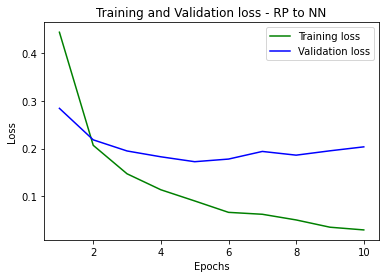

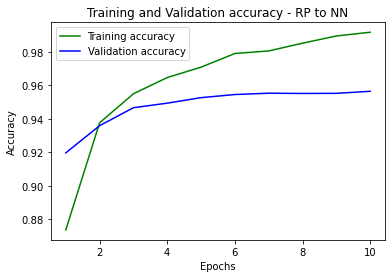

In [619]:
if __name__ == '__main__':
    main()

### LDA ==> Nueral Network

In [620]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'LDA to NN')


    print("LDA==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [623]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = X_train_lda
transform_target = np.array(y_train).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/700]	Batch Time 0.071 	Batch Loss 2.3258	Train Accuracy 0.1406	
Epoch: [0][100/700]	Batch Time 0.003 	Batch Loss 0.3810	Train Accuracy 0.8750	
Epoch: [0][200/700]	Batch Time 0.003 	Batch Loss 0.2453	Train Accuracy 0.9375	
Epoch: [0][300/700]	Batch Time 0.003 	Batch Loss 0.2320	Train Accuracy 0.9375	
Epoch: [0][400/700]	Batch Time 0.003 	Batch Loss 0.2397	Train Accuracy 0.8750	
Epoch: [0][500/700]	Batch Time 0.002 	Batch Loss 0.2827	Train Accuracy 0.9062	
Epoch: [0][600/700]	Batch Time 0.004 	Batch Loss 0.2012	Train Accuracy 0.9531	
* Average Accuracy of Epoch 0 is: 0.8864
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9062	
Evaluate: [2/175]	Batch Accuracy 0.9062	
Evaluate: [3/175]	Batch Accuracy 0.8594	
Evaluate: [4/175]	Batch Accuracy 0.9688	
Evaluate: [5/175]	Batch Accuracy 0.9375	
Evaluate: [6/175]	Batch Accuracy 0.9062	
Evaluate: [7/175]	Batch Accuracy 0.8594	
Evaluate: [8/175]	Batch Accuracy 0.9375	
Evaluate: [9/175]	Batch Accuracy 0.9219

Epoch: [1][200/700]	Batch Time 0.004 	Batch Loss 0.2369	Train Accuracy 0.9219	
Epoch: [1][300/700]	Batch Time 0.003 	Batch Loss 0.2904	Train Accuracy 0.9219	
Epoch: [1][400/700]	Batch Time 0.005 	Batch Loss 0.2861	Train Accuracy 0.8594	
Epoch: [1][500/700]	Batch Time 0.003 	Batch Loss 0.1726	Train Accuracy 0.9531	
Epoch: [1][600/700]	Batch Time 0.003 	Batch Loss 0.2775	Train Accuracy 0.9062	
* Average Accuracy of Epoch 1 is: 0.9065
Evaluate: [0/175]	Batch Accuracy 0.8906	
Evaluate: [1/175]	Batch Accuracy 0.9531	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.9219	
Evaluate: [4/175]	Batch Accuracy 0.9062	
Evaluate: [5/175]	Batch Accuracy 0.9062	
Evaluate: [6/175]	Batch Accuracy 0.8750	
Evaluate: [7/175]	Batch Accuracy 0.9062	
Evaluate: [8/175]	Batch Accuracy 0.8906	
Evaluate: [9/175]	Batch Accuracy 0.9062	
Evaluate: [10/175]	Batch Accuracy 0.9062	
Evaluate: [11/175]	Batch Accuracy 0.9375	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Acc

Epoch: [2][400/700]	Batch Time 0.003 	Batch Loss 0.4564	Train Accuracy 0.8750	
Epoch: [2][500/700]	Batch Time 0.003 	Batch Loss 0.1805	Train Accuracy 0.9219	
Epoch: [2][600/700]	Batch Time 0.004 	Batch Loss 0.1665	Train Accuracy 0.9688	
* Average Accuracy of Epoch 2 is: 0.9117
Evaluate: [0/175]	Batch Accuracy 0.9375	
Evaluate: [1/175]	Batch Accuracy 0.9688	
Evaluate: [2/175]	Batch Accuracy 0.8906	
Evaluate: [3/175]	Batch Accuracy 0.9062	
Evaluate: [4/175]	Batch Accuracy 0.9062	
Evaluate: [5/175]	Batch Accuracy 0.9219	
Evaluate: [6/175]	Batch Accuracy 0.9219	
Evaluate: [7/175]	Batch Accuracy 0.9375	
Evaluate: [8/175]	Batch Accuracy 0.8906	
Evaluate: [9/175]	Batch Accuracy 0.9219	
Evaluate: [10/175]	Batch Accuracy 0.8906	
Evaluate: [11/175]	Batch Accuracy 0.9219	
Evaluate: [12/175]	Batch Accuracy 0.8906	
Evaluate: [13/175]	Batch Accuracy 0.9219	
Evaluate: [14/175]	Batch Accuracy 0.8750	
Evaluate: [15/175]	Batch Accuracy 0.9375	
Evaluate: [16/175]	Batch Accuracy 0.9375	
Evaluate: [17/175]

Epoch: [3][600/700]	Batch Time 0.004 	Batch Loss 0.2057	Train Accuracy 0.9688	
* Average Accuracy of Epoch 3 is: 0.9151
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9062	
Evaluate: [2/175]	Batch Accuracy 0.9688	
Evaluate: [3/175]	Batch Accuracy 0.9688	
Evaluate: [4/175]	Batch Accuracy 0.8906	
Evaluate: [5/175]	Batch Accuracy 0.9062	
Evaluate: [6/175]	Batch Accuracy 0.9844	
Evaluate: [7/175]	Batch Accuracy 0.9531	
Evaluate: [8/175]	Batch Accuracy 0.9375	
Evaluate: [9/175]	Batch Accuracy 0.9219	
Evaluate: [10/175]	Batch Accuracy 0.9062	
Evaluate: [11/175]	Batch Accuracy 0.9688	
Evaluate: [12/175]	Batch Accuracy 0.9062	
Evaluate: [13/175]	Batch Accuracy 0.9219	
Evaluate: [14/175]	Batch Accuracy 0.9219	
Evaluate: [15/175]	Batch Accuracy 1.0000	
Evaluate: [16/175]	Batch Accuracy 0.9062	
Evaluate: [17/175]	Batch Accuracy 0.9062	
Evaluate: [18/175]	Batch Accuracy 0.9375	
Evaluate: [19/175]	Batch Accuracy 0.9219	
Evaluate: [20/175]	Batch Accuracy 0.8906	
Evaluate

Evaluate: [141/175]	Batch Accuracy 0.9375	
Evaluate: [142/175]	Batch Accuracy 0.9531	
Evaluate: [143/175]	Batch Accuracy 0.9375	
Evaluate: [144/175]	Batch Accuracy 0.9219	
Evaluate: [145/175]	Batch Accuracy 0.9844	
Evaluate: [146/175]	Batch Accuracy 0.8906	
Evaluate: [147/175]	Batch Accuracy 0.9219	
Evaluate: [148/175]	Batch Accuracy 0.9062	
Evaluate: [149/175]	Batch Accuracy 0.9531	
Evaluate: [150/175]	Batch Accuracy 0.8438	
Evaluate: [151/175]	Batch Accuracy 0.9375	
Evaluate: [152/175]	Batch Accuracy 0.9688	
Evaluate: [153/175]	Batch Accuracy 0.8438	
Evaluate: [154/175]	Batch Accuracy 0.9219	
Evaluate: [155/175]	Batch Accuracy 0.8906	
Evaluate: [156/175]	Batch Accuracy 0.9062	
Evaluate: [157/175]	Batch Accuracy 0.9062	
Evaluate: [158/175]	Batch Accuracy 0.9688	
Evaluate: [159/175]	Batch Accuracy 0.9531	
Evaluate: [160/175]	Batch Accuracy 0.8906	
Evaluate: [161/175]	Batch Accuracy 0.8906	
Evaluate: [162/175]	Batch Accuracy 0.9375	
Evaluate: [163/175]	Batch Accuracy 0.9375	
Evaluate: [

Evaluate: [147/175]	Batch Accuracy 0.9531	
Evaluate: [148/175]	Batch Accuracy 0.9531	
Evaluate: [149/175]	Batch Accuracy 0.8906	
Evaluate: [150/175]	Batch Accuracy 0.9219	
Evaluate: [151/175]	Batch Accuracy 0.9062	
Evaluate: [152/175]	Batch Accuracy 0.9062	
Evaluate: [153/175]	Batch Accuracy 0.9062	
Evaluate: [154/175]	Batch Accuracy 0.9688	
Evaluate: [155/175]	Batch Accuracy 0.9531	
Evaluate: [156/175]	Batch Accuracy 0.9531	
Evaluate: [157/175]	Batch Accuracy 0.9375	
Evaluate: [158/175]	Batch Accuracy 0.9062	
Evaluate: [159/175]	Batch Accuracy 0.8906	
Evaluate: [160/175]	Batch Accuracy 0.9375	
Evaluate: [161/175]	Batch Accuracy 0.9062	
Evaluate: [162/175]	Batch Accuracy 0.9375	
Evaluate: [163/175]	Batch Accuracy 0.8906	
Evaluate: [164/175]	Batch Accuracy 0.9219	
Evaluate: [165/175]	Batch Accuracy 0.8594	
Evaluate: [166/175]	Batch Accuracy 0.9375	
Evaluate: [167/175]	Batch Accuracy 0.9219	
Evaluate: [168/175]	Batch Accuracy 0.9219	
Evaluate: [169/175]	Batch Accuracy 0.8750	
Evaluate: [

Epoch: [7][100/700]	Batch Time 0.003 	Batch Loss 0.3482	Train Accuracy 0.9062	
Epoch: [7][200/700]	Batch Time 0.003 	Batch Loss 0.2506	Train Accuracy 0.9375	
Epoch: [7][300/700]	Batch Time 0.003 	Batch Loss 0.1678	Train Accuracy 0.9375	
Epoch: [7][400/700]	Batch Time 0.004 	Batch Loss 0.1741	Train Accuracy 0.9375	
Epoch: [7][500/700]	Batch Time 0.003 	Batch Loss 0.1881	Train Accuracy 0.9219	
Epoch: [7][600/700]	Batch Time 0.004 	Batch Loss 0.1479	Train Accuracy 0.9688	
* Average Accuracy of Epoch 7 is: 0.9217
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9375	
Evaluate: [2/175]	Batch Accuracy 0.9375	
Evaluate: [3/175]	Batch Accuracy 0.9844	
Evaluate: [4/175]	Batch Accuracy 0.9219	
Evaluate: [5/175]	Batch Accuracy 0.9219	
Evaluate: [6/175]	Batch Accuracy 0.9375	
Evaluate: [7/175]	Batch Accuracy 0.9375	
Evaluate: [8/175]	Batch Accuracy 0.9375	
Evaluate: [9/175]	Batch Accuracy 0.9219	
Evaluate: [10/175]	Batch Accuracy 0.9375	
Evaluate: [11/175]	Batch Accuracy

Epoch: [8][300/700]	Batch Time 0.003 	Batch Loss 0.1064	Train Accuracy 0.9531	
Epoch: [8][400/700]	Batch Time 0.005 	Batch Loss 0.1184	Train Accuracy 0.9531	
Epoch: [8][500/700]	Batch Time 0.004 	Batch Loss 0.2141	Train Accuracy 0.9375	
Epoch: [8][600/700]	Batch Time 0.003 	Batch Loss 0.3363	Train Accuracy 0.9062	
* Average Accuracy of Epoch 8 is: 0.9235
Evaluate: [0/175]	Batch Accuracy 0.9531	
Evaluate: [1/175]	Batch Accuracy 0.9531	
Evaluate: [2/175]	Batch Accuracy 0.9531	
Evaluate: [3/175]	Batch Accuracy 0.8750	
Evaluate: [4/175]	Batch Accuracy 0.8750	
Evaluate: [5/175]	Batch Accuracy 0.9375	
Evaluate: [6/175]	Batch Accuracy 0.8594	
Evaluate: [7/175]	Batch Accuracy 0.9062	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.9531	
Evaluate: [10/175]	Batch Accuracy 0.9062	
Evaluate: [11/175]	Batch Accuracy 0.9219	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.9062	
Evaluate: [14/175]	Batch Accuracy 0.9219	
Evaluate: [15/175]	Batc

Epoch: [9][500/700]	Batch Time 0.002 	Batch Loss 0.3698	Train Accuracy 0.9219	
Epoch: [9][600/700]	Batch Time 0.003 	Batch Loss 0.2921	Train Accuracy 0.9219	
* Average Accuracy of Epoch 9 is: 0.9243
Evaluate: [0/175]	Batch Accuracy 0.8906	
Evaluate: [1/175]	Batch Accuracy 0.9531	
Evaluate: [2/175]	Batch Accuracy 0.9062	
Evaluate: [3/175]	Batch Accuracy 0.9531	
Evaluate: [4/175]	Batch Accuracy 0.9531	
Evaluate: [5/175]	Batch Accuracy 0.9688	
Evaluate: [6/175]	Batch Accuracy 0.9219	
Evaluate: [7/175]	Batch Accuracy 0.8594	
Evaluate: [8/175]	Batch Accuracy 0.9375	
Evaluate: [9/175]	Batch Accuracy 0.9688	
Evaluate: [10/175]	Batch Accuracy 0.9062	
Evaluate: [11/175]	Batch Accuracy 0.9219	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.9219	
Evaluate: [14/175]	Batch Accuracy 0.9688	
Evaluate: [15/175]	Batch Accuracy 0.9219	
Evaluate: [16/175]	Batch Accuracy 0.9531	
Evaluate: [17/175]	Batch Accuracy 0.8594	
Evaluate: [18/175]	Batch Accuracy 0.8594	
Evaluate: [19

Evaluate: [96/175]	Batch Accuracy 0.9062	
Evaluate: [97/175]	Batch Accuracy 0.9062	
Evaluate: [98/175]	Batch Accuracy 0.9219	
Evaluate: [99/175]	Batch Accuracy 0.9844	
Evaluate: [100/175]	Batch Accuracy 0.9531	
Evaluate: [101/175]	Batch Accuracy 0.9219	
Evaluate: [102/175]	Batch Accuracy 0.9219	
Evaluate: [103/175]	Batch Accuracy 0.9375	
Evaluate: [104/175]	Batch Accuracy 0.9375	
Evaluate: [105/175]	Batch Accuracy 0.9062	
Evaluate: [106/175]	Batch Accuracy 0.9219	
Evaluate: [107/175]	Batch Accuracy 0.9219	
Evaluate: [108/175]	Batch Accuracy 0.9219	
Evaluate: [109/175]	Batch Accuracy 0.9844	
Evaluate: [110/175]	Batch Accuracy 0.9062	
Evaluate: [111/175]	Batch Accuracy 0.8438	
Evaluate: [112/175]	Batch Accuracy 0.9062	
Evaluate: [113/175]	Batch Accuracy 0.9375	
Evaluate: [114/175]	Batch Accuracy 0.9375	
Evaluate: [115/175]	Batch Accuracy 0.8906	
Evaluate: [116/175]	Batch Accuracy 0.9688	
Evaluate: [117/175]	Batch Accuracy 0.8906	
Evaluate: [118/175]	Batch Accuracy 0.9219	
Evaluate: [119/

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


LDA==>NN test accuracy: tensor(0.9248) running time: 34.18696975708008


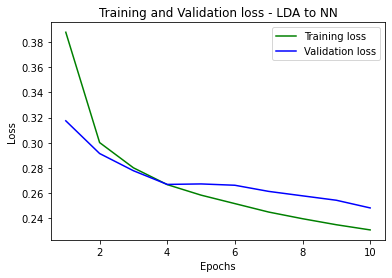

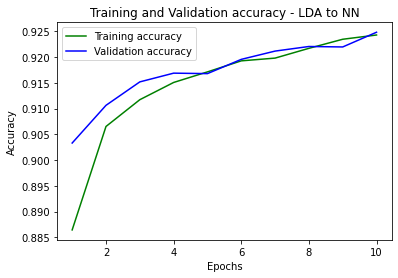

In [624]:
if __name__ == '__main__':
    main()

# 5. Apply Clustering to Neural Network

### PCA + Kmean(X) ==> Neural Network

In [665]:
X_pca.shape

(70000, 10)

In [666]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'PCA + Kmean features to NN')


    print("PCA + Kmean ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [667]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_pca), labels.reshape(len(labels),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.007 	Batch Loss 2.5136	Train Accuracy 0.0938	
Epoch: [0][100/875]	Batch Time 0.003 	Batch Loss 0.4188	Train Accuracy 0.8750	
Epoch: [0][200/875]	Batch Time 0.003 	Batch Loss 0.3000	Train Accuracy 0.8906	
Epoch: [0][300/875]	Batch Time 0.003 	Batch Loss 0.4469	Train Accuracy 0.8438	
Epoch: [0][400/875]	Batch Time 0.003 	Batch Loss 0.3799	Train Accuracy 0.8594	
Epoch: [0][500/875]	Batch Time 0.003 	Batch Loss 0.4193	Train Accuracy 0.8281	
Epoch: [0][600/875]	Batch Time 0.003 	Batch Loss 0.3172	Train Accuracy 0.8750	
Epoch: [0][700/875]	Batch Time 0.003 	Batch Loss 0.2568	Train Accuracy 0.8906	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.2750	Train Accuracy 0.9062	
* Average Accuracy of Epoch 0 is: 0.8698
Evaluate: [0/219]	Batch Accuracy 0.8438	
Evaluate: [1/219]	Batch Accuracy 0.8906	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.8906	
Eval

Evaluate: [199/219]	Batch Accuracy 0.8125	
Evaluate: [200/219]	Batch Accuracy 0.9062	
Evaluate: [201/219]	Batch Accuracy 0.9531	
Evaluate: [202/219]	Batch Accuracy 0.8906	
Evaluate: [203/219]	Batch Accuracy 0.8906	
Evaluate: [204/219]	Batch Accuracy 0.9688	
Evaluate: [205/219]	Batch Accuracy 0.9062	
Evaluate: [206/219]	Batch Accuracy 0.8750	
Evaluate: [207/219]	Batch Accuracy 0.8906	
Evaluate: [208/219]	Batch Accuracy 0.9531	
Evaluate: [209/219]	Batch Accuracy 0.9062	
Evaluate: [210/219]	Batch Accuracy 0.9219	
Evaluate: [211/219]	Batch Accuracy 0.8906	
Evaluate: [212/219]	Batch Accuracy 0.8750	
Evaluate: [213/219]	Batch Accuracy 0.9375	
Evaluate: [214/219]	Batch Accuracy 0.8906	
Evaluate: [215/219]	Batch Accuracy 0.9062	
Evaluate: [216/219]	Batch Accuracy 0.9531	
Evaluate: [217/219]	Batch Accuracy 0.7969	
Evaluate: [218/219]	Batch Accuracy 0.8958	
* Validation Accuracy: 0.8965
Epoch: [1][0/875]	Batch Time 0.004 	Batch Loss 0.3880	Train Accuracy 0.8750	
Epoch: [1][100/875]	Batch Time 0.

Evaluate: [217/219]	Batch Accuracy 0.8438	
Evaluate: [218/219]	Batch Accuracy 0.8958	
* Validation Accuracy: 0.9069
Epoch: [2][0/875]	Batch Time 0.005 	Batch Loss 0.2421	Train Accuracy 0.8906	
Epoch: [2][100/875]	Batch Time 0.003 	Batch Loss 0.3429	Train Accuracy 0.8281	
Epoch: [2][200/875]	Batch Time 0.003 	Batch Loss 0.2356	Train Accuracy 0.8906	
Epoch: [2][300/875]	Batch Time 0.004 	Batch Loss 0.1560	Train Accuracy 0.9375	
Epoch: [2][400/875]	Batch Time 0.004 	Batch Loss 0.3998	Train Accuracy 0.9062	
Epoch: [2][500/875]	Batch Time 0.003 	Batch Loss 0.2253	Train Accuracy 0.9062	
Epoch: [2][600/875]	Batch Time 0.004 	Batch Loss 0.1582	Train Accuracy 0.9688	
Epoch: [2][700/875]	Batch Time 0.002 	Batch Loss 0.3887	Train Accuracy 0.8906	
Epoch: [2][800/875]	Batch Time 0.002 	Batch Loss 0.2760	Train Accuracy 0.8906	
* Average Accuracy of Epoch 2 is: 0.9147
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.8594	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [

Evaluate: [216/219]	Batch Accuracy 0.8750	
Evaluate: [217/219]	Batch Accuracy 0.8594	
Evaluate: [218/219]	Batch Accuracy 0.9167	
* Validation Accuracy: 0.9110
Epoch: [3][0/875]	Batch Time 0.004 	Batch Loss 0.2527	Train Accuracy 0.9375	
Epoch: [3][100/875]	Batch Time 0.003 	Batch Loss 0.1532	Train Accuracy 0.9219	
Epoch: [3][200/875]	Batch Time 0.004 	Batch Loss 0.0964	Train Accuracy 0.9688	
Epoch: [3][300/875]	Batch Time 0.004 	Batch Loss 0.1462	Train Accuracy 0.9375	
Epoch: [3][400/875]	Batch Time 0.003 	Batch Loss 0.1500	Train Accuracy 0.9531	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 0.1120	Train Accuracy 0.9531	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 0.2462	Train Accuracy 0.8906	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 0.1965	Train Accuracy 0.9219	
Epoch: [3][800/875]	Batch Time 0.003 	Batch Loss 0.1845	Train Accuracy 0.9375	
* Average Accuracy of Epoch 3 is: 0.9208
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate:

Epoch: [4][100/875]	Batch Time 0.003 	Batch Loss 0.2864	Train Accuracy 0.8750	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 0.3936	Train Accuracy 0.8594	
Epoch: [4][300/875]	Batch Time 0.004 	Batch Loss 0.1085	Train Accuracy 0.9531	
Epoch: [4][400/875]	Batch Time 0.004 	Batch Loss 0.2251	Train Accuracy 0.9062	
Epoch: [4][500/875]	Batch Time 0.003 	Batch Loss 0.2217	Train Accuracy 0.9375	
Epoch: [4][600/875]	Batch Time 0.003 	Batch Loss 0.1547	Train Accuracy 0.9375	
Epoch: [4][700/875]	Batch Time 0.004 	Batch Loss 0.2476	Train Accuracy 0.9375	
Epoch: [4][800/875]	Batch Time 0.008 	Batch Loss 0.2644	Train Accuracy 0.9219	
* Average Accuracy of Epoch 4 is: 0.9238
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.8281	
Evaluate: [6/219]	Batch Accuracy 0.8750	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [5][100/875]	Batch Time 0.005 	Batch Loss 0.3654	Train Accuracy 0.8906	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 0.2651	Train Accuracy 0.8906	
Epoch: [5][300/875]	Batch Time 0.004 	Batch Loss 0.2883	Train Accuracy 0.9062	
Epoch: [5][400/875]	Batch Time 0.004 	Batch Loss 0.2210	Train Accuracy 0.9062	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 0.1815	Train Accuracy 0.9531	
Epoch: [5][600/875]	Batch Time 0.003 	Batch Loss 0.1713	Train Accuracy 0.9375	
Epoch: [5][700/875]	Batch Time 0.004 	Batch Loss 0.1181	Train Accuracy 0.9375	
Epoch: [5][800/875]	Batch Time 0.004 	Batch Loss 0.1042	Train Accuracy 0.9688	
* Average Accuracy of Epoch 5 is: 0.9289
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.9688	
Evaluate: [5/219]	Batch Accuracy 0.8906	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.8594	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 0.2233	Train Accuracy 0.9375	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 0.2730	Train Accuracy 0.8750	
Epoch: [6][300/875]	Batch Time 0.003 	Batch Loss 0.1828	Train Accuracy 0.9375	
Epoch: [6][400/875]	Batch Time 0.003 	Batch Loss 0.2778	Train Accuracy 0.9062	
Epoch: [6][500/875]	Batch Time 0.003 	Batch Loss 0.1985	Train Accuracy 0.9375	
Epoch: [6][600/875]	Batch Time 0.003 	Batch Loss 0.1715	Train Accuracy 0.9062	
Epoch: [6][700/875]	Batch Time 0.003 	Batch Loss 0.0589	Train Accuracy 0.9844	
Epoch: [6][800/875]	Batch Time 0.006 	Batch Loss 0.2971	Train Accuracy 0.9375	
* Average Accuracy of Epoch 6 is: 0.9312
Evaluate: [0/219]	Batch Accuracy 0.9531	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.8750	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.8906	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [7][100/875]	Batch Time 0.003 	Batch Loss 0.1701	Train Accuracy 0.9219	
Epoch: [7][200/875]	Batch Time 0.005 	Batch Loss 0.0923	Train Accuracy 0.9688	
Epoch: [7][300/875]	Batch Time 0.003 	Batch Loss 0.1681	Train Accuracy 0.9531	
Epoch: [7][400/875]	Batch Time 0.004 	Batch Loss 0.1222	Train Accuracy 0.9844	
Epoch: [7][500/875]	Batch Time 0.004 	Batch Loss 0.1881	Train Accuracy 0.9062	
Epoch: [7][600/875]	Batch Time 0.003 	Batch Loss 0.1929	Train Accuracy 0.9062	
Epoch: [7][700/875]	Batch Time 0.004 	Batch Loss 0.1732	Train Accuracy 0.9375	
Epoch: [7][800/875]	Batch Time 0.004 	Batch Loss 0.1659	Train Accuracy 0.9531	
* Average Accuracy of Epoch 7 is: 0.9325
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.8906	
Evaluate: [2/219]	Batch Accuracy 1.0000	
Evaluate: [3/219]	Batch Accuracy 0.8594	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9844	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [8][100/875]	Batch Time 0.003 	Batch Loss 0.1958	Train Accuracy 0.9844	
Epoch: [8][200/875]	Batch Time 0.003 	Batch Loss 0.1306	Train Accuracy 0.9531	
Epoch: [8][300/875]	Batch Time 0.003 	Batch Loss 0.3079	Train Accuracy 0.9062	
Epoch: [8][400/875]	Batch Time 0.003 	Batch Loss 0.1619	Train Accuracy 0.9531	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 0.2425	Train Accuracy 0.9375	
Epoch: [8][600/875]	Batch Time 0.003 	Batch Loss 0.1032	Train Accuracy 0.9531	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 0.1167	Train Accuracy 0.9844	
Epoch: [8][800/875]	Batch Time 0.004 	Batch Loss 0.2801	Train Accuracy 0.9531	
* Average Accuracy of Epoch 8 is: 0.9355
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.8906	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [9][100/875]	Batch Time 0.004 	Batch Loss 0.0500	Train Accuracy 1.0000	
Epoch: [9][200/875]	Batch Time 0.004 	Batch Loss 0.2412	Train Accuracy 0.8906	
Epoch: [9][300/875]	Batch Time 0.003 	Batch Loss 0.1959	Train Accuracy 0.9531	
Epoch: [9][400/875]	Batch Time 0.003 	Batch Loss 0.0393	Train Accuracy 1.0000	
Epoch: [9][500/875]	Batch Time 0.003 	Batch Loss 0.2539	Train Accuracy 0.9375	
Epoch: [9][600/875]	Batch Time 0.004 	Batch Loss 0.2037	Train Accuracy 0.9219	
Epoch: [9][700/875]	Batch Time 0.003 	Batch Loss 0.2690	Train Accuracy 0.9531	
Epoch: [9][800/875]	Batch Time 0.003 	Batch Loss 0.2676	Train Accuracy 0.9062	
* Average Accuracy of Epoch 9 is: 0.9362
Evaluate: [0/219]	Batch Accuracy 0.9531	
Evaluate: [1/219]	Batch Accuracy 0.8438	
Evaluate: [2/219]	Batch Accuracy 0.8906	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9375	
Evaluate: [7/219]	Batch Accuracy 0.8906	

Evaluate: [71/219]	Batch Accuracy 0.9375	
Evaluate: [72/219]	Batch Accuracy 0.8438	
Evaluate: [73/219]	Batch Accuracy 0.8750	
Evaluate: [74/219]	Batch Accuracy 0.9375	
Evaluate: [75/219]	Batch Accuracy 0.9219	
Evaluate: [76/219]	Batch Accuracy 0.9062	
Evaluate: [77/219]	Batch Accuracy 0.9375	
Evaluate: [78/219]	Batch Accuracy 0.9219	
Evaluate: [79/219]	Batch Accuracy 0.9531	
Evaluate: [80/219]	Batch Accuracy 0.9219	
Evaluate: [81/219]	Batch Accuracy 0.9844	
Evaluate: [82/219]	Batch Accuracy 0.9531	
Evaluate: [83/219]	Batch Accuracy 0.9375	
Evaluate: [84/219]	Batch Accuracy 0.9062	
Evaluate: [85/219]	Batch Accuracy 0.9375	
Evaluate: [86/219]	Batch Accuracy 0.9062	
Evaluate: [87/219]	Batch Accuracy 0.8906	
Evaluate: [88/219]	Batch Accuracy 0.9219	
Evaluate: [89/219]	Batch Accuracy 0.9531	
Evaluate: [90/219]	Batch Accuracy 0.9531	
Evaluate: [91/219]	Batch Accuracy 0.9062	
Evaluate: [92/219]	Batch Accuracy 0.9531	
Evaluate: [93/219]	Batch Accuracy 0.9062	
Evaluate: [94/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


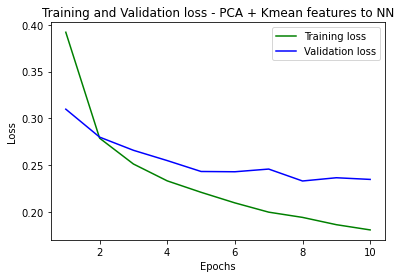

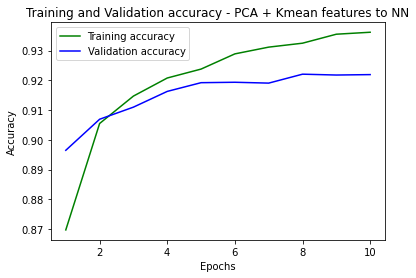

In [668]:
if __name__ == '__main__':
    main()

### PCA + EM(X) ==> Neural Network

In [670]:
predicted_labels.shape

(70000,)

In [671]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'PCA + EM features to NN')


    print("PCA + EM ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [672]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_pca), predicted_labels.reshape(len(predicted_labels),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.053 	Batch Loss 2.3527	Train Accuracy 0.0781	
Epoch: [0][100/875]	Batch Time 0.004 	Batch Loss 0.3576	Train Accuracy 0.9062	
Epoch: [0][200/875]	Batch Time 0.003 	Batch Loss 0.4771	Train Accuracy 0.8594	
Epoch: [0][300/875]	Batch Time 0.004 	Batch Loss 0.4416	Train Accuracy 0.8750	
Epoch: [0][400/875]	Batch Time 0.004 	Batch Loss 0.2131	Train Accuracy 0.9375	
Epoch: [0][500/875]	Batch Time 0.003 	Batch Loss 0.2426	Train Accuracy 0.9219	
Epoch: [0][600/875]	Batch Time 0.003 	Batch Loss 0.3215	Train Accuracy 0.9219	
Epoch: [0][700/875]	Batch Time 0.003 	Batch Loss 0.3243	Train Accuracy 0.8906	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.4623	Train Accuracy 0.8750	
* Average Accuracy of Epoch 0 is: 0.8693
Evaluate: [0/219]	Batch Accuracy 0.8594	
Evaluate: [1/219]	Batch Accuracy 0.8281	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.8438	
Eval

Epoch: [1][100/875]	Batch Time 0.003 	Batch Loss 0.1851	Train Accuracy 0.9219	
Epoch: [1][200/875]	Batch Time 0.004 	Batch Loss 0.4303	Train Accuracy 0.8906	
Epoch: [1][300/875]	Batch Time 0.003 	Batch Loss 0.2403	Train Accuracy 0.8906	
Epoch: [1][400/875]	Batch Time 0.003 	Batch Loss 0.2984	Train Accuracy 0.9062	
Epoch: [1][500/875]	Batch Time 0.070 	Batch Loss 0.2718	Train Accuracy 0.9062	
Epoch: [1][600/875]	Batch Time 0.003 	Batch Loss 0.2515	Train Accuracy 0.8906	
Epoch: [1][700/875]	Batch Time 0.004 	Batch Loss 0.2211	Train Accuracy 0.9219	
Epoch: [1][800/875]	Batch Time 0.003 	Batch Loss 0.2587	Train Accuracy 0.9062	
* Average Accuracy of Epoch 1 is: 0.9051
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.8906	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9062	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [2][100/875]	Batch Time 0.003 	Batch Loss 0.3885	Train Accuracy 0.8438	
Epoch: [2][200/875]	Batch Time 0.003 	Batch Loss 0.0979	Train Accuracy 0.9531	
Epoch: [2][300/875]	Batch Time 0.005 	Batch Loss 0.2194	Train Accuracy 0.9375	
Epoch: [2][400/875]	Batch Time 0.003 	Batch Loss 0.1784	Train Accuracy 0.9375	
Epoch: [2][500/875]	Batch Time 0.003 	Batch Loss 0.3138	Train Accuracy 0.9062	
Epoch: [2][600/875]	Batch Time 0.003 	Batch Loss 0.2749	Train Accuracy 0.9062	
Epoch: [2][700/875]	Batch Time 0.003 	Batch Loss 0.1635	Train Accuracy 0.9531	
Epoch: [2][800/875]	Batch Time 0.003 	Batch Loss 0.1779	Train Accuracy 0.9375	
* Average Accuracy of Epoch 2 is: 0.9145
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.8750	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.9062	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9062	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [3][100/875]	Batch Time 0.003 	Batch Loss 0.1102	Train Accuracy 0.9688	
Epoch: [3][200/875]	Batch Time 0.003 	Batch Loss 0.1017	Train Accuracy 0.9688	
Epoch: [3][300/875]	Batch Time 0.004 	Batch Loss 0.2874	Train Accuracy 0.9219	
Epoch: [3][400/875]	Batch Time 0.003 	Batch Loss 0.3185	Train Accuracy 0.8906	
Epoch: [3][500/875]	Batch Time 0.003 	Batch Loss 0.1108	Train Accuracy 0.9375	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 0.1474	Train Accuracy 0.9219	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 0.2753	Train Accuracy 0.9219	
Epoch: [3][800/875]	Batch Time 0.003 	Batch Loss 0.1251	Train Accuracy 0.9531	
* Average Accuracy of Epoch 3 is: 0.9194
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.8906	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [4][100/875]	Batch Time 0.003 	Batch Loss 0.0829	Train Accuracy 0.9844	
Epoch: [4][200/875]	Batch Time 0.003 	Batch Loss 0.2617	Train Accuracy 0.9219	
Epoch: [4][300/875]	Batch Time 0.003 	Batch Loss 0.1713	Train Accuracy 0.9531	
Epoch: [4][400/875]	Batch Time 0.004 	Batch Loss 0.1202	Train Accuracy 0.9688	
Epoch: [4][500/875]	Batch Time 0.003 	Batch Loss 0.1791	Train Accuracy 0.9219	
Epoch: [4][600/875]	Batch Time 0.003 	Batch Loss 0.3191	Train Accuracy 0.8906	
Epoch: [4][700/875]	Batch Time 0.003 	Batch Loss 0.2600	Train Accuracy 0.9219	
Epoch: [4][800/875]	Batch Time 0.004 	Batch Loss 0.1599	Train Accuracy 0.9531	
* Average Accuracy of Epoch 4 is: 0.9239
Evaluate: [0/219]	Batch Accuracy 0.8906	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.8594	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [5][100/875]	Batch Time 0.003 	Batch Loss 0.1592	Train Accuracy 0.9375	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 0.1891	Train Accuracy 0.9375	
Epoch: [5][300/875]	Batch Time 0.003 	Batch Loss 0.1453	Train Accuracy 0.9219	
Epoch: [5][400/875]	Batch Time 0.003 	Batch Loss 0.2879	Train Accuracy 0.9219	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 0.1599	Train Accuracy 0.9375	
Epoch: [5][600/875]	Batch Time 0.003 	Batch Loss 0.2482	Train Accuracy 0.8594	
Epoch: [5][700/875]	Batch Time 0.003 	Batch Loss 0.2023	Train Accuracy 0.9531	
Epoch: [5][800/875]	Batch Time 0.003 	Batch Loss 0.3315	Train Accuracy 0.8906	
* Average Accuracy of Epoch 5 is: 0.9292
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.8906	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9062	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 0.1913	Train Accuracy 0.9531	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 0.1870	Train Accuracy 0.9531	
Epoch: [6][300/875]	Batch Time 0.003 	Batch Loss 0.2831	Train Accuracy 0.8594	
Epoch: [6][400/875]	Batch Time 0.003 	Batch Loss 0.1410	Train Accuracy 0.9375	
Epoch: [6][500/875]	Batch Time 0.003 	Batch Loss 0.3642	Train Accuracy 0.8438	
Epoch: [6][600/875]	Batch Time 0.002 	Batch Loss 0.1540	Train Accuracy 0.9219	
Epoch: [6][700/875]	Batch Time 0.003 	Batch Loss 0.2137	Train Accuracy 0.9219	
Epoch: [6][800/875]	Batch Time 0.004 	Batch Loss 0.1745	Train Accuracy 0.9531	
* Average Accuracy of Epoch 6 is: 0.9307
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.8750	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [7][100/875]	Batch Time 0.003 	Batch Loss 0.2959	Train Accuracy 0.8906	
Epoch: [7][200/875]	Batch Time 0.003 	Batch Loss 0.1368	Train Accuracy 0.9688	
Epoch: [7][300/875]	Batch Time 0.003 	Batch Loss 0.2105	Train Accuracy 0.9062	
Epoch: [7][400/875]	Batch Time 0.003 	Batch Loss 0.0764	Train Accuracy 0.9844	
Epoch: [7][500/875]	Batch Time 0.003 	Batch Loss 0.1342	Train Accuracy 0.9375	
Epoch: [7][600/875]	Batch Time 0.004 	Batch Loss 0.1561	Train Accuracy 0.9219	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 0.2458	Train Accuracy 0.9375	
Epoch: [7][800/875]	Batch Time 0.003 	Batch Loss 0.1231	Train Accuracy 0.9688	
* Average Accuracy of Epoch 7 is: 0.9354
Evaluate: [0/219]	Batch Accuracy 0.9219	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.9062	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.8750	

Epoch: [8][100/875]	Batch Time 0.003 	Batch Loss 0.1907	Train Accuracy 0.9375	
Epoch: [8][200/875]	Batch Time 0.004 	Batch Loss 0.2029	Train Accuracy 0.9375	
Epoch: [8][300/875]	Batch Time 0.002 	Batch Loss 0.1537	Train Accuracy 0.9219	
Epoch: [8][400/875]	Batch Time 0.003 	Batch Loss 0.1797	Train Accuracy 0.9062	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 0.0838	Train Accuracy 0.9688	
Epoch: [8][600/875]	Batch Time 0.002 	Batch Loss 0.1672	Train Accuracy 0.9531	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 0.1163	Train Accuracy 0.9688	
Epoch: [8][800/875]	Batch Time 0.003 	Batch Loss 0.2202	Train Accuracy 0.9219	
* Average Accuracy of Epoch 8 is: 0.9365
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.8594	
Evaluate: [6/219]	Batch Accuracy 0.9219	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [9][100/875]	Batch Time 0.003 	Batch Loss 0.2016	Train Accuracy 0.9062	
Epoch: [9][200/875]	Batch Time 0.003 	Batch Loss 0.1692	Train Accuracy 0.9219	
Epoch: [9][300/875]	Batch Time 0.003 	Batch Loss 0.2415	Train Accuracy 0.9375	
Epoch: [9][400/875]	Batch Time 0.005 	Batch Loss 0.1159	Train Accuracy 0.9531	
Epoch: [9][500/875]	Batch Time 0.003 	Batch Loss 0.0649	Train Accuracy 0.9844	
Epoch: [9][600/875]	Batch Time 0.004 	Batch Loss 0.2261	Train Accuracy 0.9219	
Epoch: [9][700/875]	Batch Time 0.003 	Batch Loss 0.1614	Train Accuracy 0.9531	
Epoch: [9][800/875]	Batch Time 0.003 	Batch Loss 0.2160	Train Accuracy 0.9219	
* Average Accuracy of Epoch 9 is: 0.9376
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.8594	
Evaluate: [3/219]	Batch Accuracy 0.8438	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.8750	
Evaluate: [6/219]	Batch Accuracy 0.8906	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Evaluate: [69/219]	Batch Accuracy 0.9219	
Evaluate: [70/219]	Batch Accuracy 0.9375	
Evaluate: [71/219]	Batch Accuracy 0.9375	
Evaluate: [72/219]	Batch Accuracy 0.9844	
Evaluate: [73/219]	Batch Accuracy 0.9219	
Evaluate: [74/219]	Batch Accuracy 0.9062	
Evaluate: [75/219]	Batch Accuracy 0.8750	
Evaluate: [76/219]	Batch Accuracy 0.9062	
Evaluate: [77/219]	Batch Accuracy 0.9219	
Evaluate: [78/219]	Batch Accuracy 0.9219	
Evaluate: [79/219]	Batch Accuracy 0.9531	
Evaluate: [80/219]	Batch Accuracy 0.8906	
Evaluate: [81/219]	Batch Accuracy 0.9531	
Evaluate: [82/219]	Batch Accuracy 0.9375	
Evaluate: [83/219]	Batch Accuracy 0.9219	
Evaluate: [84/219]	Batch Accuracy 0.9062	
Evaluate: [85/219]	Batch Accuracy 0.9375	
Evaluate: [86/219]	Batch Accuracy 0.9219	
Evaluate: [87/219]	Batch Accuracy 0.9219	
Evaluate: [88/219]	Batch Accuracy 0.9062	
Evaluate: [89/219]	Batch Accuracy 0.8281	
Evaluate: [90/219]	Batch Accuracy 0.9375	
Evaluate: [91/219]	Batch Accuracy 0.9062	
Evaluate: [92/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_86159/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


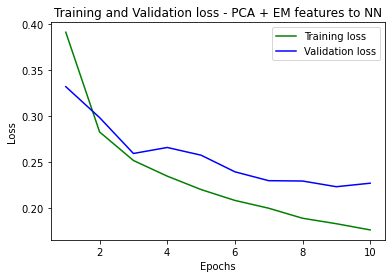

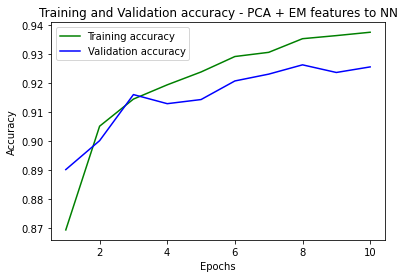

In [673]:
if __name__ == '__main__':
    main()

### ICA + Kmeans ==> Neural Network

In [262]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'ICA + Kmeans features to NN')


    print("ICA + Kmeans ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)
    

In [266]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_ica), labels_ica_kmean.reshape(len(labels_ica_kmean),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.044 	Batch Loss 2.3027	Train Accuracy 0.1875	
Epoch: [0][100/875]	Batch Time 0.003 	Batch Loss 2.1562	Train Accuracy 0.1719	
Epoch: [0][200/875]	Batch Time 0.003 	Batch Loss 2.0241	Train Accuracy 0.3594	
Epoch: [0][300/875]	Batch Time 0.002 	Batch Loss 1.8718	Train Accuracy 0.5000	
Epoch: [0][400/875]	Batch Time 0.003 	Batch Loss 1.9661	Train Accuracy 0.3281	
Epoch: [0][500/875]	Batch Time 0.004 	Batch Loss 1.9962	Train Accuracy 0.2500	
Epoch: [0][600/875]	Batch Time 0.002 	Batch Loss 1.7237	Train Accuracy 0.4219	
Epoch: [0][700/875]	Batch Time 0.002 	Batch Loss 1.7362	Train Accuracy 0.3281	
Epoch: [0][800/875]	Batch Time 0.002 	Batch Loss 1.7638	Train Accuracy 0.2969	
* Average Accuracy of Epoch 0 is: 0.2961
Evaluate: [0/219]	Batch Accuracy 0.3125	
Evaluate: [1/219]	Batch Accuracy 0.3125	
Evaluate: [2/219]	Batch Accuracy 0.2656	
Evaluate: [3/219]	Batch Accuracy 0.3594	
Evaluate: [4/219]	Batch Accuracy 0.2969	
Evaluate: [5/219]	Batch Accuracy 0.4219	
Eval

Epoch: [1][100/875]	Batch Time 0.003 	Batch Loss 1.5779	Train Accuracy 0.4219	
Epoch: [1][200/875]	Batch Time 0.003 	Batch Loss 1.6634	Train Accuracy 0.3438	
Epoch: [1][300/875]	Batch Time 0.004 	Batch Loss 1.7589	Train Accuracy 0.3281	
Epoch: [1][400/875]	Batch Time 0.004 	Batch Loss 1.7178	Train Accuracy 0.4531	
Epoch: [1][500/875]	Batch Time 0.003 	Batch Loss 1.8140	Train Accuracy 0.3281	
Epoch: [1][600/875]	Batch Time 0.004 	Batch Loss 1.8567	Train Accuracy 0.3750	
Epoch: [1][700/875]	Batch Time 0.007 	Batch Loss 1.6715	Train Accuracy 0.3438	
Epoch: [1][800/875]	Batch Time 0.004 	Batch Loss 1.7039	Train Accuracy 0.3906	
* Average Accuracy of Epoch 1 is: 0.3528
Evaluate: [0/219]	Batch Accuracy 0.3594	
Evaluate: [1/219]	Batch Accuracy 0.4531	
Evaluate: [2/219]	Batch Accuracy 0.3750	
Evaluate: [3/219]	Batch Accuracy 0.2969	
Evaluate: [4/219]	Batch Accuracy 0.4062	
Evaluate: [5/219]	Batch Accuracy 0.4531	
Evaluate: [6/219]	Batch Accuracy 0.3750	
Evaluate: [7/219]	Batch Accuracy 0.3906	

Epoch: [2][100/875]	Batch Time 0.004 	Batch Loss 1.7148	Train Accuracy 0.3750	
Epoch: [2][200/875]	Batch Time 0.004 	Batch Loss 1.8498	Train Accuracy 0.2656	
Epoch: [2][300/875]	Batch Time 0.004 	Batch Loss 1.5395	Train Accuracy 0.4844	
Epoch: [2][400/875]	Batch Time 0.004 	Batch Loss 1.6691	Train Accuracy 0.4531	
Epoch: [2][500/875]	Batch Time 0.005 	Batch Loss 1.5013	Train Accuracy 0.5625	
Epoch: [2][600/875]	Batch Time 0.002 	Batch Loss 2.0316	Train Accuracy 0.3594	
Epoch: [2][700/875]	Batch Time 0.004 	Batch Loss 1.6133	Train Accuracy 0.3125	
Epoch: [2][800/875]	Batch Time 0.004 	Batch Loss 1.4525	Train Accuracy 0.4844	
* Average Accuracy of Epoch 2 is: 0.3673
Evaluate: [0/219]	Batch Accuracy 0.3281	
Evaluate: [1/219]	Batch Accuracy 0.3906	
Evaluate: [2/219]	Batch Accuracy 0.4219	
Evaluate: [3/219]	Batch Accuracy 0.3750	
Evaluate: [4/219]	Batch Accuracy 0.3594	
Evaluate: [5/219]	Batch Accuracy 0.3594	
Evaluate: [6/219]	Batch Accuracy 0.2969	
Evaluate: [7/219]	Batch Accuracy 0.2656	

Epoch: [3][100/875]	Batch Time 0.004 	Batch Loss 1.8877	Train Accuracy 0.2500	
Epoch: [3][200/875]	Batch Time 0.003 	Batch Loss 1.7124	Train Accuracy 0.3750	
Epoch: [3][300/875]	Batch Time 0.003 	Batch Loss 1.6186	Train Accuracy 0.4531	
Epoch: [3][400/875]	Batch Time 0.003 	Batch Loss 1.4541	Train Accuracy 0.5156	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 1.8848	Train Accuracy 0.3750	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 1.6277	Train Accuracy 0.4375	
Epoch: [3][700/875]	Batch Time 0.005 	Batch Loss 1.7467	Train Accuracy 0.3594	
Epoch: [3][800/875]	Batch Time 0.003 	Batch Loss 1.8505	Train Accuracy 0.3906	
* Average Accuracy of Epoch 3 is: 0.3697
Evaluate: [0/219]	Batch Accuracy 0.4844	
Evaluate: [1/219]	Batch Accuracy 0.4062	
Evaluate: [2/219]	Batch Accuracy 0.3125	
Evaluate: [3/219]	Batch Accuracy 0.3906	
Evaluate: [4/219]	Batch Accuracy 0.3594	
Evaluate: [5/219]	Batch Accuracy 0.4375	
Evaluate: [6/219]	Batch Accuracy 0.3438	
Evaluate: [7/219]	Batch Accuracy 0.3750	

Epoch: [4][100/875]	Batch Time 0.004 	Batch Loss 1.7947	Train Accuracy 0.3125	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 1.8997	Train Accuracy 0.2500	
Epoch: [4][300/875]	Batch Time 0.003 	Batch Loss 1.5299	Train Accuracy 0.3594	
Epoch: [4][400/875]	Batch Time 0.003 	Batch Loss 1.6592	Train Accuracy 0.3906	
Epoch: [4][500/875]	Batch Time 0.004 	Batch Loss 1.6404	Train Accuracy 0.3594	
Epoch: [4][600/875]	Batch Time 0.003 	Batch Loss 1.5693	Train Accuracy 0.3281	
Epoch: [4][700/875]	Batch Time 0.004 	Batch Loss 1.5390	Train Accuracy 0.4219	
Epoch: [4][800/875]	Batch Time 0.004 	Batch Loss 1.7714	Train Accuracy 0.3594	
* Average Accuracy of Epoch 4 is: 0.3870
Evaluate: [0/219]	Batch Accuracy 0.4219	
Evaluate: [1/219]	Batch Accuracy 0.4688	
Evaluate: [2/219]	Batch Accuracy 0.3281	
Evaluate: [3/219]	Batch Accuracy 0.4531	
Evaluate: [4/219]	Batch Accuracy 0.2969	
Evaluate: [5/219]	Batch Accuracy 0.3750	
Evaluate: [6/219]	Batch Accuracy 0.4062	
Evaluate: [7/219]	Batch Accuracy 0.3281	

Epoch: [5][100/875]	Batch Time 0.002 	Batch Loss 1.8796	Train Accuracy 0.2969	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 1.7308	Train Accuracy 0.3594	
Epoch: [5][300/875]	Batch Time 0.004 	Batch Loss 1.4598	Train Accuracy 0.6406	
Epoch: [5][400/875]	Batch Time 0.003 	Batch Loss 1.5560	Train Accuracy 0.4688	
Epoch: [5][500/875]	Batch Time 0.015 	Batch Loss 1.7035	Train Accuracy 0.3438	
Epoch: [5][600/875]	Batch Time 0.004 	Batch Loss 1.5507	Train Accuracy 0.5156	
Epoch: [5][700/875]	Batch Time 0.004 	Batch Loss 1.7949	Train Accuracy 0.3750	
Epoch: [5][800/875]	Batch Time 0.005 	Batch Loss 1.4442	Train Accuracy 0.4688	
* Average Accuracy of Epoch 5 is: 0.4315
Evaluate: [0/219]	Batch Accuracy 0.4531	
Evaluate: [1/219]	Batch Accuracy 0.3906	
Evaluate: [2/219]	Batch Accuracy 0.4531	
Evaluate: [3/219]	Batch Accuracy 0.3906	
Evaluate: [4/219]	Batch Accuracy 0.3750	
Evaluate: [5/219]	Batch Accuracy 0.4844	
Evaluate: [6/219]	Batch Accuracy 0.4844	
Evaluate: [7/219]	Batch Accuracy 0.4062	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 1.8315	Train Accuracy 0.3750	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 1.6623	Train Accuracy 0.4219	
Epoch: [6][300/875]	Batch Time 0.004 	Batch Loss 1.7677	Train Accuracy 0.3281	
Epoch: [6][400/875]	Batch Time 0.003 	Batch Loss 1.6159	Train Accuracy 0.4219	
Epoch: [6][500/875]	Batch Time 0.002 	Batch Loss 1.3626	Train Accuracy 0.6094	
Epoch: [6][600/875]	Batch Time 0.002 	Batch Loss 1.6270	Train Accuracy 0.4062	
Epoch: [6][700/875]	Batch Time 0.002 	Batch Loss 1.5642	Train Accuracy 0.5000	
Epoch: [6][800/875]	Batch Time 0.004 	Batch Loss 1.3785	Train Accuracy 0.4688	
* Average Accuracy of Epoch 6 is: 0.4453
Evaluate: [0/219]	Batch Accuracy 0.4688	
Evaluate: [1/219]	Batch Accuracy 0.4062	
Evaluate: [2/219]	Batch Accuracy 0.3750	
Evaluate: [3/219]	Batch Accuracy 0.4531	
Evaluate: [4/219]	Batch Accuracy 0.3438	
Evaluate: [5/219]	Batch Accuracy 0.3906	
Evaluate: [6/219]	Batch Accuracy 0.3438	
Evaluate: [7/219]	Batch Accuracy 0.5000	

Epoch: [7][100/875]	Batch Time 0.003 	Batch Loss 1.6144	Train Accuracy 0.4844	
Epoch: [7][200/875]	Batch Time 0.003 	Batch Loss 1.5583	Train Accuracy 0.4375	
Epoch: [7][300/875]	Batch Time 0.004 	Batch Loss 1.7836	Train Accuracy 0.4531	
Epoch: [7][400/875]	Batch Time 0.003 	Batch Loss 1.6268	Train Accuracy 0.4062	
Epoch: [7][500/875]	Batch Time 0.004 	Batch Loss 1.5073	Train Accuracy 0.5000	
Epoch: [7][600/875]	Batch Time 0.004 	Batch Loss 1.7132	Train Accuracy 0.3750	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 1.3239	Train Accuracy 0.5625	
Epoch: [7][800/875]	Batch Time 0.003 	Batch Loss 1.6042	Train Accuracy 0.4531	
* Average Accuracy of Epoch 7 is: 0.4458
Evaluate: [0/219]	Batch Accuracy 0.3906	
Evaluate: [1/219]	Batch Accuracy 0.4688	
Evaluate: [2/219]	Batch Accuracy 0.3906	
Evaluate: [3/219]	Batch Accuracy 0.6406	
Evaluate: [4/219]	Batch Accuracy 0.4688	
Evaluate: [5/219]	Batch Accuracy 0.4062	
Evaluate: [6/219]	Batch Accuracy 0.4375	
Evaluate: [7/219]	Batch Accuracy 0.4062	

Epoch: [8][100/875]	Batch Time 0.004 	Batch Loss 1.6768	Train Accuracy 0.4688	
Epoch: [8][200/875]	Batch Time 0.004 	Batch Loss 1.5773	Train Accuracy 0.4531	
Epoch: [8][300/875]	Batch Time 0.004 	Batch Loss 1.5542	Train Accuracy 0.4219	
Epoch: [8][400/875]	Batch Time 0.003 	Batch Loss 1.6030	Train Accuracy 0.3750	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 1.5501	Train Accuracy 0.3750	
Epoch: [8][600/875]	Batch Time 0.004 	Batch Loss 1.5141	Train Accuracy 0.5000	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 1.5821	Train Accuracy 0.5469	
Epoch: [8][800/875]	Batch Time 0.003 	Batch Loss 1.4162	Train Accuracy 0.5312	
* Average Accuracy of Epoch 8 is: 0.4451
Evaluate: [0/219]	Batch Accuracy 0.3438	
Evaluate: [1/219]	Batch Accuracy 0.4219	
Evaluate: [2/219]	Batch Accuracy 0.4375	
Evaluate: [3/219]	Batch Accuracy 0.4844	
Evaluate: [4/219]	Batch Accuracy 0.5469	
Evaluate: [5/219]	Batch Accuracy 0.4531	
Evaluate: [6/219]	Batch Accuracy 0.4531	
Evaluate: [7/219]	Batch Accuracy 0.4219	

Epoch: [9][100/875]	Batch Time 0.003 	Batch Loss 1.3411	Train Accuracy 0.5469	
Epoch: [9][200/875]	Batch Time 0.004 	Batch Loss 1.4390	Train Accuracy 0.4531	
Epoch: [9][300/875]	Batch Time 0.002 	Batch Loss 1.5413	Train Accuracy 0.5000	
Epoch: [9][400/875]	Batch Time 0.002 	Batch Loss 1.5236	Train Accuracy 0.4688	
Epoch: [9][500/875]	Batch Time 0.002 	Batch Loss 1.6514	Train Accuracy 0.4688	
Epoch: [9][600/875]	Batch Time 0.002 	Batch Loss 1.4610	Train Accuracy 0.4531	
Epoch: [9][700/875]	Batch Time 0.002 	Batch Loss 1.5723	Train Accuracy 0.4688	
Epoch: [9][800/875]	Batch Time 0.004 	Batch Loss 1.6703	Train Accuracy 0.3906	
* Average Accuracy of Epoch 9 is: 0.4451
Evaluate: [0/219]	Batch Accuracy 0.3906	
Evaluate: [1/219]	Batch Accuracy 0.4062	
Evaluate: [2/219]	Batch Accuracy 0.5000	
Evaluate: [3/219]	Batch Accuracy 0.4531	
Evaluate: [4/219]	Batch Accuracy 0.4531	
Evaluate: [5/219]	Batch Accuracy 0.5156	
Evaluate: [6/219]	Batch Accuracy 0.5156	
Evaluate: [7/219]	Batch Accuracy 0.4531	

Evaluate: [67/219]	Batch Accuracy 0.3438	
Evaluate: [68/219]	Batch Accuracy 0.4375	
Evaluate: [69/219]	Batch Accuracy 0.5312	
Evaluate: [70/219]	Batch Accuracy 0.3750	
Evaluate: [71/219]	Batch Accuracy 0.4844	
Evaluate: [72/219]	Batch Accuracy 0.4531	
Evaluate: [73/219]	Batch Accuracy 0.3906	
Evaluate: [74/219]	Batch Accuracy 0.4375	
Evaluate: [75/219]	Batch Accuracy 0.4688	
Evaluate: [76/219]	Batch Accuracy 0.4531	
Evaluate: [77/219]	Batch Accuracy 0.5781	
Evaluate: [78/219]	Batch Accuracy 0.4688	
Evaluate: [79/219]	Batch Accuracy 0.4062	
Evaluate: [80/219]	Batch Accuracy 0.5156	
Evaluate: [81/219]	Batch Accuracy 0.5625	
Evaluate: [82/219]	Batch Accuracy 0.4375	
Evaluate: [83/219]	Batch Accuracy 0.4844	
Evaluate: [84/219]	Batch Accuracy 0.4219	
Evaluate: [85/219]	Batch Accuracy 0.4375	
Evaluate: [86/219]	Batch Accuracy 0.4062	
Evaluate: [87/219]	Batch Accuracy 0.4062	
Evaluate: [88/219]	Batch Accuracy 0.3438	
Evaluate: [89/219]	Batch Accuracy 0.3906	
Evaluate: [90/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


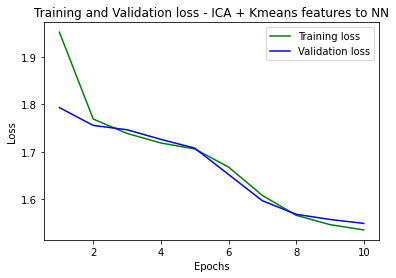

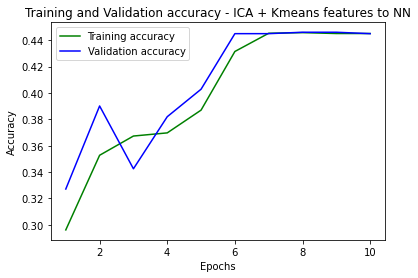

In [267]:
if __name__ == '__main__':
    main()

### ICA + EM ==> NN

In [268]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'ICA + KM features to NN')


    print("ICA + EM ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)
    

In [270]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_ica), predicted_labels.reshape(len(predicted_labels),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.017 	Batch Loss 2.3169	Train Accuracy 0.0625	
Epoch: [0][100/875]	Batch Time 0.003 	Batch Loss 2.1861	Train Accuracy 0.1719	
Epoch: [0][200/875]	Batch Time 0.004 	Batch Loss 2.1587	Train Accuracy 0.1562	
Epoch: [0][300/875]	Batch Time 0.003 	Batch Loss 2.0950	Train Accuracy 0.1406	
Epoch: [0][400/875]	Batch Time 0.004 	Batch Loss 2.1207	Train Accuracy 0.2500	
Epoch: [0][500/875]	Batch Time 0.003 	Batch Loss 2.0416	Train Accuracy 0.2031	
Epoch: [0][600/875]	Batch Time 0.004 	Batch Loss 1.8265	Train Accuracy 0.3594	
Epoch: [0][700/875]	Batch Time 0.004 	Batch Loss 1.9164	Train Accuracy 0.3594	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 1.8414	Train Accuracy 0.3906	
* Average Accuracy of Epoch 0 is: 0.2630
Evaluate: [0/219]	Batch Accuracy 0.3438	
Evaluate: [1/219]	Batch Accuracy 0.3750	
Evaluate: [2/219]	Batch Accuracy 0.3438	
Evaluate: [3/219]	Batch Accuracy 0.4688	
Evaluate: [4/219]	Batch Accuracy 0.3594	
Evaluate: [5/219]	Batch Accuracy 0.4375	
Eval

Epoch: [1][100/875]	Batch Time 0.004 	Batch Loss 2.0168	Train Accuracy 0.2500	
Epoch: [1][200/875]	Batch Time 0.003 	Batch Loss 2.1150	Train Accuracy 0.3438	
Epoch: [1][300/875]	Batch Time 0.002 	Batch Loss 1.8191	Train Accuracy 0.2812	
Epoch: [1][400/875]	Batch Time 0.003 	Batch Loss 1.7310	Train Accuracy 0.4375	
Epoch: [1][500/875]	Batch Time 0.004 	Batch Loss 1.9208	Train Accuracy 0.3281	
Epoch: [1][600/875]	Batch Time 0.003 	Batch Loss 1.8385	Train Accuracy 0.3750	
Epoch: [1][700/875]	Batch Time 0.003 	Batch Loss 1.8961	Train Accuracy 0.3438	
Epoch: [1][800/875]	Batch Time 0.003 	Batch Loss 1.8557	Train Accuracy 0.3906	
* Average Accuracy of Epoch 1 is: 0.3360
Evaluate: [0/219]	Batch Accuracy 0.2344	
Evaluate: [1/219]	Batch Accuracy 0.3281	
Evaluate: [2/219]	Batch Accuracy 0.3750	
Evaluate: [3/219]	Batch Accuracy 0.2812	
Evaluate: [4/219]	Batch Accuracy 0.2500	
Evaluate: [5/219]	Batch Accuracy 0.2969	
Evaluate: [6/219]	Batch Accuracy 0.1719	
Evaluate: [7/219]	Batch Accuracy 0.3594	

Epoch: [2][100/875]	Batch Time 0.003 	Batch Loss 2.1039	Train Accuracy 0.2344	
Epoch: [2][200/875]	Batch Time 0.004 	Batch Loss 1.9124	Train Accuracy 0.3594	
Epoch: [2][300/875]	Batch Time 0.004 	Batch Loss 1.8447	Train Accuracy 0.3438	
Epoch: [2][400/875]	Batch Time 0.003 	Batch Loss 1.9331	Train Accuracy 0.2969	
Epoch: [2][500/875]	Batch Time 0.002 	Batch Loss 1.7731	Train Accuracy 0.3594	
Epoch: [2][600/875]	Batch Time 0.004 	Batch Loss 1.8395	Train Accuracy 0.3906	
Epoch: [2][700/875]	Batch Time 0.004 	Batch Loss 1.9870	Train Accuracy 0.2812	
Epoch: [2][800/875]	Batch Time 0.003 	Batch Loss 1.8432	Train Accuracy 0.3594	
* Average Accuracy of Epoch 2 is: 0.3418
Evaluate: [0/219]	Batch Accuracy 0.2969	
Evaluate: [1/219]	Batch Accuracy 0.3750	
Evaluate: [2/219]	Batch Accuracy 0.3125	
Evaluate: [3/219]	Batch Accuracy 0.4844	
Evaluate: [4/219]	Batch Accuracy 0.3750	
Evaluate: [5/219]	Batch Accuracy 0.2969	
Evaluate: [6/219]	Batch Accuracy 0.3438	
Evaluate: [7/219]	Batch Accuracy 0.3594	

Epoch: [3][100/875]	Batch Time 0.003 	Batch Loss 1.4595	Train Accuracy 0.5312	
Epoch: [3][200/875]	Batch Time 0.004 	Batch Loss 1.6092	Train Accuracy 0.4688	
Epoch: [3][300/875]	Batch Time 0.003 	Batch Loss 1.6812	Train Accuracy 0.4219	
Epoch: [3][400/875]	Batch Time 0.003 	Batch Loss 1.8553	Train Accuracy 0.3125	
Epoch: [3][500/875]	Batch Time 0.004 	Batch Loss 1.8329	Train Accuracy 0.2969	
Epoch: [3][600/875]	Batch Time 0.003 	Batch Loss 1.7638	Train Accuracy 0.3125	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 1.7251	Train Accuracy 0.4531	
Epoch: [3][800/875]	Batch Time 0.004 	Batch Loss 1.7983	Train Accuracy 0.3281	
* Average Accuracy of Epoch 3 is: 0.3434
Evaluate: [0/219]	Batch Accuracy 0.3438	
Evaluate: [1/219]	Batch Accuracy 0.3750	
Evaluate: [2/219]	Batch Accuracy 0.3438	
Evaluate: [3/219]	Batch Accuracy 0.2656	
Evaluate: [4/219]	Batch Accuracy 0.3281	
Evaluate: [5/219]	Batch Accuracy 0.3281	
Evaluate: [6/219]	Batch Accuracy 0.4062	
Evaluate: [7/219]	Batch Accuracy 0.3125	

Epoch: [4][100/875]	Batch Time 0.002 	Batch Loss 1.9435	Train Accuracy 0.2812	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 1.8762	Train Accuracy 0.2969	
Epoch: [4][300/875]	Batch Time 0.002 	Batch Loss 1.7980	Train Accuracy 0.3281	
Epoch: [4][400/875]	Batch Time 0.003 	Batch Loss 1.7270	Train Accuracy 0.4531	
Epoch: [4][500/875]	Batch Time 0.003 	Batch Loss 1.8085	Train Accuracy 0.2969	
Epoch: [4][600/875]	Batch Time 0.004 	Batch Loss 1.6462	Train Accuracy 0.4375	
Epoch: [4][700/875]	Batch Time 0.002 	Batch Loss 1.7112	Train Accuracy 0.4844	
Epoch: [4][800/875]	Batch Time 0.004 	Batch Loss 1.6353	Train Accuracy 0.4219	
* Average Accuracy of Epoch 4 is: 0.3735
Evaluate: [0/219]	Batch Accuracy 0.3594	
Evaluate: [1/219]	Batch Accuracy 0.4375	
Evaluate: [2/219]	Batch Accuracy 0.3594	
Evaluate: [3/219]	Batch Accuracy 0.4062	
Evaluate: [4/219]	Batch Accuracy 0.3906	
Evaluate: [5/219]	Batch Accuracy 0.3594	
Evaluate: [6/219]	Batch Accuracy 0.4219	
Evaluate: [7/219]	Batch Accuracy 0.4062	

Epoch: [5][100/875]	Batch Time 0.003 	Batch Loss 1.7160	Train Accuracy 0.4062	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 1.6371	Train Accuracy 0.4375	
Epoch: [5][300/875]	Batch Time 0.004 	Batch Loss 1.7795	Train Accuracy 0.2812	
Epoch: [5][400/875]	Batch Time 0.004 	Batch Loss 1.7925	Train Accuracy 0.4062	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 1.6784	Train Accuracy 0.4219	
Epoch: [5][600/875]	Batch Time 0.003 	Batch Loss 1.5938	Train Accuracy 0.4062	
Epoch: [5][700/875]	Batch Time 0.003 	Batch Loss 1.7205	Train Accuracy 0.4375	
Epoch: [5][800/875]	Batch Time 0.003 	Batch Loss 1.7155	Train Accuracy 0.5000	
* Average Accuracy of Epoch 5 is: 0.4046
Evaluate: [0/219]	Batch Accuracy 0.5312	
Evaluate: [1/219]	Batch Accuracy 0.4062	
Evaluate: [2/219]	Batch Accuracy 0.4062	
Evaluate: [3/219]	Batch Accuracy 0.4688	
Evaluate: [4/219]	Batch Accuracy 0.4531	
Evaluate: [5/219]	Batch Accuracy 0.3438	
Evaluate: [6/219]	Batch Accuracy 0.4375	
Evaluate: [7/219]	Batch Accuracy 0.4219	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 1.5091	Train Accuracy 0.4531	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 1.6730	Train Accuracy 0.4844	
Epoch: [6][300/875]	Batch Time 0.003 	Batch Loss 1.6199	Train Accuracy 0.4062	
Epoch: [6][400/875]	Batch Time 0.004 	Batch Loss 1.6684	Train Accuracy 0.2969	
Epoch: [6][500/875]	Batch Time 0.002 	Batch Loss 1.7137	Train Accuracy 0.3438	
Epoch: [6][600/875]	Batch Time 0.003 	Batch Loss 1.6600	Train Accuracy 0.4062	
Epoch: [6][700/875]	Batch Time 0.004 	Batch Loss 1.6232	Train Accuracy 0.3906	
Epoch: [6][800/875]	Batch Time 0.002 	Batch Loss 1.6101	Train Accuracy 0.4219	
* Average Accuracy of Epoch 6 is: 0.4019
Evaluate: [0/219]	Batch Accuracy 0.3594	
Evaluate: [1/219]	Batch Accuracy 0.3906	
Evaluate: [2/219]	Batch Accuracy 0.4688	
Evaluate: [3/219]	Batch Accuracy 0.3125	
Evaluate: [4/219]	Batch Accuracy 0.4062	
Evaluate: [5/219]	Batch Accuracy 0.4062	
Evaluate: [6/219]	Batch Accuracy 0.3125	
Evaluate: [7/219]	Batch Accuracy 0.4375	

Epoch: [7][100/875]	Batch Time 0.004 	Batch Loss 1.5667	Train Accuracy 0.4844	
Epoch: [7][200/875]	Batch Time 0.003 	Batch Loss 1.5618	Train Accuracy 0.4688	
Epoch: [7][300/875]	Batch Time 0.004 	Batch Loss 1.5582	Train Accuracy 0.3750	
Epoch: [7][400/875]	Batch Time 0.004 	Batch Loss 1.5673	Train Accuracy 0.4375	
Epoch: [7][500/875]	Batch Time 0.004 	Batch Loss 1.6187	Train Accuracy 0.3438	
Epoch: [7][600/875]	Batch Time 0.005 	Batch Loss 1.3903	Train Accuracy 0.5000	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 1.8682	Train Accuracy 0.3125	
Epoch: [7][800/875]	Batch Time 0.004 	Batch Loss 1.6079	Train Accuracy 0.3906	
* Average Accuracy of Epoch 7 is: 0.4042
Evaluate: [0/219]	Batch Accuracy 0.4688	
Evaluate: [1/219]	Batch Accuracy 0.5156	
Evaluate: [2/219]	Batch Accuracy 0.5000	
Evaluate: [3/219]	Batch Accuracy 0.3750	
Evaluate: [4/219]	Batch Accuracy 0.3438	
Evaluate: [5/219]	Batch Accuracy 0.4219	
Evaluate: [6/219]	Batch Accuracy 0.4375	
Evaluate: [7/219]	Batch Accuracy 0.2969	

Epoch: [8][100/875]	Batch Time 0.003 	Batch Loss 1.6118	Train Accuracy 0.3906	
Epoch: [8][200/875]	Batch Time 0.003 	Batch Loss 1.5957	Train Accuracy 0.3438	
Epoch: [8][300/875]	Batch Time 0.002 	Batch Loss 1.6807	Train Accuracy 0.3125	
Epoch: [8][400/875]	Batch Time 0.002 	Batch Loss 1.8165	Train Accuracy 0.3750	
Epoch: [8][500/875]	Batch Time 0.004 	Batch Loss 1.5530	Train Accuracy 0.4375	
Epoch: [8][600/875]	Batch Time 0.003 	Batch Loss 1.7047	Train Accuracy 0.3594	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 1.6660	Train Accuracy 0.4219	
Epoch: [8][800/875]	Batch Time 0.003 	Batch Loss 1.5887	Train Accuracy 0.4531	
* Average Accuracy of Epoch 8 is: 0.4106
Evaluate: [0/219]	Batch Accuracy 0.2969	
Evaluate: [1/219]	Batch Accuracy 0.5000	
Evaluate: [2/219]	Batch Accuracy 0.4375	
Evaluate: [3/219]	Batch Accuracy 0.3906	
Evaluate: [4/219]	Batch Accuracy 0.3281	
Evaluate: [5/219]	Batch Accuracy 0.2656	
Evaluate: [6/219]	Batch Accuracy 0.3438	
Evaluate: [7/219]	Batch Accuracy 0.4375	

Epoch: [9][100/875]	Batch Time 0.003 	Batch Loss 1.6111	Train Accuracy 0.3281	
Epoch: [9][200/875]	Batch Time 0.002 	Batch Loss 1.7666	Train Accuracy 0.2969	
Epoch: [9][300/875]	Batch Time 0.002 	Batch Loss 1.8112	Train Accuracy 0.3125	
Epoch: [9][400/875]	Batch Time 0.003 	Batch Loss 1.5309	Train Accuracy 0.4062	
Epoch: [9][500/875]	Batch Time 0.004 	Batch Loss 1.5866	Train Accuracy 0.4219	
Epoch: [9][600/875]	Batch Time 0.002 	Batch Loss 1.5132	Train Accuracy 0.4531	
Epoch: [9][700/875]	Batch Time 0.004 	Batch Loss 1.9370	Train Accuracy 0.2188	
Epoch: [9][800/875]	Batch Time 0.003 	Batch Loss 1.5850	Train Accuracy 0.4375	
* Average Accuracy of Epoch 9 is: 0.4118
Evaluate: [0/219]	Batch Accuracy 0.5000	
Evaluate: [1/219]	Batch Accuracy 0.4531	
Evaluate: [2/219]	Batch Accuracy 0.5000	
Evaluate: [3/219]	Batch Accuracy 0.4844	
Evaluate: [4/219]	Batch Accuracy 0.4688	
Evaluate: [5/219]	Batch Accuracy 0.4688	
Evaluate: [6/219]	Batch Accuracy 0.4688	
Evaluate: [7/219]	Batch Accuracy 0.6250	

Evaluate: [58/219]	Batch Accuracy 0.3438	
Evaluate: [59/219]	Batch Accuracy 0.5000	
Evaluate: [60/219]	Batch Accuracy 0.3594	
Evaluate: [61/219]	Batch Accuracy 0.5000	
Evaluate: [62/219]	Batch Accuracy 0.5000	
Evaluate: [63/219]	Batch Accuracy 0.4062	
Evaluate: [64/219]	Batch Accuracy 0.4219	
Evaluate: [65/219]	Batch Accuracy 0.3594	
Evaluate: [66/219]	Batch Accuracy 0.4062	
Evaluate: [67/219]	Batch Accuracy 0.3281	
Evaluate: [68/219]	Batch Accuracy 0.3594	
Evaluate: [69/219]	Batch Accuracy 0.4531	
Evaluate: [70/219]	Batch Accuracy 0.5000	
Evaluate: [71/219]	Batch Accuracy 0.3750	
Evaluate: [72/219]	Batch Accuracy 0.3125	
Evaluate: [73/219]	Batch Accuracy 0.4688	
Evaluate: [74/219]	Batch Accuracy 0.4688	
Evaluate: [75/219]	Batch Accuracy 0.4531	
Evaluate: [76/219]	Batch Accuracy 0.3438	
Evaluate: [77/219]	Batch Accuracy 0.4062	
Evaluate: [78/219]	Batch Accuracy 0.5000	
Evaluate: [79/219]	Batch Accuracy 0.3438	
Evaluate: [80/219]	Batch Accuracy 0.3438	
Evaluate: [81/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


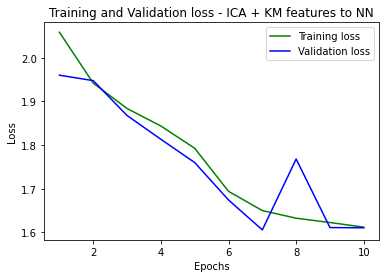

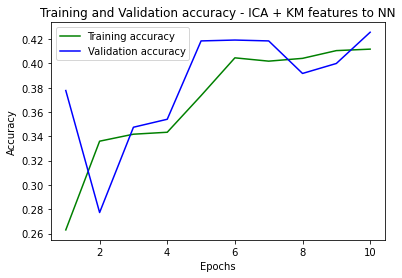

In [271]:
if __name__ == '__main__':
    main()

### RP + Kmeans ==> NN

In [272]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'RP + Kmeans features to NN')


    print("RP + Kmeans ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)
    

In [275]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_rp), labels_rp_kmean.reshape(len(labels_rp_kmean),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.006 	Batch Loss 2.3163	Train Accuracy 0.1250	
Epoch: [0][100/875]	Batch Time 0.003 	Batch Loss 0.4958	Train Accuracy 0.8594	
Epoch: [0][200/875]	Batch Time 0.005 	Batch Loss 0.5298	Train Accuracy 0.8906	
Epoch: [0][300/875]	Batch Time 0.004 	Batch Loss 0.4997	Train Accuracy 0.8438	
Epoch: [0][400/875]	Batch Time 0.003 	Batch Loss 0.3239	Train Accuracy 0.8906	
Epoch: [0][500/875]	Batch Time 0.004 	Batch Loss 0.2926	Train Accuracy 0.8750	
Epoch: [0][600/875]	Batch Time 0.006 	Batch Loss 0.1361	Train Accuracy 0.9844	
Epoch: [0][700/875]	Batch Time 0.004 	Batch Loss 0.3293	Train Accuracy 0.8750	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.2108	Train Accuracy 0.9531	
* Average Accuracy of Epoch 0 is: 0.8782
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.8906	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9219	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Eval

Epoch: [1][100/875]	Batch Time 0.003 	Batch Loss 0.2690	Train Accuracy 0.9062	
Epoch: [1][200/875]	Batch Time 0.004 	Batch Loss 0.2217	Train Accuracy 0.9531	
Epoch: [1][300/875]	Batch Time 0.003 	Batch Loss 0.1146	Train Accuracy 0.9531	
Epoch: [1][400/875]	Batch Time 0.002 	Batch Loss 0.1620	Train Accuracy 0.9375	
Epoch: [1][500/875]	Batch Time 0.005 	Batch Loss 0.4090	Train Accuracy 0.8906	
Epoch: [1][600/875]	Batch Time 0.004 	Batch Loss 0.2075	Train Accuracy 0.9219	
Epoch: [1][700/875]	Batch Time 0.004 	Batch Loss 0.3020	Train Accuracy 0.9375	
Epoch: [1][800/875]	Batch Time 0.002 	Batch Loss 0.0989	Train Accuracy 0.9688	
* Average Accuracy of Epoch 1 is: 0.9439
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9688	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9062	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [2][100/875]	Batch Time 0.004 	Batch Loss 0.2432	Train Accuracy 0.9375	
Epoch: [2][200/875]	Batch Time 0.003 	Batch Loss 0.3241	Train Accuracy 0.8750	
Epoch: [2][300/875]	Batch Time 0.003 	Batch Loss 0.1158	Train Accuracy 0.9688	
Epoch: [2][400/875]	Batch Time 0.002 	Batch Loss 0.1376	Train Accuracy 0.9531	
Epoch: [2][500/875]	Batch Time 0.004 	Batch Loss 0.1498	Train Accuracy 0.9375	
Epoch: [2][600/875]	Batch Time 0.002 	Batch Loss 0.3886	Train Accuracy 0.9219	
Epoch: [2][700/875]	Batch Time 0.004 	Batch Loss 0.1863	Train Accuracy 0.9219	
Epoch: [2][800/875]	Batch Time 0.003 	Batch Loss 0.0145	Train Accuracy 1.0000	
* Average Accuracy of Epoch 2 is: 0.9591
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9844	
Evaluate: [5/219]	Batch Accuracy 0.9375	
Evaluate: [6/219]	Batch Accuracy 0.9375	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [3][100/875]	Batch Time 0.003 	Batch Loss 0.0479	Train Accuracy 0.9844	
Epoch: [3][200/875]	Batch Time 0.002 	Batch Loss 0.0559	Train Accuracy 0.9688	
Epoch: [3][300/875]	Batch Time 0.004 	Batch Loss 0.2098	Train Accuracy 0.9375	
Epoch: [3][400/875]	Batch Time 0.004 	Batch Loss 0.1709	Train Accuracy 0.9531	
Epoch: [3][500/875]	Batch Time 0.003 	Batch Loss 0.1373	Train Accuracy 0.9531	
Epoch: [3][600/875]	Batch Time 0.004 	Batch Loss 0.0799	Train Accuracy 0.9688	
Epoch: [3][700/875]	Batch Time 0.003 	Batch Loss 0.0142	Train Accuracy 1.0000	
Epoch: [3][800/875]	Batch Time 0.002 	Batch Loss 0.1215	Train Accuracy 0.9688	
* Average Accuracy of Epoch 3 is: 0.9698
Evaluate: [0/219]	Batch Accuracy 0.9844	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 1.0000	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9688	
Evaluate: [5/219]	Batch Accuracy 0.9219	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [4][100/875]	Batch Time 0.003 	Batch Loss 0.0549	Train Accuracy 0.9844	
Epoch: [4][200/875]	Batch Time 0.004 	Batch Loss 0.0875	Train Accuracy 0.9688	
Epoch: [4][300/875]	Batch Time 0.002 	Batch Loss 0.0726	Train Accuracy 0.9844	
Epoch: [4][400/875]	Batch Time 0.003 	Batch Loss 0.0136	Train Accuracy 1.0000	
Epoch: [4][500/875]	Batch Time 0.004 	Batch Loss 0.1398	Train Accuracy 0.9531	
Epoch: [4][600/875]	Batch Time 0.003 	Batch Loss 0.0362	Train Accuracy 1.0000	
Epoch: [4][700/875]	Batch Time 0.003 	Batch Loss 0.1391	Train Accuracy 0.9531	
Epoch: [4][800/875]	Batch Time 0.003 	Batch Loss 0.1307	Train Accuracy 0.9375	
* Average Accuracy of Epoch 4 is: 0.9762
Evaluate: [0/219]	Batch Accuracy 1.0000	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9375	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [5][100/875]	Batch Time 0.003 	Batch Loss 0.0402	Train Accuracy 0.9844	
Epoch: [5][200/875]	Batch Time 0.003 	Batch Loss 0.0215	Train Accuracy 0.9844	
Epoch: [5][300/875]	Batch Time 0.004 	Batch Loss 0.1568	Train Accuracy 0.9531	
Epoch: [5][400/875]	Batch Time 0.002 	Batch Loss 0.0382	Train Accuracy 1.0000	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 0.0519	Train Accuracy 0.9688	
Epoch: [5][600/875]	Batch Time 0.003 	Batch Loss 0.0297	Train Accuracy 1.0000	
Epoch: [5][700/875]	Batch Time 0.003 	Batch Loss 0.1886	Train Accuracy 0.9219	
Epoch: [5][800/875]	Batch Time 0.004 	Batch Loss 0.0132	Train Accuracy 1.0000	
* Average Accuracy of Epoch 5 is: 0.9809
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9844	
Evaluate: [4/219]	Batch Accuracy 0.9219	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 1.0000	
Evaluate: [7/219]	Batch Accuracy 0.9844	

Epoch: [6][100/875]	Batch Time 0.004 	Batch Loss 0.0142	Train Accuracy 1.0000	
Epoch: [6][200/875]	Batch Time 0.003 	Batch Loss 0.0523	Train Accuracy 0.9688	
Epoch: [6][300/875]	Batch Time 0.003 	Batch Loss 0.0082	Train Accuracy 1.0000	
Epoch: [6][400/875]	Batch Time 0.002 	Batch Loss 0.0227	Train Accuracy 1.0000	
Epoch: [6][500/875]	Batch Time 0.002 	Batch Loss 0.0405	Train Accuracy 0.9844	
Epoch: [6][600/875]	Batch Time 0.002 	Batch Loss 0.0856	Train Accuracy 0.9531	
Epoch: [6][700/875]	Batch Time 0.003 	Batch Loss 0.0452	Train Accuracy 0.9844	
Epoch: [6][800/875]	Batch Time 0.003 	Batch Loss 0.0541	Train Accuracy 0.9688	
* Average Accuracy of Epoch 6 is: 0.9842
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9844	

Epoch: [7][100/875]	Batch Time 0.002 	Batch Loss 0.1224	Train Accuracy 0.9688	
Epoch: [7][200/875]	Batch Time 0.004 	Batch Loss 0.0107	Train Accuracy 1.0000	
Epoch: [7][300/875]	Batch Time 0.003 	Batch Loss 0.0123	Train Accuracy 1.0000	
Epoch: [7][400/875]	Batch Time 0.002 	Batch Loss 0.0038	Train Accuracy 1.0000	
Epoch: [7][500/875]	Batch Time 0.003 	Batch Loss 0.0350	Train Accuracy 0.9844	
Epoch: [7][600/875]	Batch Time 0.003 	Batch Loss 0.0067	Train Accuracy 1.0000	
Epoch: [7][700/875]	Batch Time 0.004 	Batch Loss 0.0795	Train Accuracy 0.9844	
Epoch: [7][800/875]	Batch Time 0.003 	Batch Loss 0.0648	Train Accuracy 0.9844	
* Average Accuracy of Epoch 7 is: 0.9900
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9844	
Evaluate: [4/219]	Batch Accuracy 0.9844	
Evaluate: [5/219]	Batch Accuracy 1.0000	
Evaluate: [6/219]	Batch Accuracy 1.0000	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [8][100/875]	Batch Time 0.003 	Batch Loss 0.0141	Train Accuracy 1.0000	
Epoch: [8][200/875]	Batch Time 0.004 	Batch Loss 0.0246	Train Accuracy 0.9844	
Epoch: [8][300/875]	Batch Time 0.004 	Batch Loss 0.0054	Train Accuracy 1.0000	
Epoch: [8][400/875]	Batch Time 0.004 	Batch Loss 0.0117	Train Accuracy 1.0000	
Epoch: [8][500/875]	Batch Time 0.002 	Batch Loss 0.0084	Train Accuracy 1.0000	
Epoch: [8][600/875]	Batch Time 0.002 	Batch Loss 0.0444	Train Accuracy 0.9844	
Epoch: [8][700/875]	Batch Time 0.004 	Batch Loss 0.0220	Train Accuracy 1.0000	
Epoch: [8][800/875]	Batch Time 0.003 	Batch Loss 0.0442	Train Accuracy 0.9688	
* Average Accuracy of Epoch 8 is: 0.9916
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9531	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9844	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9844	

Epoch: [9][100/875]	Batch Time 0.002 	Batch Loss 0.0263	Train Accuracy 1.0000	
Epoch: [9][200/875]	Batch Time 0.002 	Batch Loss 0.0075	Train Accuracy 1.0000	
Epoch: [9][300/875]	Batch Time 0.002 	Batch Loss 0.0294	Train Accuracy 0.9844	
Epoch: [9][400/875]	Batch Time 0.004 	Batch Loss 0.0228	Train Accuracy 1.0000	
Epoch: [9][500/875]	Batch Time 0.003 	Batch Loss 0.0047	Train Accuracy 1.0000	
Epoch: [9][600/875]	Batch Time 0.005 	Batch Loss 0.0060	Train Accuracy 1.0000	
Epoch: [9][700/875]	Batch Time 0.003 	Batch Loss 0.0355	Train Accuracy 1.0000	
Epoch: [9][800/875]	Batch Time 0.002 	Batch Loss 0.0185	Train Accuracy 1.0000	
* Average Accuracy of Epoch 9 is: 0.9931
Evaluate: [0/219]	Batch Accuracy 0.9844	
Evaluate: [1/219]	Batch Accuracy 1.0000	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9688	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Evaluate: [64/219]	Batch Accuracy 0.9531	
Evaluate: [65/219]	Batch Accuracy 0.9844	
Evaluate: [66/219]	Batch Accuracy 0.9531	
Evaluate: [67/219]	Batch Accuracy 0.9844	
Evaluate: [68/219]	Batch Accuracy 0.9844	
Evaluate: [69/219]	Batch Accuracy 0.9531	
Evaluate: [70/219]	Batch Accuracy 0.9844	
Evaluate: [71/219]	Batch Accuracy 0.9844	
Evaluate: [72/219]	Batch Accuracy 0.9844	
Evaluate: [73/219]	Batch Accuracy 0.9531	
Evaluate: [74/219]	Batch Accuracy 0.9219	
Evaluate: [75/219]	Batch Accuracy 0.9531	
Evaluate: [76/219]	Batch Accuracy 0.9688	
Evaluate: [77/219]	Batch Accuracy 0.9844	
Evaluate: [78/219]	Batch Accuracy 1.0000	
Evaluate: [79/219]	Batch Accuracy 0.9844	
Evaluate: [80/219]	Batch Accuracy 0.9844	
Evaluate: [81/219]	Batch Accuracy 0.9844	
Evaluate: [82/219]	Batch Accuracy 0.9219	
Evaluate: [83/219]	Batch Accuracy 0.9531	
Evaluate: [84/219]	Batch Accuracy 0.9375	
Evaluate: [85/219]	Batch Accuracy 0.9219	
Evaluate: [86/219]	Batch Accuracy 0.9688	
Evaluate: [87/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


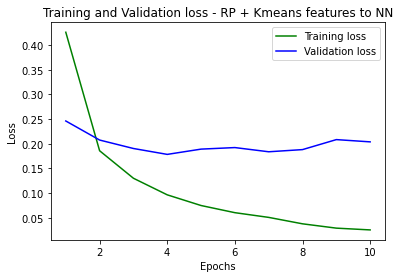

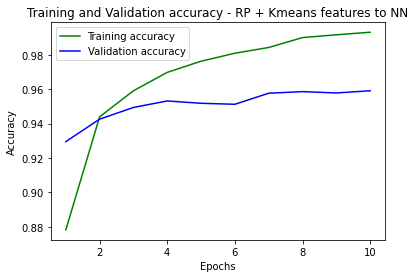

In [276]:
if __name__ == '__main__':
    main()

### RP + EM ==> NN

In [278]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'RP + EM features to NN')


    print("RP + EM ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [280]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_rp), labels_rp_em.reshape(len(labels_rp_em),1)), axis = 1)
transform_target = np.array(y).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/875]	Batch Time 0.007 	Batch Loss 2.4127	Train Accuracy 0.0469	
Epoch: [0][100/875]	Batch Time 0.004 	Batch Loss 0.4355	Train Accuracy 0.8750	
Epoch: [0][200/875]	Batch Time 0.004 	Batch Loss 0.2811	Train Accuracy 0.9219	
Epoch: [0][300/875]	Batch Time 0.002 	Batch Loss 0.2881	Train Accuracy 0.9219	
Epoch: [0][400/875]	Batch Time 0.003 	Batch Loss 0.5154	Train Accuracy 0.8750	
Epoch: [0][500/875]	Batch Time 0.003 	Batch Loss 0.2185	Train Accuracy 0.8906	
Epoch: [0][600/875]	Batch Time 0.002 	Batch Loss 0.2725	Train Accuracy 0.9062	
Epoch: [0][700/875]	Batch Time 0.004 	Batch Loss 0.1688	Train Accuracy 0.9688	
Epoch: [0][800/875]	Batch Time 0.004 	Batch Loss 0.2926	Train Accuracy 0.9219	
* Average Accuracy of Epoch 0 is: 0.8807
Evaluate: [0/219]	Batch Accuracy 0.9531	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9219	
Evaluate: [3/219]	Batch Accuracy 0.8750	
Evaluate: [4/219]	Batch Accuracy 0.9375	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Eval

Epoch: [1][100/875]	Batch Time 0.002 	Batch Loss 0.1827	Train Accuracy 0.9531	
Epoch: [1][200/875]	Batch Time 0.002 	Batch Loss 0.1836	Train Accuracy 0.9219	
Epoch: [1][300/875]	Batch Time 0.003 	Batch Loss 0.1889	Train Accuracy 0.9219	
Epoch: [1][400/875]	Batch Time 0.004 	Batch Loss 0.2271	Train Accuracy 0.9375	
Epoch: [1][500/875]	Batch Time 0.002 	Batch Loss 0.1632	Train Accuracy 0.9219	
Epoch: [1][600/875]	Batch Time 0.005 	Batch Loss 0.1649	Train Accuracy 0.9531	
Epoch: [1][700/875]	Batch Time 0.003 	Batch Loss 0.1621	Train Accuracy 0.9375	
Epoch: [1][800/875]	Batch Time 0.003 	Batch Loss 0.1044	Train Accuracy 0.9688	
* Average Accuracy of Epoch 1 is: 0.9449
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9062	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9062	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 1.0000	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [2][100/875]	Batch Time 0.002 	Batch Loss 0.2074	Train Accuracy 0.9375	
Epoch: [2][200/875]	Batch Time 0.003 	Batch Loss 0.2359	Train Accuracy 0.9375	
Epoch: [2][300/875]	Batch Time 0.002 	Batch Loss 0.0970	Train Accuracy 0.9531	
Epoch: [2][400/875]	Batch Time 0.002 	Batch Loss 0.1541	Train Accuracy 0.9531	
Epoch: [2][500/875]	Batch Time 0.003 	Batch Loss 0.2018	Train Accuracy 0.8906	
Epoch: [2][600/875]	Batch Time 0.004 	Batch Loss 0.1301	Train Accuracy 0.9375	
Epoch: [2][700/875]	Batch Time 0.003 	Batch Loss 0.2624	Train Accuracy 0.9062	
Epoch: [2][800/875]	Batch Time 0.004 	Batch Loss 0.0643	Train Accuracy 0.9844	
* Average Accuracy of Epoch 2 is: 0.9587
Evaluate: [0/219]	Batch Accuracy 0.9844	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9844	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9375	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [3][100/875]	Batch Time 0.004 	Batch Loss 0.5504	Train Accuracy 0.9531	
Epoch: [3][200/875]	Batch Time 0.003 	Batch Loss 0.0751	Train Accuracy 0.9688	
Epoch: [3][300/875]	Batch Time 0.004 	Batch Loss 0.1250	Train Accuracy 0.9219	
Epoch: [3][400/875]	Batch Time 0.004 	Batch Loss 0.1577	Train Accuracy 0.9375	
Epoch: [3][500/875]	Batch Time 0.003 	Batch Loss 0.0506	Train Accuracy 0.9688	
Epoch: [3][600/875]	Batch Time 0.004 	Batch Loss 0.0840	Train Accuracy 0.9844	
Epoch: [3][700/875]	Batch Time 0.004 	Batch Loss 0.0777	Train Accuracy 0.9531	
Epoch: [3][800/875]	Batch Time 0.002 	Batch Loss 0.1235	Train Accuracy 0.9688	
* Average Accuracy of Epoch 3 is: 0.9689
Evaluate: [0/219]	Batch Accuracy 0.9531	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9531	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9062	

Epoch: [4][100/875]	Batch Time 0.004 	Batch Loss 0.0229	Train Accuracy 1.0000	
Epoch: [4][200/875]	Batch Time 0.003 	Batch Loss 0.0143	Train Accuracy 1.0000	
Epoch: [4][300/875]	Batch Time 0.004 	Batch Loss 0.0329	Train Accuracy 0.9844	
Epoch: [4][400/875]	Batch Time 0.002 	Batch Loss 0.0430	Train Accuracy 0.9688	
Epoch: [4][500/875]	Batch Time 0.004 	Batch Loss 0.0368	Train Accuracy 0.9844	
Epoch: [4][600/875]	Batch Time 0.003 	Batch Loss 0.0433	Train Accuracy 0.9844	
Epoch: [4][700/875]	Batch Time 0.004 	Batch Loss 0.1113	Train Accuracy 0.9531	
Epoch: [4][800/875]	Batch Time 0.004 	Batch Loss 0.0569	Train Accuracy 0.9844	
* Average Accuracy of Epoch 4 is: 0.9748
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9375	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.9688	
Evaluate: [5/219]	Batch Accuracy 0.9531	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9375	

Epoch: [5][100/875]	Batch Time 0.002 	Batch Loss 0.0423	Train Accuracy 1.0000	
Epoch: [5][200/875]	Batch Time 0.004 	Batch Loss 0.0338	Train Accuracy 1.0000	
Epoch: [5][300/875]	Batch Time 0.004 	Batch Loss 0.0750	Train Accuracy 0.9531	
Epoch: [5][400/875]	Batch Time 0.003 	Batch Loss 0.0495	Train Accuracy 0.9844	
Epoch: [5][500/875]	Batch Time 0.003 	Batch Loss 0.0206	Train Accuracy 1.0000	
Epoch: [5][600/875]	Batch Time 0.002 	Batch Loss 0.0569	Train Accuracy 0.9688	
Epoch: [5][700/875]	Batch Time 0.003 	Batch Loss 0.0362	Train Accuracy 1.0000	
Epoch: [5][800/875]	Batch Time 0.003 	Batch Loss 0.0174	Train Accuracy 1.0000	
* Average Accuracy of Epoch 5 is: 0.9796
Evaluate: [0/219]	Batch Accuracy 0.9375	
Evaluate: [1/219]	Batch Accuracy 0.9219	
Evaluate: [2/219]	Batch Accuracy 0.9844	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.9688	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9375	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Epoch: [6][100/875]	Batch Time 0.003 	Batch Loss 0.0280	Train Accuracy 1.0000	
Epoch: [6][200/875]	Batch Time 0.004 	Batch Loss 0.0711	Train Accuracy 0.9688	
Epoch: [6][300/875]	Batch Time 0.002 	Batch Loss 0.0465	Train Accuracy 0.9844	
Epoch: [6][400/875]	Batch Time 0.004 	Batch Loss 0.0197	Train Accuracy 1.0000	
Epoch: [6][500/875]	Batch Time 0.003 	Batch Loss 0.0213	Train Accuracy 1.0000	
Epoch: [6][600/875]	Batch Time 0.003 	Batch Loss 0.0145	Train Accuracy 1.0000	
Epoch: [6][700/875]	Batch Time 0.003 	Batch Loss 0.0318	Train Accuracy 0.9844	
Epoch: [6][800/875]	Batch Time 0.002 	Batch Loss 0.0370	Train Accuracy 0.9844	
* Average Accuracy of Epoch 6 is: 0.9828
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 1.0000	
Evaluate: [2/219]	Batch Accuracy 0.9375	
Evaluate: [3/219]	Batch Accuracy 0.9844	
Evaluate: [4/219]	Batch Accuracy 0.8906	
Evaluate: [5/219]	Batch Accuracy 0.9375	
Evaluate: [6/219]	Batch Accuracy 0.9531	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [7][100/875]	Batch Time 0.003 	Batch Loss 0.0224	Train Accuracy 0.9844	
Epoch: [7][200/875]	Batch Time 0.004 	Batch Loss 0.0372	Train Accuracy 0.9844	
Epoch: [7][300/875]	Batch Time 0.002 	Batch Loss 0.0243	Train Accuracy 1.0000	
Epoch: [7][400/875]	Batch Time 0.003 	Batch Loss 0.0917	Train Accuracy 0.9688	
Epoch: [7][500/875]	Batch Time 0.003 	Batch Loss 0.0786	Train Accuracy 0.9844	
Epoch: [7][600/875]	Batch Time 0.003 	Batch Loss 0.0642	Train Accuracy 0.9688	
Epoch: [7][700/875]	Batch Time 0.003 	Batch Loss 0.0058	Train Accuracy 1.0000	
Epoch: [7][800/875]	Batch Time 0.004 	Batch Loss 0.0591	Train Accuracy 0.9844	
* Average Accuracy of Epoch 7 is: 0.9885
Evaluate: [0/219]	Batch Accuracy 0.9688	
Evaluate: [1/219]	Batch Accuracy 0.9688	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9688	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9844	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [8][100/875]	Batch Time 0.002 	Batch Loss 0.0254	Train Accuracy 0.9844	
Epoch: [8][200/875]	Batch Time 0.004 	Batch Loss 0.0227	Train Accuracy 1.0000	
Epoch: [8][300/875]	Batch Time 0.004 	Batch Loss 0.0112	Train Accuracy 1.0000	
Epoch: [8][400/875]	Batch Time 0.002 	Batch Loss 0.0068	Train Accuracy 1.0000	
Epoch: [8][500/875]	Batch Time 0.002 	Batch Loss 0.0869	Train Accuracy 0.9844	
Epoch: [8][600/875]	Batch Time 0.003 	Batch Loss 0.0443	Train Accuracy 0.9844	
Epoch: [8][700/875]	Batch Time 0.003 	Batch Loss 0.0232	Train Accuracy 0.9844	
Epoch: [8][800/875]	Batch Time 0.004 	Batch Loss 0.0111	Train Accuracy 1.0000	
* Average Accuracy of Epoch 8 is: 0.9931
Evaluate: [0/219]	Batch Accuracy 0.9844	
Evaluate: [1/219]	Batch Accuracy 0.9844	
Evaluate: [2/219]	Batch Accuracy 0.9062	
Evaluate: [3/219]	Batch Accuracy 0.9375	
Evaluate: [4/219]	Batch Accuracy 0.9062	
Evaluate: [5/219]	Batch Accuracy 0.9688	
Evaluate: [6/219]	Batch Accuracy 0.9844	
Evaluate: [7/219]	Batch Accuracy 0.9688	

Epoch: [9][100/875]	Batch Time 0.003 	Batch Loss 0.0120	Train Accuracy 1.0000	
Epoch: [9][200/875]	Batch Time 0.002 	Batch Loss 0.0244	Train Accuracy 1.0000	
Epoch: [9][300/875]	Batch Time 0.003 	Batch Loss 0.0572	Train Accuracy 0.9688	
Epoch: [9][400/875]	Batch Time 0.003 	Batch Loss 0.0219	Train Accuracy 1.0000	
Epoch: [9][500/875]	Batch Time 0.003 	Batch Loss 0.0464	Train Accuracy 0.9688	
Epoch: [9][600/875]	Batch Time 0.003 	Batch Loss 0.0208	Train Accuracy 1.0000	
Epoch: [9][700/875]	Batch Time 0.002 	Batch Loss 0.0237	Train Accuracy 1.0000	
Epoch: [9][800/875]	Batch Time 0.002 	Batch Loss 0.0640	Train Accuracy 0.9531	
* Average Accuracy of Epoch 9 is: 0.9902
Evaluate: [0/219]	Batch Accuracy 0.9062	
Evaluate: [1/219]	Batch Accuracy 0.9531	
Evaluate: [2/219]	Batch Accuracy 0.9688	
Evaluate: [3/219]	Batch Accuracy 0.9062	
Evaluate: [4/219]	Batch Accuracy 0.9531	
Evaluate: [5/219]	Batch Accuracy 0.9844	
Evaluate: [6/219]	Batch Accuracy 0.8906	
Evaluate: [7/219]	Batch Accuracy 0.9531	

Evaluate: [71/219]	Batch Accuracy 0.9688	
Evaluate: [72/219]	Batch Accuracy 0.9844	
Evaluate: [73/219]	Batch Accuracy 0.9688	
Evaluate: [74/219]	Batch Accuracy 1.0000	
Evaluate: [75/219]	Batch Accuracy 0.9688	
Evaluate: [76/219]	Batch Accuracy 0.9531	
Evaluate: [77/219]	Batch Accuracy 0.9531	
Evaluate: [78/219]	Batch Accuracy 0.9688	
Evaluate: [79/219]	Batch Accuracy 0.9688	
Evaluate: [80/219]	Batch Accuracy 0.9062	
Evaluate: [81/219]	Batch Accuracy 0.9375	
Evaluate: [82/219]	Batch Accuracy 0.9062	
Evaluate: [83/219]	Batch Accuracy 1.0000	
Evaluate: [84/219]	Batch Accuracy 0.9375	
Evaluate: [85/219]	Batch Accuracy 0.9531	
Evaluate: [86/219]	Batch Accuracy 0.9688	
Evaluate: [87/219]	Batch Accuracy 0.9531	
Evaluate: [88/219]	Batch Accuracy 0.9375	
Evaluate: [89/219]	Batch Accuracy 0.9531	
Evaluate: [90/219]	Batch Accuracy 0.9375	
Evaluate: [91/219]	Batch Accuracy 1.0000	
Evaluate: [92/219]	Batch Accuracy 0.9375	
Evaluate: [93/219]	Batch Accuracy 1.0000	
Evaluate: [94/219]	Batch Accuracy 

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


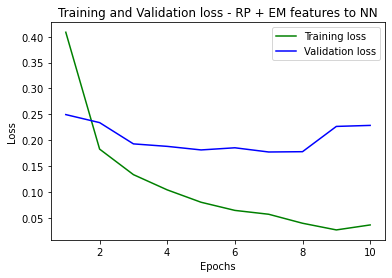

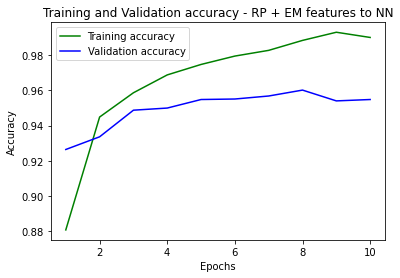

In [281]:
if __name__ == '__main__':
    main()

### LDA + Kmeans ==> NN

In [284]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'LDA + Kmeans features to NN')


    print("LDA + Kmeans ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [287]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_train_lda), labels_lda_kmean.reshape(len(labels_lda_kmean),1)), axis = 1)
transform_target = np.array(y_train).astype('int32')
n_input = transform_input.shape[1]


Epoch: [0][0/700]	Batch Time 0.035 	Batch Loss 2.3675	Train Accuracy 0.0938	
Epoch: [0][100/700]	Batch Time 0.002 	Batch Loss 0.3345	Train Accuracy 0.9062	
Epoch: [0][200/700]	Batch Time 0.003 	Batch Loss 0.2018	Train Accuracy 0.9531	
Epoch: [0][300/700]	Batch Time 0.003 	Batch Loss 0.4748	Train Accuracy 0.8594	
Epoch: [0][400/700]	Batch Time 0.003 	Batch Loss 0.3935	Train Accuracy 0.9062	
Epoch: [0][500/700]	Batch Time 0.004 	Batch Loss 0.3712	Train Accuracy 0.9219	
Epoch: [0][600/700]	Batch Time 0.002 	Batch Loss 0.3032	Train Accuracy 0.9062	
* Average Accuracy of Epoch 0 is: 0.8798
Evaluate: [0/175]	Batch Accuracy 0.8594	
Evaluate: [1/175]	Batch Accuracy 0.9375	
Evaluate: [2/175]	Batch Accuracy 0.8906	
Evaluate: [3/175]	Batch Accuracy 0.8438	
Evaluate: [4/175]	Batch Accuracy 0.9375	
Evaluate: [5/175]	Batch Accuracy 0.8125	
Evaluate: [6/175]	Batch Accuracy 0.8750	
Evaluate: [7/175]	Batch Accuracy 0.9219	
Evaluate: [8/175]	Batch Accuracy 0.8750	
Evaluate: [9/175]	Batch Accuracy 0.9375

Epoch: [1][200/700]	Batch Time 0.002 	Batch Loss 0.2981	Train Accuracy 0.8594	
Epoch: [1][300/700]	Batch Time 0.003 	Batch Loss 0.2704	Train Accuracy 0.8906	
Epoch: [1][400/700]	Batch Time 0.003 	Batch Loss 0.2567	Train Accuracy 0.9062	
Epoch: [1][500/700]	Batch Time 0.002 	Batch Loss 0.2504	Train Accuracy 0.9219	
Epoch: [1][600/700]	Batch Time 0.002 	Batch Loss 0.3108	Train Accuracy 0.9062	
* Average Accuracy of Epoch 1 is: 0.9039
Evaluate: [0/175]	Batch Accuracy 0.9531	
Evaluate: [1/175]	Batch Accuracy 0.9219	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.9062	
Evaluate: [4/175]	Batch Accuracy 0.8594	
Evaluate: [5/175]	Batch Accuracy 0.9375	
Evaluate: [6/175]	Batch Accuracy 0.8906	
Evaluate: [7/175]	Batch Accuracy 0.8281	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.9375	
Evaluate: [10/175]	Batch Accuracy 0.8750	
Evaluate: [11/175]	Batch Accuracy 0.9375	
Evaluate: [12/175]	Batch Accuracy 0.8594	
Evaluate: [13/175]	Batch Acc

Epoch: [2][400/700]	Batch Time 0.003 	Batch Loss 0.3191	Train Accuracy 0.8750	
Epoch: [2][500/700]	Batch Time 0.003 	Batch Loss 0.3961	Train Accuracy 0.8906	
Epoch: [2][600/700]	Batch Time 0.002 	Batch Loss 0.4990	Train Accuracy 0.8750	
* Average Accuracy of Epoch 2 is: 0.9106
Evaluate: [0/175]	Batch Accuracy 0.9531	
Evaluate: [1/175]	Batch Accuracy 0.9062	
Evaluate: [2/175]	Batch Accuracy 0.9531	
Evaluate: [3/175]	Batch Accuracy 0.7969	
Evaluate: [4/175]	Batch Accuracy 0.9531	
Evaluate: [5/175]	Batch Accuracy 0.9219	
Evaluate: [6/175]	Batch Accuracy 0.9688	
Evaluate: [7/175]	Batch Accuracy 0.8906	
Evaluate: [8/175]	Batch Accuracy 0.8750	
Evaluate: [9/175]	Batch Accuracy 0.8750	
Evaluate: [10/175]	Batch Accuracy 0.8750	
Evaluate: [11/175]	Batch Accuracy 0.8906	
Evaluate: [12/175]	Batch Accuracy 0.8906	
Evaluate: [13/175]	Batch Accuracy 0.9062	
Evaluate: [14/175]	Batch Accuracy 0.8750	
Evaluate: [15/175]	Batch Accuracy 0.8594	
Evaluate: [16/175]	Batch Accuracy 0.9219	
Evaluate: [17/175]

Epoch: [3][600/700]	Batch Time 0.003 	Batch Loss 0.4312	Train Accuracy 0.9219	
* Average Accuracy of Epoch 3 is: 0.9124
Evaluate: [0/175]	Batch Accuracy 0.9219	
Evaluate: [1/175]	Batch Accuracy 0.9375	
Evaluate: [2/175]	Batch Accuracy 0.9531	
Evaluate: [3/175]	Batch Accuracy 0.9219	
Evaluate: [4/175]	Batch Accuracy 0.9219	
Evaluate: [5/175]	Batch Accuracy 0.8125	
Evaluate: [6/175]	Batch Accuracy 0.9375	
Evaluate: [7/175]	Batch Accuracy 0.8594	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.9219	
Evaluate: [10/175]	Batch Accuracy 0.9375	
Evaluate: [11/175]	Batch Accuracy 0.8594	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.8750	
Evaluate: [14/175]	Batch Accuracy 0.9375	
Evaluate: [15/175]	Batch Accuracy 0.9375	
Evaluate: [16/175]	Batch Accuracy 0.8906	
Evaluate: [17/175]	Batch Accuracy 0.9688	
Evaluate: [18/175]	Batch Accuracy 0.8906	
Evaluate: [19/175]	Batch Accuracy 0.8594	
Evaluate: [20/175]	Batch Accuracy 0.8750	
Evaluate

Evaluate: [149/175]	Batch Accuracy 0.9375	
Evaluate: [150/175]	Batch Accuracy 0.9375	
Evaluate: [151/175]	Batch Accuracy 0.9688	
Evaluate: [152/175]	Batch Accuracy 0.9531	
Evaluate: [153/175]	Batch Accuracy 0.9688	
Evaluate: [154/175]	Batch Accuracy 0.9375	
Evaluate: [155/175]	Batch Accuracy 0.8750	
Evaluate: [156/175]	Batch Accuracy 0.9219	
Evaluate: [157/175]	Batch Accuracy 0.9531	
Evaluate: [158/175]	Batch Accuracy 0.9062	
Evaluate: [159/175]	Batch Accuracy 0.9219	
Evaluate: [160/175]	Batch Accuracy 0.8281	
Evaluate: [161/175]	Batch Accuracy 0.9219	
Evaluate: [162/175]	Batch Accuracy 0.8906	
Evaluate: [163/175]	Batch Accuracy 0.9375	
Evaluate: [164/175]	Batch Accuracy 0.9531	
Evaluate: [165/175]	Batch Accuracy 0.9062	
Evaluate: [166/175]	Batch Accuracy 0.9062	
Evaluate: [167/175]	Batch Accuracy 0.8906	
Evaluate: [168/175]	Batch Accuracy 0.8906	
Evaluate: [169/175]	Batch Accuracy 0.9375	
Evaluate: [170/175]	Batch Accuracy 0.8906	
Evaluate: [171/175]	Batch Accuracy 0.9062	
Evaluate: [

Evaluate: [159/175]	Batch Accuracy 0.9375	
Evaluate: [160/175]	Batch Accuracy 0.9219	
Evaluate: [161/175]	Batch Accuracy 0.9062	
Evaluate: [162/175]	Batch Accuracy 0.8750	
Evaluate: [163/175]	Batch Accuracy 0.8438	
Evaluate: [164/175]	Batch Accuracy 0.9219	
Evaluate: [165/175]	Batch Accuracy 0.9531	
Evaluate: [166/175]	Batch Accuracy 0.9375	
Evaluate: [167/175]	Batch Accuracy 0.9062	
Evaluate: [168/175]	Batch Accuracy 0.9062	
Evaluate: [169/175]	Batch Accuracy 0.9375	
Evaluate: [170/175]	Batch Accuracy 0.8906	
Evaluate: [171/175]	Batch Accuracy 0.8750	
Evaluate: [172/175]	Batch Accuracy 0.9688	
Evaluate: [173/175]	Batch Accuracy 0.8906	
Evaluate: [174/175]	Batch Accuracy 0.9062	
* Validation Accuracy: 0.9163
Epoch: [6][0/700]	Batch Time 0.004 	Batch Loss 0.1663	Train Accuracy 0.9531	
Epoch: [6][100/700]	Batch Time 0.002 	Batch Loss 0.4077	Train Accuracy 0.8906	
Epoch: [6][200/700]	Batch Time 0.003 	Batch Loss 0.1127	Train Accuracy 0.9688	
Epoch: [6][300/700]	Batch Time 0.004 	Batch Los

Epoch: [7][100/700]	Batch Time 0.003 	Batch Loss 0.3234	Train Accuracy 0.9219	
Epoch: [7][200/700]	Batch Time 0.003 	Batch Loss 0.1224	Train Accuracy 0.9531	
Epoch: [7][300/700]	Batch Time 0.003 	Batch Loss 0.2710	Train Accuracy 0.9062	
Epoch: [7][400/700]	Batch Time 0.004 	Batch Loss 0.2527	Train Accuracy 0.8906	
Epoch: [7][500/700]	Batch Time 0.009 	Batch Loss 0.2352	Train Accuracy 0.9219	
Epoch: [7][600/700]	Batch Time 0.012 	Batch Loss 0.0422	Train Accuracy 0.9844	
* Average Accuracy of Epoch 7 is: 0.9211
Evaluate: [0/175]	Batch Accuracy 0.8594	
Evaluate: [1/175]	Batch Accuracy 0.9688	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.9531	
Evaluate: [4/175]	Batch Accuracy 0.9375	
Evaluate: [5/175]	Batch Accuracy 0.9688	
Evaluate: [6/175]	Batch Accuracy 0.8750	
Evaluate: [7/175]	Batch Accuracy 0.9375	
Evaluate: [8/175]	Batch Accuracy 0.9688	
Evaluate: [9/175]	Batch Accuracy 0.9688	
Evaluate: [10/175]	Batch Accuracy 0.9688	
Evaluate: [11/175]	Batch Accuracy

Epoch: [8][300/700]	Batch Time 0.004 	Batch Loss 0.0677	Train Accuracy 0.9688	
Epoch: [8][400/700]	Batch Time 0.004 	Batch Loss 0.3168	Train Accuracy 0.8750	
Epoch: [8][500/700]	Batch Time 0.004 	Batch Loss 0.1678	Train Accuracy 0.9219	
Epoch: [8][600/700]	Batch Time 0.004 	Batch Loss 0.3565	Train Accuracy 0.8594	
* Average Accuracy of Epoch 8 is: 0.9235
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9062	
Evaluate: [2/175]	Batch Accuracy 0.9688	
Evaluate: [3/175]	Batch Accuracy 0.9219	
Evaluate: [4/175]	Batch Accuracy 0.9062	
Evaluate: [5/175]	Batch Accuracy 0.9062	
Evaluate: [6/175]	Batch Accuracy 0.8750	
Evaluate: [7/175]	Batch Accuracy 0.9375	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.9219	
Evaluate: [10/175]	Batch Accuracy 0.9531	
Evaluate: [11/175]	Batch Accuracy 0.9375	
Evaluate: [12/175]	Batch Accuracy 0.8906	
Evaluate: [13/175]	Batch Accuracy 0.9531	
Evaluate: [14/175]	Batch Accuracy 0.9531	
Evaluate: [15/175]	Batc

Epoch: [9][500/700]	Batch Time 0.003 	Batch Loss 0.2965	Train Accuracy 0.9219	
Epoch: [9][600/700]	Batch Time 0.002 	Batch Loss 0.1845	Train Accuracy 0.9062	
* Average Accuracy of Epoch 9 is: 0.9244
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9375	
Evaluate: [2/175]	Batch Accuracy 0.9062	
Evaluate: [3/175]	Batch Accuracy 0.9688	
Evaluate: [4/175]	Batch Accuracy 0.8438	
Evaluate: [5/175]	Batch Accuracy 0.9844	
Evaluate: [6/175]	Batch Accuracy 0.8594	
Evaluate: [7/175]	Batch Accuracy 0.9531	
Evaluate: [8/175]	Batch Accuracy 0.8906	
Evaluate: [9/175]	Batch Accuracy 0.9531	
Evaluate: [10/175]	Batch Accuracy 0.9219	
Evaluate: [11/175]	Batch Accuracy 0.8906	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.9531	
Evaluate: [14/175]	Batch Accuracy 0.9531	
Evaluate: [15/175]	Batch Accuracy 0.9219	
Evaluate: [16/175]	Batch Accuracy 0.8906	
Evaluate: [17/175]	Batch Accuracy 0.8906	
Evaluate: [18/175]	Batch Accuracy 0.8750	
Evaluate: [19

Evaluate: [121/175]	Batch Accuracy 0.8906	
Evaluate: [122/175]	Batch Accuracy 0.9531	
Evaluate: [123/175]	Batch Accuracy 0.9375	
Evaluate: [124/175]	Batch Accuracy 0.9375	
Evaluate: [125/175]	Batch Accuracy 0.9062	
Evaluate: [126/175]	Batch Accuracy 0.9375	
Evaluate: [127/175]	Batch Accuracy 0.9375	
Evaluate: [128/175]	Batch Accuracy 0.9219	
Evaluate: [129/175]	Batch Accuracy 0.9375	
Evaluate: [130/175]	Batch Accuracy 0.9062	
Evaluate: [131/175]	Batch Accuracy 0.9062	
Evaluate: [132/175]	Batch Accuracy 0.9375	
Evaluate: [133/175]	Batch Accuracy 0.9219	
Evaluate: [134/175]	Batch Accuracy 0.8750	
Evaluate: [135/175]	Batch Accuracy 0.9531	
Evaluate: [136/175]	Batch Accuracy 0.9219	
Evaluate: [137/175]	Batch Accuracy 0.9531	
Evaluate: [138/175]	Batch Accuracy 0.9531	
Evaluate: [139/175]	Batch Accuracy 0.9375	
Evaluate: [140/175]	Batch Accuracy 0.9219	
Evaluate: [141/175]	Batch Accuracy 0.9531	
Evaluate: [142/175]	Batch Accuracy 0.9219	
Evaluate: [143/175]	Batch Accuracy 0.9062	
Evaluate: [

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


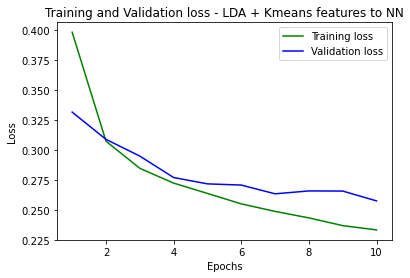

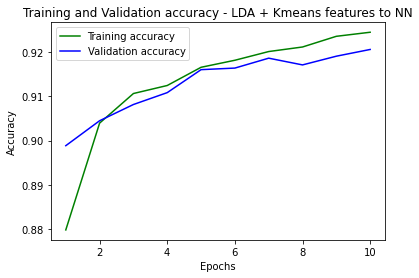

In [288]:
if __name__ == '__main__':
    main()

### LDA + EM ==> NN

In [289]:
def main():

    # Run Neural Network
  
    train_data, test_data, train_label, test_label = train_test_split(transform_input, transform_target, test_size = 0.2, random_state = 1)

    train_data_nn = CustomDataset(train_data, train_label)
    test_data_nn = CustomDataset(test_data, test_label)
    start_time = time.time()
    nn_accuracy, train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = run(train_data_nn, test_data_nn)
    nn_time = time.time() - start_time
    
    plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history, 'LDA + EM features to NN')


    print("LDA + EM ==>NN test accuracy:", nn_accuracy, "running time:", nn_time)

In [290]:
# Configuration
batch_size = 64
learning_rate = 0.01
epochs = 10
debug = True
hidden_size = 32
transform_input = np.concatenate((np.array(X_train_lda), labels_lda_em.reshape(len(labels_lda_em),1)), axis = 1)
transform_target = np.array(y_train).astype('int32')
n_input = transform_input.shape[1]

Epoch: [0][0/700]	Batch Time 0.021 	Batch Loss 2.2697	Train Accuracy 0.1562	
Epoch: [0][100/700]	Batch Time 0.002 	Batch Loss 0.3407	Train Accuracy 0.8906	
Epoch: [0][200/700]	Batch Time 0.002 	Batch Loss 0.4075	Train Accuracy 0.8750	
Epoch: [0][300/700]	Batch Time 0.003 	Batch Loss 0.5909	Train Accuracy 0.8125	
Epoch: [0][400/700]	Batch Time 0.003 	Batch Loss 0.3529	Train Accuracy 0.8906	
Epoch: [0][500/700]	Batch Time 0.002 	Batch Loss 0.2786	Train Accuracy 0.8750	
Epoch: [0][600/700]	Batch Time 0.002 	Batch Loss 0.3849	Train Accuracy 0.8594	
* Average Accuracy of Epoch 0 is: 0.8806
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9062	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.9062	
Evaluate: [4/175]	Batch Accuracy 0.8281	
Evaluate: [5/175]	Batch Accuracy 0.9219	
Evaluate: [6/175]	Batch Accuracy 0.8594	
Evaluate: [7/175]	Batch Accuracy 0.8750	
Evaluate: [8/175]	Batch Accuracy 0.9062	
Evaluate: [9/175]	Batch Accuracy 0.8125

Epoch: [1][200/700]	Batch Time 0.003 	Batch Loss 0.3232	Train Accuracy 0.8750	
Epoch: [1][300/700]	Batch Time 0.002 	Batch Loss 0.2320	Train Accuracy 0.8906	
Epoch: [1][400/700]	Batch Time 0.003 	Batch Loss 0.4090	Train Accuracy 0.9062	
Epoch: [1][500/700]	Batch Time 0.003 	Batch Loss 0.2943	Train Accuracy 0.8906	
Epoch: [1][600/700]	Batch Time 0.004 	Batch Loss 0.3270	Train Accuracy 0.8594	
* Average Accuracy of Epoch 1 is: 0.9032
Evaluate: [0/175]	Batch Accuracy 0.9219	
Evaluate: [1/175]	Batch Accuracy 0.9219	
Evaluate: [2/175]	Batch Accuracy 0.8281	
Evaluate: [3/175]	Batch Accuracy 0.8281	
Evaluate: [4/175]	Batch Accuracy 0.8750	
Evaluate: [5/175]	Batch Accuracy 0.9844	
Evaluate: [6/175]	Batch Accuracy 0.9375	
Evaluate: [7/175]	Batch Accuracy 0.9531	
Evaluate: [8/175]	Batch Accuracy 0.9062	
Evaluate: [9/175]	Batch Accuracy 0.8906	
Evaluate: [10/175]	Batch Accuracy 0.8125	
Evaluate: [11/175]	Batch Accuracy 0.8438	
Evaluate: [12/175]	Batch Accuracy 0.8906	
Evaluate: [13/175]	Batch Acc

Epoch: [2][400/700]	Batch Time 0.002 	Batch Loss 0.2899	Train Accuracy 0.8906	
Epoch: [2][500/700]	Batch Time 0.004 	Batch Loss 0.4096	Train Accuracy 0.8594	
Epoch: [2][600/700]	Batch Time 0.002 	Batch Loss 0.2596	Train Accuracy 0.9531	
* Average Accuracy of Epoch 2 is: 0.9084
Evaluate: [0/175]	Batch Accuracy 0.9062	
Evaluate: [1/175]	Batch Accuracy 0.9531	
Evaluate: [2/175]	Batch Accuracy 0.9375	
Evaluate: [3/175]	Batch Accuracy 0.8906	
Evaluate: [4/175]	Batch Accuracy 0.9375	
Evaluate: [5/175]	Batch Accuracy 0.9375	
Evaluate: [6/175]	Batch Accuracy 0.8906	
Evaluate: [7/175]	Batch Accuracy 0.9062	
Evaluate: [8/175]	Batch Accuracy 0.9688	
Evaluate: [9/175]	Batch Accuracy 0.8906	
Evaluate: [10/175]	Batch Accuracy 0.8906	
Evaluate: [11/175]	Batch Accuracy 0.7969	
Evaluate: [12/175]	Batch Accuracy 0.8750	
Evaluate: [13/175]	Batch Accuracy 0.9062	
Evaluate: [14/175]	Batch Accuracy 0.9062	
Evaluate: [15/175]	Batch Accuracy 0.8906	
Evaluate: [16/175]	Batch Accuracy 0.9375	
Evaluate: [17/175]

Epoch: [3][600/700]	Batch Time 0.002 	Batch Loss 0.5502	Train Accuracy 0.8125	
* Average Accuracy of Epoch 3 is: 0.9120
Evaluate: [0/175]	Batch Accuracy 0.8594	
Evaluate: [1/175]	Batch Accuracy 0.9375	
Evaluate: [2/175]	Batch Accuracy 0.9531	
Evaluate: [3/175]	Batch Accuracy 0.9531	
Evaluate: [4/175]	Batch Accuracy 0.8906	
Evaluate: [5/175]	Batch Accuracy 0.9531	
Evaluate: [6/175]	Batch Accuracy 0.8906	
Evaluate: [7/175]	Batch Accuracy 0.9219	
Evaluate: [8/175]	Batch Accuracy 0.9375	
Evaluate: [9/175]	Batch Accuracy 0.9688	
Evaluate: [10/175]	Batch Accuracy 0.9375	
Evaluate: [11/175]	Batch Accuracy 0.9219	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.9375	
Evaluate: [14/175]	Batch Accuracy 0.9375	
Evaluate: [15/175]	Batch Accuracy 0.9375	
Evaluate: [16/175]	Batch Accuracy 0.8906	
Evaluate: [17/175]	Batch Accuracy 0.9219	
Evaluate: [18/175]	Batch Accuracy 0.9531	
Evaluate: [19/175]	Batch Accuracy 0.9062	
Evaluate: [20/175]	Batch Accuracy 0.9219	
Evaluate

Evaluate: [151/175]	Batch Accuracy 0.9531	
Evaluate: [152/175]	Batch Accuracy 0.9375	
Evaluate: [153/175]	Batch Accuracy 0.9219	
Evaluate: [154/175]	Batch Accuracy 0.9219	
Evaluate: [155/175]	Batch Accuracy 0.8750	
Evaluate: [156/175]	Batch Accuracy 0.8438	
Evaluate: [157/175]	Batch Accuracy 0.8594	
Evaluate: [158/175]	Batch Accuracy 0.9375	
Evaluate: [159/175]	Batch Accuracy 0.9531	
Evaluate: [160/175]	Batch Accuracy 0.9062	
Evaluate: [161/175]	Batch Accuracy 0.9062	
Evaluate: [162/175]	Batch Accuracy 0.8750	
Evaluate: [163/175]	Batch Accuracy 0.9844	
Evaluate: [164/175]	Batch Accuracy 0.8594	
Evaluate: [165/175]	Batch Accuracy 0.9531	
Evaluate: [166/175]	Batch Accuracy 0.9375	
Evaluate: [167/175]	Batch Accuracy 0.9219	
Evaluate: [168/175]	Batch Accuracy 0.9688	
Evaluate: [169/175]	Batch Accuracy 0.7969	
Evaluate: [170/175]	Batch Accuracy 0.9531	
Evaluate: [171/175]	Batch Accuracy 0.8906	
Evaluate: [172/175]	Batch Accuracy 0.8906	
Evaluate: [173/175]	Batch Accuracy 0.9531	
Evaluate: [

Evaluate: [166/175]	Batch Accuracy 0.8750	
Evaluate: [167/175]	Batch Accuracy 0.9375	
Evaluate: [168/175]	Batch Accuracy 0.9219	
Evaluate: [169/175]	Batch Accuracy 0.9375	
Evaluate: [170/175]	Batch Accuracy 0.9062	
Evaluate: [171/175]	Batch Accuracy 0.9062	
Evaluate: [172/175]	Batch Accuracy 0.9531	
Evaluate: [173/175]	Batch Accuracy 0.9531	
Evaluate: [174/175]	Batch Accuracy 0.8906	
* Validation Accuracy: 0.9137
Epoch: [6][0/700]	Batch Time 0.003 	Batch Loss 0.1133	Train Accuracy 0.9844	
Epoch: [6][100/700]	Batch Time 0.002 	Batch Loss 0.3756	Train Accuracy 0.8594	
Epoch: [6][200/700]	Batch Time 0.002 	Batch Loss 0.1518	Train Accuracy 0.9531	
Epoch: [6][300/700]	Batch Time 0.012 	Batch Loss 0.2820	Train Accuracy 0.9062	
Epoch: [6][400/700]	Batch Time 0.003 	Batch Loss 0.1203	Train Accuracy 0.9531	
Epoch: [6][500/700]	Batch Time 0.003 	Batch Loss 0.1725	Train Accuracy 0.9688	
Epoch: [6][600/700]	Batch Time 0.003 	Batch Loss 0.2822	Train Accuracy 0.8594	
* Average Accuracy of Epoch 6 is

Epoch: [7][100/700]	Batch Time 0.002 	Batch Loss 0.3544	Train Accuracy 0.9062	
Epoch: [7][200/700]	Batch Time 0.002 	Batch Loss 0.2217	Train Accuracy 0.9219	
Epoch: [7][300/700]	Batch Time 0.002 	Batch Loss 0.4882	Train Accuracy 0.8906	
Epoch: [7][400/700]	Batch Time 0.004 	Batch Loss 0.1939	Train Accuracy 0.9531	
Epoch: [7][500/700]	Batch Time 0.002 	Batch Loss 0.3194	Train Accuracy 0.8750	
Epoch: [7][600/700]	Batch Time 0.002 	Batch Loss 0.5862	Train Accuracy 0.8906	
* Average Accuracy of Epoch 7 is: 0.9196
Evaluate: [0/175]	Batch Accuracy 0.9219	
Evaluate: [1/175]	Batch Accuracy 0.9531	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.9062	
Evaluate: [4/175]	Batch Accuracy 0.9844	
Evaluate: [5/175]	Batch Accuracy 0.8438	
Evaluate: [6/175]	Batch Accuracy 0.9219	
Evaluate: [7/175]	Batch Accuracy 0.9219	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.9062	
Evaluate: [10/175]	Batch Accuracy 0.9062	
Evaluate: [11/175]	Batch Accuracy

Epoch: [8][300/700]	Batch Time 0.002 	Batch Loss 0.1832	Train Accuracy 0.9375	
Epoch: [8][400/700]	Batch Time 0.003 	Batch Loss 0.2141	Train Accuracy 0.9375	
Epoch: [8][500/700]	Batch Time 0.002 	Batch Loss 0.2276	Train Accuracy 0.9062	
Epoch: [8][600/700]	Batch Time 0.002 	Batch Loss 0.3183	Train Accuracy 0.9062	
* Average Accuracy of Epoch 8 is: 0.9210
Evaluate: [0/175]	Batch Accuracy 0.9375	
Evaluate: [1/175]	Batch Accuracy 0.9219	
Evaluate: [2/175]	Batch Accuracy 0.9844	
Evaluate: [3/175]	Batch Accuracy 0.9219	
Evaluate: [4/175]	Batch Accuracy 0.8750	
Evaluate: [5/175]	Batch Accuracy 0.9219	
Evaluate: [6/175]	Batch Accuracy 0.9844	
Evaluate: [7/175]	Batch Accuracy 0.9531	
Evaluate: [8/175]	Batch Accuracy 0.9531	
Evaluate: [9/175]	Batch Accuracy 0.9375	
Evaluate: [10/175]	Batch Accuracy 0.8750	
Evaluate: [11/175]	Batch Accuracy 0.9531	
Evaluate: [12/175]	Batch Accuracy 0.9375	
Evaluate: [13/175]	Batch Accuracy 0.9375	
Evaluate: [14/175]	Batch Accuracy 0.9531	
Evaluate: [15/175]	Batc

Epoch: [9][500/700]	Batch Time 0.003 	Batch Loss 0.0971	Train Accuracy 0.9688	
Epoch: [9][600/700]	Batch Time 0.003 	Batch Loss 0.1994	Train Accuracy 0.9062	
* Average Accuracy of Epoch 9 is: 0.9226
Evaluate: [0/175]	Batch Accuracy 0.9375	
Evaluate: [1/175]	Batch Accuracy 0.9688	
Evaluate: [2/175]	Batch Accuracy 0.9219	
Evaluate: [3/175]	Batch Accuracy 0.8906	
Evaluate: [4/175]	Batch Accuracy 0.9062	
Evaluate: [5/175]	Batch Accuracy 0.8906	
Evaluate: [6/175]	Batch Accuracy 0.9375	
Evaluate: [7/175]	Batch Accuracy 0.9531	
Evaluate: [8/175]	Batch Accuracy 0.9219	
Evaluate: [9/175]	Batch Accuracy 0.8906	
Evaluate: [10/175]	Batch Accuracy 0.8906	
Evaluate: [11/175]	Batch Accuracy 0.8438	
Evaluate: [12/175]	Batch Accuracy 0.9219	
Evaluate: [13/175]	Batch Accuracy 0.8906	
Evaluate: [14/175]	Batch Accuracy 0.8906	
Evaluate: [15/175]	Batch Accuracy 0.9062	
Evaluate: [16/175]	Batch Accuracy 0.9062	
Evaluate: [17/175]	Batch Accuracy 0.8750	
Evaluate: [18/175]	Batch Accuracy 0.8906	
Evaluate: [19

Evaluate: [120/175]	Batch Accuracy 0.9219	
Evaluate: [121/175]	Batch Accuracy 0.9219	
Evaluate: [122/175]	Batch Accuracy 0.9062	
Evaluate: [123/175]	Batch Accuracy 0.9219	
Evaluate: [124/175]	Batch Accuracy 0.8750	
Evaluate: [125/175]	Batch Accuracy 0.9375	
Evaluate: [126/175]	Batch Accuracy 0.9688	
Evaluate: [127/175]	Batch Accuracy 0.9375	
Evaluate: [128/175]	Batch Accuracy 0.9062	
Evaluate: [129/175]	Batch Accuracy 0.8438	
Evaluate: [130/175]	Batch Accuracy 0.9062	
Evaluate: [131/175]	Batch Accuracy 0.9062	
Evaluate: [132/175]	Batch Accuracy 0.8594	
Evaluate: [133/175]	Batch Accuracy 0.9531	
Evaluate: [134/175]	Batch Accuracy 0.9688	
Evaluate: [135/175]	Batch Accuracy 0.9531	
Evaluate: [136/175]	Batch Accuracy 0.9062	
Evaluate: [137/175]	Batch Accuracy 0.9062	
Evaluate: [138/175]	Batch Accuracy 0.9688	
Evaluate: [139/175]	Batch Accuracy 0.9375	
Evaluate: [140/175]	Batch Accuracy 0.9688	
Evaluate: [141/175]	Batch Accuracy 0.9375	
Evaluate: [142/175]	Batch Accuracy 0.8594	
Evaluate: [

/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/2683663103.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


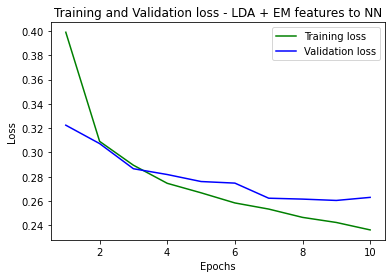

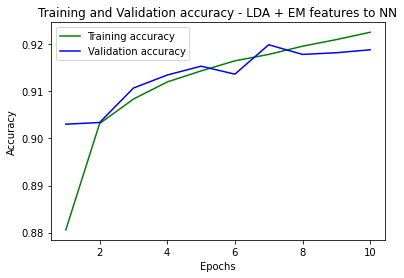

In [291]:
if __name__ == '__main__':
    main()

# Dataset 2: 20 news groups

In [300]:
import nltk
from nltk.corpus import reuters
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re
import umap

In [697]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shangwenhuang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [700]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shangwenhuang/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [683]:
text = nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/shangwenhuang/nltk_data...


In [301]:
# Create a TfidfVectorizer to convert the preprocessed documents to a matrix of TF-IDF features
stop_words = set(stopwords.words('english'))

# Define the text preprocessing function
def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove non-alphabetic characters and convert to lowercase
    words = [re.sub(r'[^a-zA-Z]', '', w.lower()) for w in words]
    # Remove stop words and stem the remaining words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words if w not in stop_words]
    # Join the remaining words back into a single string
    text = ' '.join(words)
    return text




In [302]:

# Get the list of document IDs
doc_ids = reuters.fileids()

# Create a list of the document texts
documents = [reuters.raw(doc_id) for doc_id in doc_ids]
cats = [reuters.categories(doc_id) for doc_id in doc_ids]

In [303]:
# text after preprocess
corpus = [preprocess(document) for document in documents]

labels = np.array([reuters.categories(doc_id) for doc_id in doc_ids])
unique_labels, label_ids = np.unique(labels, return_inverse=True)


/var/folders/vv/609pfdw549g221wv1wnwr92h0000gp/T/ipykernel_23374/4183002417.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array([reuters.categories(doc_id) for doc_id in doc_ids])


In [304]:
vectorizer = TfidfVectorizer(max_features=2000)
X = vectorizer.fit_transform(corpus)

# 2.1 Clustering on Reuters text

### 2.1.1 Kmean on Reuters text

In [142]:


# Define the number of clusters
num_clusters = 3
start_time = time.time()
# Perform k-means clustering on the documents
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
end_time = time.time()
kmeans_training_time = end_time - start_time

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
kmeans_training_time

0.36893486976623535

In [144]:
# Print the top words for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for j in order_centroids[i, :15]:
        print(f"  {terms[j]}")
    print()


Cluster 0:
  said
  pct
  dlr
  mln
  share
  bank
  compani
  lt
  us
  billion
  year
  price
  tonn
  trade
  inc

Cluster 1:
  ct
  div
  qtli
  record
  pay
  prior
  april
  vs
  dividend
  payout
  lt
  set
  march
  quarterli
  may

Cluster 2:
  vs
  ct
  mln
  net
  shr
  loss
  rev
  qtr
  dlr
  profit
  lt
  oper
  avg
  note
  mth



In [145]:
pred_cluster = kmeans.predict(X)

for i in range(num_clusters):
    # get random 10 documents in each cluster
    samples = np.array(corpus)[pred_cluster == i]
    cluster_cat = np.array(labels)[pred_cluster == i]
    idx = np.random.randint(samples.shape[0], size = 100)
    tfidf_vec = vectorizer.transform([samples[i] for i in idx])
    flat_cat = set([item for sublist in cluster_cat for item in sublist])
    value_counts = Counter(flat_cat)
    sorted_cat = sorted(list(flat_cat), key=lambda x: value_counts[x], reverse=True)
    # sort the elements of the vector in descending order
    sorted_indices = tfidf_vec.toarray().mean(axis=0).argsort()[::-1]
    # map the indices to the corresponding words
    vocabulary = vectorizer.vocabulary_
    important_words = [list(vocabulary.keys())[list(vocabulary.values()).index(idx)] for idx in sorted_indices[:10]]
    print(f'cluster_{i}','categories:',sorted_cat, 'words from samples:', important_words)
    

cluster_0 categories: ['groundnut-oil', 'cpi', 'heat', 'reserves', 'jet', 'gas', 'sun-oil', 'fuel', 'groundnut', 'sunseed', 'bop', 'trade', 'lin-oil', 'money-supply', 'palmkernel', 'pet-chem', 'palladium', 'coconut-oil', 'rand', 'l-cattle', 'oilseed', 'soy-oil', 'alum', 'dfl', 'tea', 'soy-meal', 'acq', 'nkr', 'crude', 'money-fx', 'cpu', 'gold', 'rape-oil', 'interest', 'tin', 'instal-debt', 'rice', 'wpi', 'rapeseed', 'propane', 'hog', 'rye', 'cotton-oil', 'zinc', 'cocoa', 'nzdlr', 'nat-gas', 'dlr', 'rubber', 'earn', 'iron-steel', 'yen', 'naphtha', 'carcass', 'gnp', 'cotton', 'sorghum', 'wheat', 'lei', 'income', 'grain', 'silver', 'strategic-metal', 'retail', 'potato', 'copra-cake', 'lead', 'sun-meal', 'oat', 'platinum', 'copper', 'housing', 'palm-oil', 'barley', 'livestock', 'dmk', 'lumber', 'veg-oil', 'castor-oil', 'nickel', 'ipi', 'coffee', 'coconut', 'meal-feed', 'orange', 'corn', 'soybean', 'jobs', 'sugar', 'ship'] words from samples: ['said', 'pct', 'dlr', 'billion', 'bank', 'share

In [152]:
corpus[0]

'asian export fear damag usjapan rift mount trade friction us japan rais fear among mani asia export nation row could inflict farreach econom damag  businessmen offici said  told reuter correspond asian capit us move japan might boost protectionist sentiment us lead curb american import product  export said conflict would hurt longrun  shortterm tokyo loss might gain  us said impos  mln dlr tariff import japanes electron good april   retali japan alleg failur stick pact sell semiconductor world market cost  unoffici japanes estim put impact tariff  billion dlr spokesmen major electron firm said would virtual halt export product hit new tax   would nt abl busi   said spokesman lead japanes electron firm matsushita electr industri co ltd  lt  mct    tariff remain place length time beyond month mean complet eros export  good subject tariff  us   said tom murtha  stock analyst tokyo offic broker  lt  jame capel co   taiwan  businessmen offici also worri   awar serious us  threat japan serv

In [164]:
a=np.array([index for index, value in enumerate(pred_cluster == 0) if value])

In [170]:
np.array(corpus)[a][100]

'fed add reserv via overnight repurchas feder reserv enter us govern secur market arrang overnight system repurchas agreement  fed spokesman said  dealer said feder fund trade  pct fed began temporari direct suppli reserv bank system '

In [10]:
silhouette_avg = silhouette_score(X, pred_cluster)
print("The average Silhouette Score for Kmeans on Reuters data is:", silhouette_avg)

The average Silhouette Score for Kmeans on Reuters data is: 0.0623145968197432


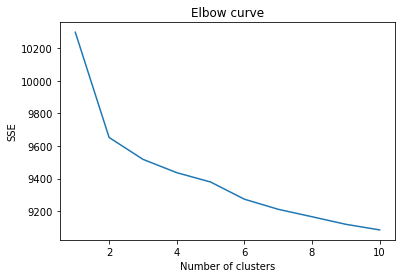

In [874]:
# Compute the within-cluster sum of squared errors for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### 2.1.2 EM on Reuters text

In [138]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=3)
idx = np.random.randint(X.shape[0], size = 10000)
X_samples = X[idx,:].toarray()
em.fit(X_samples)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_samples)
end_predict_time = time.time()
print("Training time of EM on Reuters data is:", end_time - start_time)
print("Prediction time of EM on Reuters data is:", end_predict_time - end_time)


Training time of EM on Reuters data is: 34.99224901199341
Prediction time of EM on Reuters data is: 3.0314700603485107


In [48]:
# Print the top words for each cluster
order_centroids = em.means_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for j in order_centroids[i, :15]:
        print(f"  {terms[j]}")
    print()

Cluster 0:
  said
  lt
  share
  dlr
  compani
  mln
  ct
  inc
  corp
  tonn
  april
  stock
  pct
  record
  oil

Cluster 1:
  vs
  ct
  net
  mln
  shr
  loss
  rev
  qtr
  dlr
  profit
  lt
  note
  avg
  mth
  oper

Cluster 2:
  pct
  bank
  billion
  said
  rate
  trade
  us
  japan
  dollar
  mln
  year
  market
  rise
  dlr
  februari



In [147]:
predicted_labels == 1

array([False,  True, False, ..., False, False, False])

In [146]:
pred_cluster 

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [139]:


for i in range(3):
    # get random 10 documents in each cluster
    samples = np.array(corpus)[predicted_labels == i]
    cluster_cat = np.array(labels)[predicted_labels == i]
    idx = np.random.randint(samples.shape[0], size = 100)
    tfidf_vec = vectorizer.transform([samples[i] for i in idx])
    flat_cat = set([item for sublist in cluster_cat for item in sublist])
    value_counts = Counter(flat_cat)
    sorted_cat = sorted(list(flat_cat), key=lambda x: value_counts[x], reverse=True)
    # sort the elements of the vector in descending order
    sorted_indices = tfidf_vec.toarray().mean(axis=0).argsort()[::-1]
    # map the indices to the corresponding words
    vocabulary = vectorizer.vocabulary_
    important_words = [list(vocabulary.keys())[list(vocabulary.values()).index(idx)] for idx in sorted_indices[:10]]
    print(f'cluster_{i}','categories:',sorted_cat, 'words from samples:', important_words)
    

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10788 but corresponding boolean dimension is 10000

In [51]:
cluster_centers = em.means_
def get_top_keywords(cluster_centers, feature_names, n_top_keywords):
    top_keywords = []
    for idx, center in enumerate(cluster_centers):
        sorted_indices = np.argsort(center)[-n_top_keywords:]
        keywords = [(feature_names[i], center[i]) for i in sorted_indices]
        sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
        top_keywords.append([keyword for keyword, weight in sorted_keywords])
    return top_keywords

n_top_keywords = 10
top_keywords = get_top_keywords(cluster_centers, feature_names, n_top_keywords)

for idx, keywords in enumerate(top_keywords):
    print(f"Cluster {idx + 1}: {', '.join(keywords)}")


Cluster 1: said, lt, share, dlr, compani, mln, ct, inc, corp, tonn
Cluster 2: vs, ct, net, mln, shr, loss, rev, qtr, dlr, profit
Cluster 3: pct, bank, billion, said, rate, trade, us, japan, dollar, mln


In [52]:
silhouette_em_reuters = silhouette_score(X_samples, predicted_labels)
print("The average Silhouette Score for EM on Reuters data is:", silhouette_em_reuters)

The average Silhouette Score for EM on Reuters data is: 0.060484295624323135


### 2.2. Reduce dimension on Reuters text

### 2.2.1 PCA on Reuters text

In [85]:
# Apply PCA
start_time = time.time()
# Perform dimensionality reduction on the feature matrix
#svd = TruncatedSVD(n_components=50, random_state=0)
#X_reduced = svd.fit_transform(X)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X.toarray())
end_time = time.time()

print("PCA running time on MNIST data is:", end_time - start_time)


PCA running time on MNIST data is: 0.5210771560668945


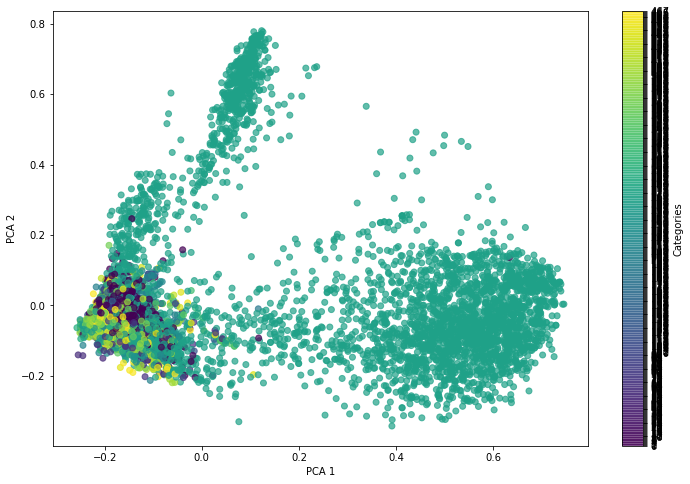

In [60]:
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=label_ids, cmap='viridis', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(ticks=range(len(unique_labels)), label='Categories')
plt.show()

In [61]:
# Reconstruct the data from the reduced representation using PCA
X_pca_reconstructed = pca.inverse_transform(X_pca)

# Calculate the reconstruction error for PCA
pca_error = mean_squared_error(X.toarray(), X_pca_reconstructed)
pca_error

0.00039134328357468386

In [62]:
def get_top_keywords(components, feature_names, n_top_keywords):
    top_keywords = []
    for idx, component in enumerate(components):
        sorted_indices = np.argsort(component)[-n_top_keywords:]
        keywords = [(feature_names[i], component[i]) for i in sorted_indices]
        sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
        top_keywords.append([keyword for keyword, weight in sorted_keywords])
    return top_keywords

n_top_keywords = 10
top_keywords = get_top_keywords(pca.components_, feature_names, n_top_keywords)

for idx, keywords in enumerate(top_keywords):
    print(f"Component {idx + 1}: {', '.join(keywords)}")

Component 1: vs, ct, net, shr, mln, loss, rev, qtr, profit, avg
Component 2: ct, qtli, div, record, april, pay, prior, dividend, quarterli, set
Component 3: loss, profit, oper, ct, qtli, prior, record, th, pay, april
Component 4: share, dlr, compani, mln, lt, stock, inc, said, common, corp
Component 5: billion, dlr, mln, bank, pct, div, qtli, stg, record, loss


PCA running time on Reuters data is: 0.04876518249511719


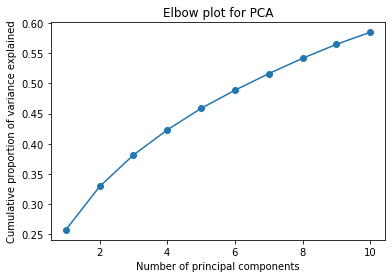

In [14]:
# Apply PCA
start_time = time.time()
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_reduced)
end_time = time.time()

print("PCA running time on Reuters data is:", end_time - start_time)
# Compute cumulative proportion of variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
# Plot elbow plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative proportion of variance explained')
plt.title('Elbow plot for PCA')
plt.show()

### 2.2.2 ICA on Reuters text

In [305]:
start_time = time.time()

ica = FastICA(n_components=5)
ica.fit(X.toarray())
X_ica = ica.fit_transform(X.toarray())

end_time = time.time()

print("ICA on Reuters data running time is:", end_time - start_time)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ICA on Reuters data running time is: 27.345250844955444


In [306]:
# Reconstruct the data from the reduced representation using PCA
X_ica_reconstructed = ica.inverse_transform(X_ica)

# Calculate the reconstruction error for PCA
ica_error = mean_squared_error(X.toarray(), X_ica_reconstructed)
ica_error

0.0003913432363845487

In [307]:
from scipy.stats import kurtosis
kurtosis_values = kurtosis(X_ica, axis=0)
print('Kurtosis value of ICA on MNIST is:', kurtosis_values)

Kurtosis value of ICA on MNIST is: [ 1.67799682  8.277227   13.01287719  3.04036281 -0.39815542]


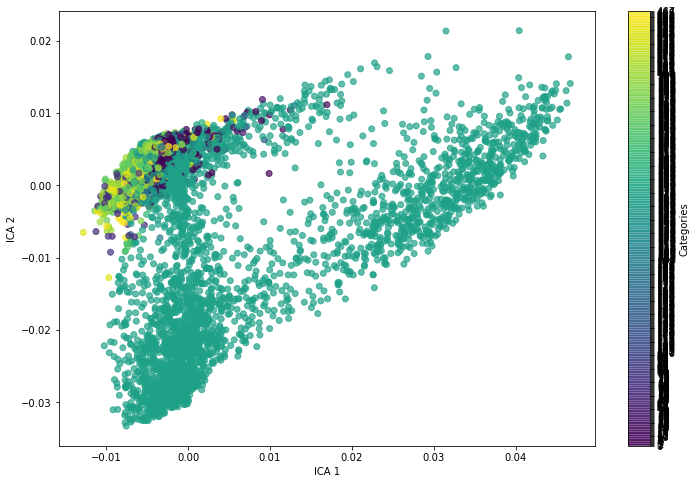

In [33]:
plt.figure(figsize=(12, 8))
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=label_ids, cmap='viridis', alpha=0.7)
plt.xlabel('ICA 1')
plt.ylabel('ICA 2')
plt.colorbar(ticks=range(len(unique_labels)), label='Categories')
plt.show()

In [63]:

n_top_keywords = 10
top_keywords = get_top_keywords(ica.components_, feature_names, n_top_keywords)

for idx, keywords in enumerate(top_keywords):
    print(f"Component {idx + 1}: {', '.join(keywords)}")



Component 1: qtli, div, ct, record, april, pay, prior, dividend, quarterli, set
Component 2: tonn, us, trade, rate, export, japan, dollar, offici, wheat, ec
Component 3: billion, mln, bank, pct, dlr, stg, money, rate, februari, januari
Component 4: loss, profit, dlr, share, oper, quarter, pct, record, compani, said
Component 5: mln, share, billion, stock, said, common, offer, acquir, split, lt


In [38]:
doc_component_assignments = X_ica.argmax(axis=1)
documents_df = pd.DataFrame({'Document': corpus, 'Component': doc_component_assignments})

In [39]:
documents_df

Document  Component
0      asian export fear damag usjapan rift mount tra...          1
1      china daili say vermin eat  pct grain stock su...          1
2      japan revis longterm energi demand downward mi...          1
3      thai trade deficit widen first quarter thailan...          2
4      indonesia see cpo price rise sharpli indonesia...          1
...                                                  ...        ...
10783  uk money market shortag forecast revis bank en...          2
10784  knightridd inc  lt  krn  set quarterli qtli di...          0
10785  technitrol inc  lt  tnl  set quarterli qtli di...          0
10786  nationwid cellular servic inc  lt  ncel  th qt...          1
10787   lt  aha  automot technolog corp  year net shr...          0

[10788 rows x 2 columns]

In [41]:
component_number = 1
sample_size = 5
sample_docs = documents_df[documents_df['Component'] == component_number].sample(sample_size, random_state=42)

for idx, row in sample_docs.iterrows():
    print(f"Sample Document {idx} for Component {component_number}:")
    print(row['Document'])
    print("\n")

Sample Document 8003 for Component 1:
sen  danforth  bond ask target  measur missouri republican senat john danforth christoph bond introduc bill would allow wheat feedgrain produc along mississippi missouri river hurt flood last year collect least  pct defici payment year without plant  danforth aid austin schlick said bill similar provis includ hous agricultur committeepass emerg disast assist bill schedul taken hous tomorrow  schlick said flood destroy number leve along two river last octob  leav farmland vulner damag year 


Sample Document 4554 for Component 1:
apr  apr 


Sample Document 1627 for Component 1:
singapor petroleum co rais oil product post singapor petroleum co pte ltd said rais post price product june   one centgallon lpg  naphtha gasolin  two cent ga oil  centsbarrel marin diesel oil  new price  lpg  centsgallon  chemic naphtha   unlead reform    gm lead  octan    octan    octan    octan    gm lead  octan    octan    octan   jet kerosen   kerosen   premium kerosen 

### 2.2.3 RP on Reuters text

In [68]:
from sklearn.random_projection import GaussianRandomProjection


# Define the Randomized Projection model
rp = GaussianRandomProjection(n_components=5, random_state=42)

# Fit the model
X_rp = rp.fit_transform(X.toarray())


In [69]:
# Reconstruct the data from the reduced representation using RP
X_rp_reconstructed = rp.inverse_transform(X_rp)

# Calculate the reconstruction error for RP
rp_error = mean_squared_error(X.toarray(), X_rp_reconstructed)
rp_error

0.0004984456337716908

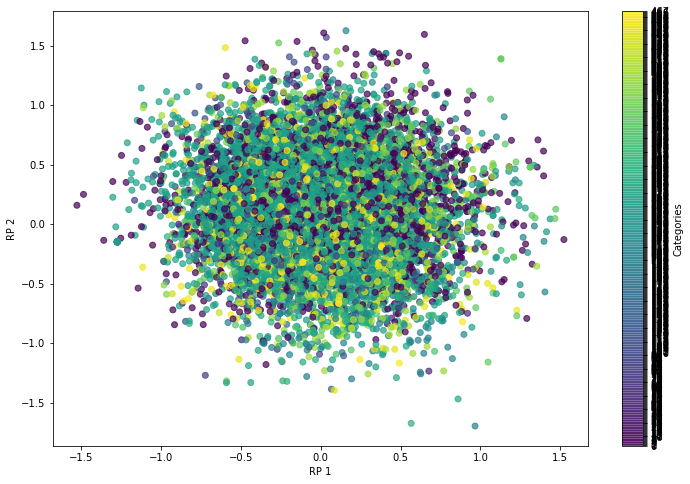

In [70]:
plt.figure(figsize=(12, 8))
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=label_ids, cmap='viridis', alpha=0.7)
plt.xlabel('RP 1')
plt.ylabel('RP 2')
plt.colorbar(ticks=range(len(unique_labels)), label='Categories')
plt.show()

In [73]:

n_top_keywords = 10
top_keywords = get_top_keywords(rp.components_, feature_names, n_top_keywords)

for idx, keywords in enumerate(top_keywords):
    print(f"Component {idx + 1}: {', '.join(keywords)}")


Component 1: bond, side, whollyown, definit, becam, water, gain, regulatori, someth, overnight
Component 2: integr, strateg, writeoff, chemlawn, discuss, differ, pact, aerospac, hand, ecuador
Component 3: level, termin, independ, other, transcanada, negoti, spent, aggress, grain, though
Component 4: instead, origin, press, fourth, underli, underwrit, refer, commit, singapor, mexico
Component 5: bushel, forc, barg, partnership, chrysler, appli, enhanc, combin, state, detail


### 2.2.4 UMAP on Reuters

In [297]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=5, metric='euclidean', random_state=42)
X_umap = reducer.fit_transform(X.toarray())


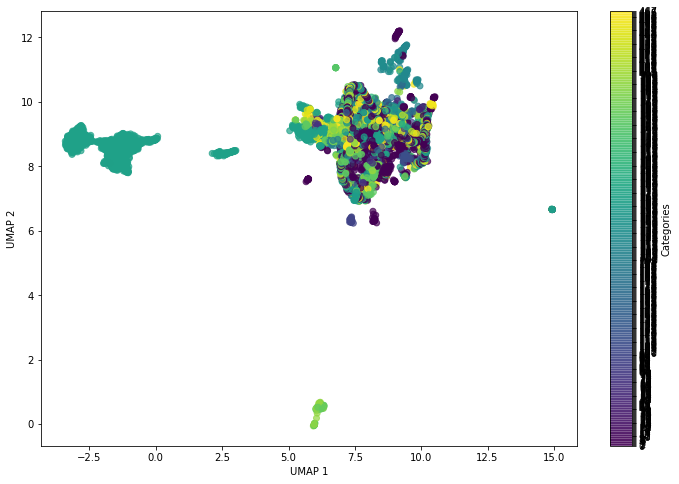

In [82]:
plt.figure(figsize=(12, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=label_ids, cmap='viridis', alpha=0.7)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(ticks=range(len(unique_labels)), label='Categories')
plt.show()

In [299]:
# Reconstruct the data from the reduced representation using RP
X_umap_reconstructed = reducer.inverse_transform(X_umap)

# Calculate the reconstruction error for RP
umap_error = mean_squared_error(X.toarray(), X_umap_reconstructed)
umap_error

KeyboardInterrupt: 

In [ ]:

n_top_keywords = 10
top_keywords = get_top_keywords(reducer.components_, feature_names, n_top_keywords)

for idx, keywords in enumerate(top_keywords):
    print(f"Component {idx + 1}: {', '.join(keywords)}")

### 2.3 Reduce Dimension ==> Clustering on Reuters text

### 2.3.1 PCA ==> Kmean

In [91]:

# Define the number of clusters
num_clusters = 5
# Perform k-means clustering on the documents
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_pca)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [92]:
pred_cluster = kmeans.predict(X_pca)

In [93]:
silhouette_avg = silhouette_score(X.toarray(), pred_cluster)
print("The average Silhouette Score for PCA ==> Kmean on Reuters data is:", silhouette_avg)

The average Silhouette Score for PCA ==> Kmean on Reuters data is: 0.041125367640935835


In [100]:
import pandas as pd

cluster_df = pd.DataFrame({'document': corpus, 'cluster': pred_cluster})


In [101]:
def get_top_keywords_by_cluster(cluster_df, feature_matrix, feature_names, n_top_keywords):
    top_keywords = []
    for cluster in sorted(cluster_df['cluster'].unique()):
        cluster_docs = cluster_df[cluster_df['cluster'] == cluster].index
        feature_matrix_sum = np.sum(feature_matrix[cluster_docs], axis=0)
        sorted_indices = np.argsort(feature_matrix_sum)[-n_top_keywords:]
        keywords = [(feature_names[i], feature_matrix_sum[i]) for i in sorted_indices]
        sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
        top_keywords.append((cluster, [keyword for keyword, weight in sorted_keywords]))
    return top_keywords


In [103]:
n_top_keywords = 10
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")


Cluster 0: said, pct, bank, billion, us, tonn, trade, mln, rate, price
Cluster 1: loss, vs, profit, ct, net, shr, mln, rev, dlr, qtr
Cluster 2: ct, div, qtli, record, pay, prior, april, vs, dividend, payout
Cluster 3: said, share, dlr, compani, lt, mln, inc, corp, stock, pct
Cluster 4: vs, mln, net, ct, shr, rev, qtr, dlr, lt, avg


### 2.3.2 PCA ==> EM

In [104]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=5)

em.fit(X_pca)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_pca)
end_predict_time = time.time()
print("Training time of PCA ==> EM on Reuters data is:", end_time - start_time)
print("Prediction time of PCA == > EM on Reuters data is:", end_predict_time - end_time)

Training time of PCA ==> EM on Reuters data is: 0.204542875289917
Prediction time of PCA == > EM on Reuters data is: 0.002868175506591797


In [106]:
silhouette_avg_PCA_EM = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for PCA ==> EM on Reuters data is:", silhouette_avg_PCA_EM)

The average Silhouette Score for PCA ==> EM on Reuters data is: 0.03097818056596794


In [107]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")


Cluster 0: said, share, lt, compani, dlr, inc, corp, pct, offer, acquir
Cluster 1: vs, mln, net, ct, shr, dlr, qtr, rev, billion, lt
Cluster 2: pct, said, bank, us, rate, tonn, billion, trade, market, export
Cluster 3: ct, record, div, qtli, april, pay, dividend, prior, vs, set
Cluster 4: loss, vs, mln, profit, ct, dlr, net, shr, oper, rev


### 2.3.3 ICA ==> Kmean

In [108]:

# Define the number of clusters
num_clusters = 5
# Perform k-means clustering on the documents
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_ica)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [109]:
pred_cluster = kmeans.predict(X_ica)

In [110]:
silhouette_avg = silhouette_score(X.toarray(), pred_cluster)
print("The average Silhouette Score for ICA ==> Kmean on Reuters data is:", silhouette_avg)

The average Silhouette Score for ICA ==> Kmean on Reuters data is: 0.041581888775930866


In [111]:
n_top_keywords = 10
cluster_df = pd.DataFrame({'document': corpus, 'cluster': pred_cluster})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: ct, div, qtli, record, pay, prior, april, vs, dividend, payout
Cluster 1: said, share, dlr, compani, lt, mln, inc, corp, stock, pct
Cluster 2: said, pct, bank, billion, us, tonn, mln, trade, rate, price
Cluster 3: loss, vs, profit, ct, net, shr, mln, rev, dlr, qtr
Cluster 4: vs, mln, net, ct, shr, rev, qtr, dlr, lt, avg


### 2.3.4 ICA ==> EM

In [112]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=5)

em.fit(X_ica)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_ica)
end_predict_time = time.time()
print("Training time of ICA ==> EM on Reuters data is:", end_time - start_time)
print("Prediction time of ICA == > EM on Reuters data is:", end_predict_time - end_time)

Training time of ICA ==> EM on Reuters data is: 0.18924999237060547
Prediction time of ICA == > EM on Reuters data is: 0.002360820770263672


In [113]:
silhouette_avg_ICA_EM = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for ICA ==> EM on Reuters data is:", silhouette_avg_ICA_EM)

The average Silhouette Score for ICA ==> EM on Reuters data is: 0.035218388064507


In [114]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: loss, vs, profit, mln, ct, net, dlr, shr, oper, rev
Cluster 1: pct, bank, billion, said, rate, mln, februari, rise, januari, year
Cluster 2: ct, record, div, qtli, april, pay, dividend, prior, vs, set
Cluster 3: vs, mln, net, ct, shr, qtr, rev, dlr, billion, lt
Cluster 4: said, share, dlr, lt, compani, us, inc, pct, oil, mln


### 2.3.5 RP ==> Kmean

In [115]:
# Define the number of clusters
num_clusters = 5
# Perform k-means clustering on the documents
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_rp)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [116]:
predicted_labels = kmeans.predict(X_rp)

In [117]:
silhouette_avg_rp_kmean = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for ICA ==> EM on Reuters data is:", silhouette_avg_rp_kmean)

The average Silhouette Score for ICA ==> EM on Reuters data is: 0.001294069850146636


In [118]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: said, billion, mln, pct, tonn, bank, dlr, us, vs, year
Cluster 1: vs, mln, ct, net, shr, dlr, rev, qtr, lt, said
Cluster 2: said, dlr, mln, pct, billion, lt, compani, profit, share, trade
Cluster 3: vs, ct, loss, shr, profit, net, mln, div, qtli, april
Cluster 4: mln, vs, dlr, said, share, ct, oper, loss, lt, pct


### 2.3.6 RP ==> EM

In [119]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=5)

em.fit(X_rp)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_rp)
end_predict_time = time.time()
print("Training time of RP ==> EM on Reuters data is:", end_time - start_time)
print("Prediction time of RP == > EM on Reuters data is:", end_predict_time - end_time)

Training time of RP ==> EM on Reuters data is: 0.1038978099822998
Prediction time of RP == > EM on Reuters data is: 0.002521038055419922


In [120]:
silhouette_avg_RP_EM = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for ICA ==> EM on Reuters data is:", silhouette_avg_RP_EM)

The average Silhouette Score for ICA ==> EM on Reuters data is: 0.0016198704076149895


In [121]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: said, mln, dlr, tonn, billion, pct, bank, us, lt, share
Cluster 1: said, dlr, mln, pct, share, lt, compani, billion, inc, corp
Cluster 2: vs, mln, ct, net, shr, dlr, rev, qtr, lt, said
Cluster 3: vs, ct, pct, said, profit, billion, mln, loss, year, qtli
Cluster 4: vs, loss, ct, mln, shr, net, dlr, profit, oper, lt


### 2.3.7 UMAP ==> Kmean

In [123]:
# Define the number of clusters
num_clusters = 5
# Perform k-means clustering on the documents
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_umap)
predicted_labels = kmeans.predict(X_umap)

/Users/shangwenhuang/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [124]:
silhouette_avg_umap_kmean = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for ICA ==> EM on Reuters data is:", silhouette_avg_umap_kmean)

The average Silhouette Score for ICA ==> EM on Reuters data is: 0.056397730258619154


In [125]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: said, pct, dlr, billion, mln, share, compani, lt, bank, us
Cluster 1: vs, ct, mln, net, shr, loss, rev, qtr, dlr, profit
Cluster 2: said, pct, dlr, tonn, mln, share, compani, oil, us, lt
Cluster 3: ct, div, qtli, record, pay, prior, april, vs, payout, set
Cluster 4: stg, money, bank, mln, market, england, bill, band, shortag, assist


### 2.3.8 UMAP ==> EM

In [126]:
# Create the EM clustering model and fit the data
start_time = time.time()
em = GaussianMixture(n_components=5)

em.fit(X_umap)
end_time = time.time()

# Get the predicted labels for the data
predicted_labels = em.predict(X_umap)
end_predict_time = time.time()
print("Training time of RP ==> EM on Reuters data is:", end_time - start_time)
print("Prediction time of RP == > EM on Reuters data is:", end_predict_time - end_time)

Training time of RP ==> EM on Reuters data is: 0.05133485794067383
Prediction time of RP == > EM on Reuters data is: 0.002825021743774414


In [127]:
silhouette_avg_UMAP_EM = silhouette_score(X.toarray(), predicted_labels)
print("The average Silhouette Score for ICA ==> EM on Reuters data is:", silhouette_avg_UMAP_EM)

The average Silhouette Score for ICA ==> EM on Reuters data is: 0.03600901794171166


In [128]:
n_top_keywords = 10

cluster_df = pd.DataFrame({'document': corpus, 'cluster': predicted_labels})
top_keywords = get_top_keywords_by_cluster(cluster_df, X.toarray(), vectorizer.get_feature_names_out(), n_top_keywords)

for cluster, keywords in top_keywords:
    print(f"Cluster {cluster}: {', '.join(keywords)}")

Cluster 0: said, pct, dlr, mln, share, compani, lt, billion, us, bank
Cluster 1: vs, mln, net, ct, shr, qtr, rev, dlr, lt, avg
Cluster 2: ct, div, qtli, record, pay, prior, april, vs, payout, set
Cluster 3: stg, money, bank, mln, market, england, bill, band, shortag, assist
Cluster 4: loss, vs, profit, ct, net, shr, mln, rev, dlr, qtr
